In [27]:
#%cd transformers
!pip install .

Processing c:\users\alexd\desktop\transformers\transformers
  Created wheel for transformers: filename=transformers-3.1.0-py3-none-any.whl size=919236 sha256=ca0b1a1d1498d601bd96a92b8fe59d81e1eaa1a1f68d5ef429e8b213ed14875c
  Stored in directory: C:\Users\alexd\AppData\Local\Temp\pip-ephem-wheel-cache-z0__vw4b\wheels\03\15\49\db7f989c5b6aaa048ab9b571846906a144e9e47075b6e1c3a3
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 3.1.0
    Uninstalling transformers-3.1.0:
      Successfully uninstalled transformers-3.1.0
Processing c:\users\alexd\desktop\transformers\transformers
  Created wheel for transformers: filename=transformers-3.1.0-py3-none-any.whl size=919236 sha256=7fedc419240423e26e545b4a1fdc5b9eababfa76a174190219af34c6c5852f8e
  Stored in directory: C:\Users\alexd\AppData\Local\Temp\pip-ephem-wheel-cache-hl3cb2_7\wheels\03\15\49\db7f989c5b6aaa048ab9b571846906a144e9e47075b6e1c3a3
Successfully built transformers
  At

Processing c:\users\alexd\desktop\transformers\transformers


ERROR: Error while checking for conflicts. Please file an issue on pip's issue tracker: https://github.com/pypa/pip/issues/new
Traceback (most recent call last):
  File "C:\Users\alexd\Anaconda3\envs\transformers\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "C:\Users\alexd\Anaconda3\envs\transformers\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\alexd\Anaconda3\envs\transformers\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3012, in _parsed_pkg_info
    return self._pkg_info
  File "C:\Users\alexd\Anaconda3\envs\transformers\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

Dur

  Created wheel for transformers: filename=transformers-3.1.0-py3-none-any.whl size=919236 sha256=75e7f6d5c4c0222e026af239996133db2a36ad3f088a0861e272e2825eebbee9
  Stored in directory: C:\Users\alexd\AppData\Local\Temp\pip-ephem-wheel-cache-qk6fn6wl\wheels\03\15\49\db7f989c5b6aaa048ab9b571846906a144e9e47075b6e1c3a3
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 3.1.0
    Uninstalling transformers-3.1.0:
      Successfully uninstalled transformers-3.1.0


  File "C:\Users\alexd\Anaconda3\envs\transformers\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3014, in _parsed_pkg_info
    metadata = self.get_metadata(self.PKG_INFO)
  File "C:\Users\alexd\Anaconda3\envs\transformers\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 1420, in get_metadata
    value = self._get(path)
  File "C:\Users\alexd\Anaconda3\envs\transformers\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 1616, in _get
    with open(path, 'rb') as stream:
FileNotFoundError: [Errno 2] No such file or directory: 'c:\\users\\alexd\\anaconda3\\envs\\transformers\\lib\\site-packages\\~ransformers-3.1.0.dist-info\\METADATA'


In [1]:
%load_ext autoreload
%autoreload transformer


In [2]:
import torch
import numpy as np

In [3]:
import transformers

In [4]:
tokenizer = transformers.AutoTokenizer.from_pretrained("google/pegasus-cnn_dailymail")
model = transformers.AutoModelWithLMHead.from_pretrained("google/pegasus-cnn_dailymail")

C:\Users\alexd\Anaconda3\envs\transformers\lib\site-packages\transformers\modeling_auto.py:828: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
model

In [13]:
src_text = ["""PG&E stated it scheduled the blackouts in response to forecasts for high winds amid dry conditions. The aim is to reduce the risk of wildfires. Nearly 800 thousand customers were scheduled to be affected by the shutoffs which were expected to last through at least midday tomorrow. """
]
""" Severe acute respiratory syndrome coronavirus-2 (SARS-CoV-2) is the novel coronavirus first detected in Wuhan, China, in November2019, that causes coronavirus disease 2019 (COVID-19). On March 11th 2020, the World Health Organization declared COVID-19 a pandemic. A growing body of evidence reveals that male sex is a risk factor for a more severe disease, including death. Globally, ~60% of deaths from COVID-19 are reported in men, and a cohort study of 17 million adults in England reported a strong association between male sex and risk of death from COVID-19 (hazard ratio 1.59, 95% confidence interval 1.53-1.65).
    Past studies have demonstrated that sex has a significant impact on the outcome of infections and has been associated with underlying differences in immune response to infection9,10. For example, prevalence of
hepatitis A and tuberculosis are significantly higher in men compared
with women11. Viral loads are consistently higher in male patients with
hepatitis C virus (HCV) and human immunodeficiency virus (HIV).
Conversely, women mount a more robust immune response to vaccines14. These findings collectively suggest a more robust ability among
women to control infectious agents. However, the mechanism by which
SARS-CoV-2 causes more severe disease in male patients than in female
patients remains unknown.
To elucidate the immune responses against SARS-CoV-2 infection in
men and women, we performed detailed analysis on the sex differences
in immune phenotype via the assessment of viral loads, SARS-CoV-2
specific antibody levels, plasma cytokines/chemokines, and blood
cell phenotypes.
"""


torch_device = 'cpu'#'cpu'#cuda
abatch = tokenizer.prepare_seq2seq_batch(src_text, truncation=True, padding='longest').to(torch_device)
model = model.to(torch_device)
#translated =  model.generate(**abatch)
translated = model(**abatch, output_attentions=True, return_dict = True)
#tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)


In [510]:
src_text

['PG&E stated it scheduled the blackouts in response to forecasts for high winds amid dry conditions. The aim is to reduce the risk of wildfires. Nearly 800 thousand customers were scheduled to be affected by the shutoffs which were expected to last through at least midday tomorrow. ']

In [409]:
abatch

{'input_ids': tensor([[14887,   759,  1005,  3163,   126,  2798,   109, 25690,   116,   115,
          1407,   112, 13378,   118,   281,  7213, 10754,  1514,  1047,   107,
           139,  2560,   117,   112,  1329,   109,   887,   113, 39471,   107,
         16502,  6194,  4927,   527,   195,  2798,   112,   129,  2790,   141,
           109, 87338,   116,   162,   195,  1214,   112,   289,   224,   134,
           583, 26568,  3469,   107,     1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1]])}

# Bookmark 1

In [5]:
src_text = [
    """ Severe acute respiratory syndrome coronavirus-2 (SARS-CoV-2) is the novel coronavirus first detected in Wuhan, China, in November2019, that causes coronavirus disease 2019 (COVID-19). On March 11th 2020, the World Health Organization declared COVID-19 a pandemic. A growing body of evidence reveals that male sex is a risk factor for a more severe disease, including death. Globally, ~60% of deaths from COVID-19 are reported in men, and a cohort study of 17 million adults in England reported a strong association between male sex and risk of death from COVID-19 (hazard ratio 1.59, 95% confidence interval 1.53-1.65).
    Past studies have demonstrated that sex has a significant impact on the outcome of infections and has been associated with underlying differences in immune response to infection9,10. For example, prevalence of
hepatitis A and tuberculosis are significantly higher in men compared
with women11. Viral loads are consistently higher in male patients with
hepatitis C virus (HCV) and human immunodeficiency virus (HIV).
Conversely, women mount a more robust immune response to vaccines14. These findings collectively suggest a more robust ability among
women to control infectious agents. However, the mechanism by which
SARS-CoV-2 causes more severe disease in male patients than in female
patients remains unknown."""
    ]

"""
To elucidate the immune responses against SARS-CoV-2 infection in
men and women, we performed detailed analysis on the sex differences
in immune phenotype via the assessment of viral loads, SARS-CoV-2
specific antibody levels, plasma cytokines/chemokines, and blood
cell phenotypes.
"""

'\nTo elucidate the immune responses against SARS-CoV-2 infection in\nmen and women, we performed detailed analysis on the sex differences\nin immune phenotype via the assessment of viral loads, SARS-CoV-2\nspecific antibody levels, plasma cytokines/chemokines, and blood\ncell phenotypes.\n'

In [14]:

torch_device = 'cpu'#'cpu'#cuda
# only run this cell if you actually want to generate a sequence
model = model.to(torch_device)
abatch = tokenizer.prepare_seq2seq_batch(src_text, truncation=True, padding='longest').to(torch_device)
translated, output_log, beam_log =  model.generate(**abatch)
tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=False)


In [15]:
num_crossattns = len(abatch['input_ids'][0])
seq = translated[0][1:]
beam_seq = []
for i, best in enumerate(seq):
    for pos, token in enumerate(beam_log['beam_tokens'][i]):
        if (token == best):
            beam_seq.append(pos)
            break
selected_decoder_attentions = []
for i, beam_idx in enumerate(beam_seq):
    #ith token pred, 15th decoder block, 1 is current query len (incremental decoding)
    #append all 16 attn heads with self + cross_attn for the desired beam_idx
    selected_decoder_attentions.append(output_log['decoder_attentions'][i][15][beam_idx])

pruned_cross_attns = []
for i, v in enumerate(selected_decoder_attentions):
    token_attns = np.empty((16,num_crossattns))
    for head_idx, head in enumerate(selected_decoder_attentions[i]):
        token_attns[head_idx] = head[0][-num_crossattns:]
    pruned_cross_attns.append(token_attns)

token_sums = [np.sum(pruned_cross_attns[i], axis = 0) 
             for i in range(len(pruned_cross_attns))]
total_sums = np.array(token_sums).sum(axis = 0)

In [16]:
import nltk
from nltk.corpus import stopwords

silence = stopwords.words('english')
silence.extend([',','.','[',']','].','],','(',')',').','),','{','}','}.','},','?','!',"'",';','"',"/"])

<Figure size 7200x2160 with 0 Axes>

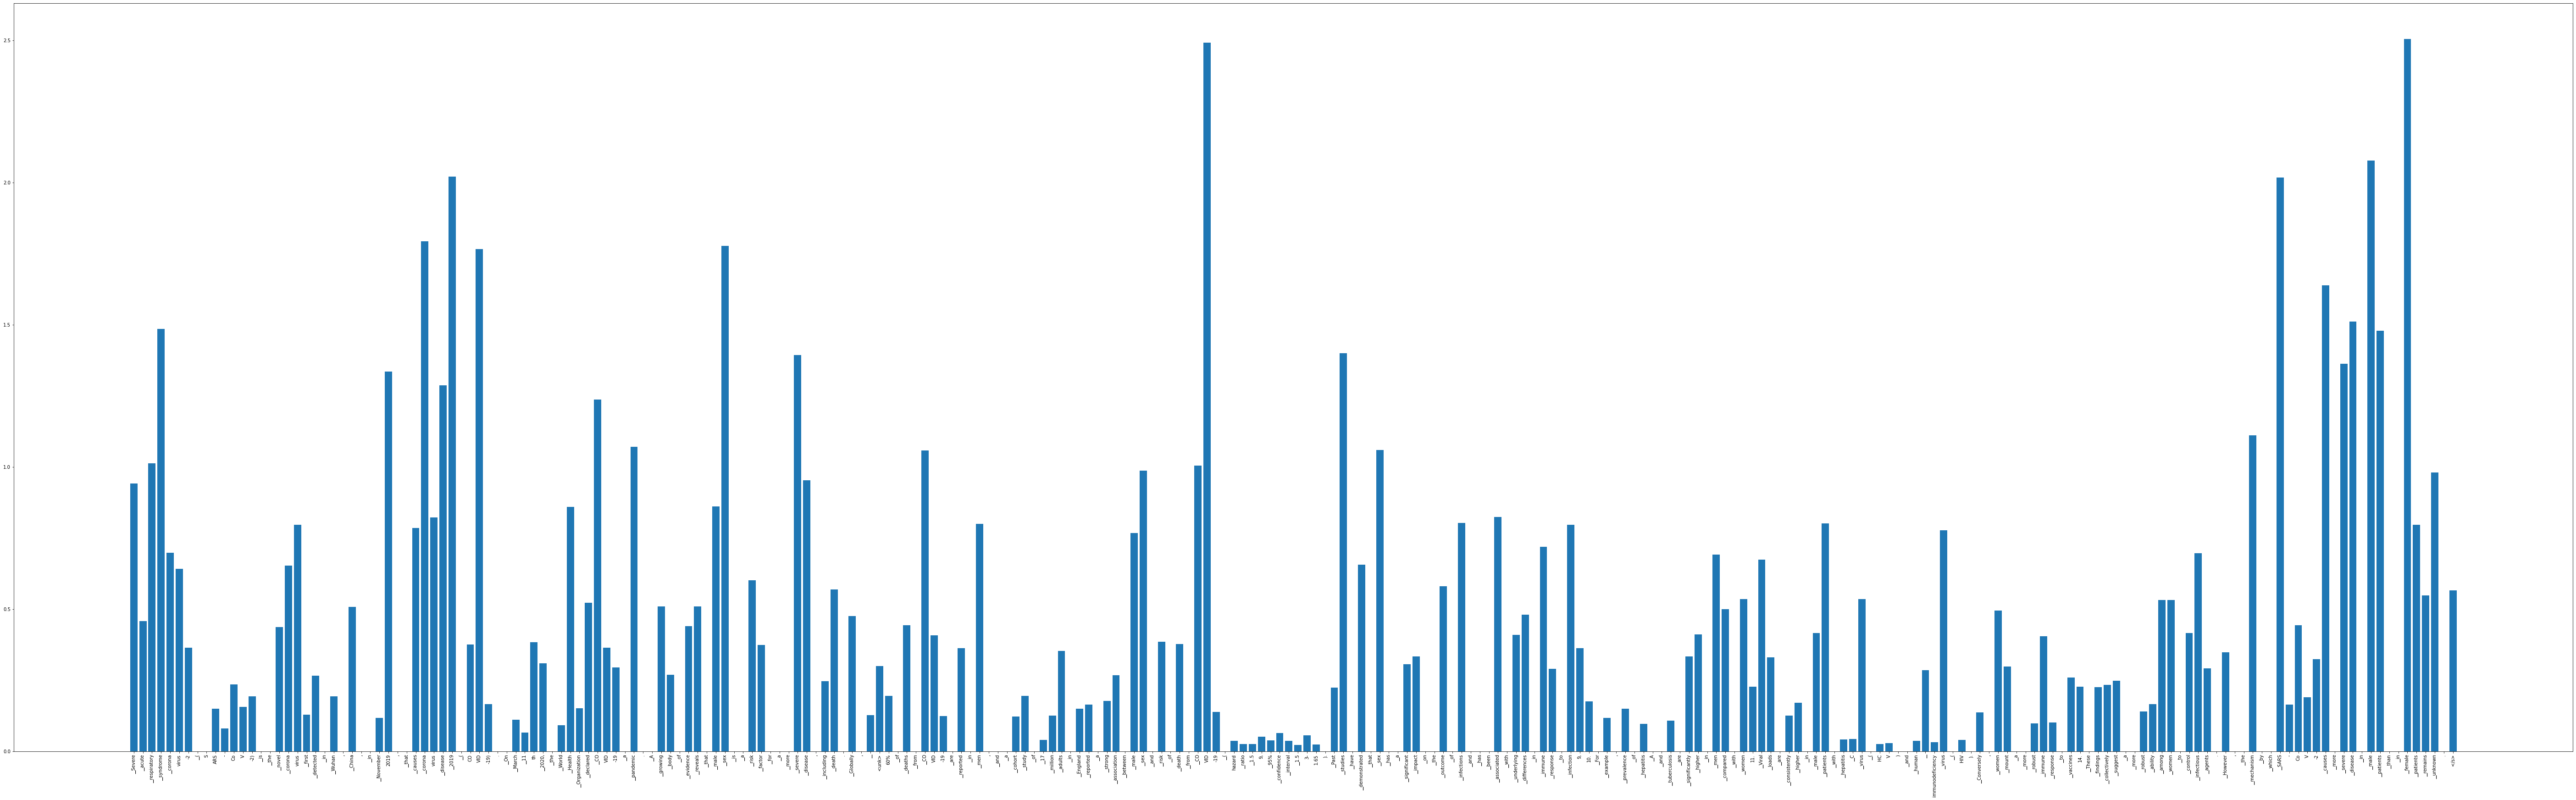

In [18]:
import matplotlib.pyplot as plt
from scipy.special import softmax
import nltk
from nltk.corpus import stopwords

tokens = tokenizer.convert_ids_to_tokens(abatch['input_ids'][0])
cleantokens = [word.lower() if word[0] != u"\u2581" else word[1:].lower() for word in tokens]
displayed_sums = [0 if cleantokens[i] in silence else weight for i, weight in enumerate(total_sums)]
#plt.clf()
#plt.figure()
#plots = []
#for i, head in enumerate(pruned_cross_attns[1]):
plt.clf()
plt.figure()
#plots.append(plt.bar(range(len(head)), head))
plt.bar(range(len(displayed_sums)), displayed_sums)
plt.xticks(range(len(displayed_sums)), tokens, rotation=90)
plt.rcParams["figure.figsize"] = (100,30)
#plt.legend([bar[0] for bar in plots], [i+1 for i in range(17)])
#plt.savefig(f'decoder16head{i+1}.jpg')
plt.show()

In [19]:
tgt_text

['The mechanism by which SARS-CoV-2 causes more severe disease in male patients than in female patients remains unknown.']

In [166]:
print(selected_decoder_attentions[0].shape)
print(torch.sum(selected_decoder_attentions[0], dim = 0).detach().numpy()[0])

torch.Size([16, 1, 59])
[1.60000000e+01 9.59373713e-02 1.51915878e-01 1.46132991e-01
 4.35070276e-01 9.60190594e-02 1.16664201e-01 2.57709831e-01
 2.84323022e-02 3.29022743e-02 1.29938545e-02 8.28684121e-03
 1.01962455e-01 2.70776212e-01 1.11711852e-01 4.98103082e-01
 1.53803125e-01 4.39629883e-01 2.85220742e-01 1.89240962e-01
 9.97714698e-02 2.01578930e-01 6.58280849e+00 3.03612441e-01
 6.55595064e-01 1.95866510e-01 1.69881046e-01 3.62255245e-01
 3.41814160e-02 6.02416657e-02 3.57509553e-01 9.52528194e-02
 1.07646608e+00 6.89059719e-02 9.02533066e-03 1.39020205e-01
 2.46122867e-01 1.68409497e-01 1.86596233e-02 8.26288108e-03
 6.50223950e-03 1.74915455e-02 4.34400700e-02 5.78845032e-02
 2.10980207e-01 5.67144267e-02 4.33525965e-02 8.42464995e-03
 3.34273069e-03 9.66821685e-02 2.26617511e-02 8.54149237e-02
 1.68988273e-01 4.41876762e-02 4.58177105e-02 2.67733447e-02
 1.94088325e-01 3.82006228e-01 1.99306205e-01]


In [154]:
selected_decoder_attentions[1].shape

torch.Size([16, 1, 60])

In [137]:
output_log['decoder_attentions'][0][15][1][15][0]

tensor([1.0000e+00, 2.2978e-03, 1.0446e-02, 1.7079e-02, 2.3257e-02, 8.9168e-03,
        4.8020e-03, 2.2161e-02, 4.9121e-04, 1.3557e-03, 7.3122e-04, 1.7376e-04,
        1.1266e-02, 2.1226e-02, 5.1098e-03, 2.1369e-02, 7.5212e-03, 1.9364e-02,
        4.4955e-03, 1.2412e-02, 4.1982e-03, 1.1906e-02, 4.1509e-01, 1.3994e-02,
        2.5352e-02, 5.9065e-03, 7.3243e-03, 2.1642e-02, 3.2716e-03, 4.3903e-03,
        6.7813e-03, 1.2385e-02, 7.4289e-02, 6.5817e-03, 1.1839e-03, 1.0995e-02,
        1.7861e-02, 1.3331e-02, 7.0247e-04, 4.7617e-04, 1.7016e-04, 1.7114e-03,
        6.8134e-03, 4.9863e-03, 2.0383e-02, 8.8169e-03, 4.1335e-03, 4.6543e-04,
        2.9386e-04, 6.9589e-03, 2.2575e-03, 1.0608e-02, 7.2516e-03, 6.2646e-03,
        1.0053e-02, 3.0386e-03, 7.5720e-03, 2.2790e-02, 2.3301e-02])

In [100]:
output_log['decoder_attentions'][13][15][1][15][0]

tensor([2.8722e-02, 8.3089e-03, 2.5980e-03, 6.0918e-03, 1.1731e-03, 2.4333e-03,
        1.9434e-03, 2.8469e-03, 7.3795e-03, 1.9571e-02, 1.2313e-02, 5.4948e-01,
        1.8431e-01, 1.7283e-01, 6.8611e-06, 1.0578e-05, 3.0016e-03, 2.9447e-04,
        1.5481e-04, 1.9655e-04, 5.3617e-03, 4.7855e-05, 2.6125e-04, 2.0762e-04,
        3.4022e-05, 2.6026e-03, 3.9890e-04, 2.2459e-04, 5.5225e-03, 1.5391e-04,
        6.9985e-05, 1.3958e-05, 1.8020e-05, 3.7600e-06, 1.2585e-05, 9.1784e-01,
        8.2340e-04, 1.9431e-04, 6.9661e-05, 7.7717e-04, 2.7377e-04, 1.0003e-04,
        6.8119e-05, 1.9279e-04, 2.3740e-05, 4.4122e-02, 2.3078e-03, 4.7230e-04,
        2.0673e-04, 1.9061e-03, 2.3923e-04, 8.1185e-05, 1.4170e-04, 1.2791e-05,
        2.0754e-05, 2.9715e-05, 1.6858e-05, 3.4628e-03, 2.5730e-05, 6.8213e-05,
        3.7096e-05, 6.4564e-06, 1.3075e-03, 5.7942e-05, 1.9791e-04, 4.6420e-04,
        1.1948e-04, 6.4999e-04, 3.6054e-05, 1.0675e-03, 5.8461e-05, 3.9229e-03])

In [152]:
len(abatch['input_ids'][0])

58

In [109]:
output_log['decoder_attentions'][26][15].shape

torch.Size([8, 16, 1, 85])

In [63]:
print(len(decoder_attentions))
print(decoder_attentions[15].shape)
print(outputs.decoder_attentions[15][0][15])

16
torch.Size([1, 16, 24, 280])
tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]], grad_fn=<SelectBackward>)


In [17]:
outputs.decoder_attentions[15][0].shape

torch.Size([16, 24, 280])

In [18]:
outputs.decoder_attentions[15][0][15][10]

tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

In [ ]:
#convert to list
decoder_attentions = outputs.decoder_attentions[15][0][15]
decoder_attentions = [each for each in encoder_attentions]
head_sums = []
for l, layer in enumerate(encoder_attentions): # 16
    for b, batch in enumerate(layer): #1
        layers = []
        for h, head in enumerate(batch): # 16
            layers.append(torch.sum(head, dim = 0).detach().numpy())
            #layers.append(np.sum(softmax(head.detach().numpy()), axis = 0))
        head_sums.append(layers)
layer_sums = [np.array(layer).sum(axis = 0) for layer in head_sums]
final_layer_sum = layer_sums[-1]
total_sum = np.array(layer_sums).sum(axis = 0)
#total_prod = np.array(layer_sums).prod(axis = 0)

In [40]:
model.config.is_encoder_decoder

True

In [ ]:
model_inputs = decoder_attentions
pickle.dump( model_inputs, open( "model_inputs.p", "wb" ) )

In [108]:
n = 5
print(len(decoder_attentions[n]['past_key_values'][0]['encoder_decoder']['prev_key']))
#print(len(decoder_attentions[n]['past_key_values'][0]['self']['prev_key'][7]))
print(decoder_attentions[n]['past_key_values'][0]['self']['prev_key'][0].size())
print(len(decoder_attentions[n]['past_key_values']))
print(decoder_attentions[n]['past_key_values'][15]['self'])
decoder_attentions[n]['past_key_values'][0]['encoder_decoder'].keys()

8
torch.Size([16, 6, 64])
16


dict_keys(['prev_key', 'prev_value', 'prev_key_padding_mask'])

In [16]:
print(len(decoder_attentions[0]['encoder_outputs']))
print(decoder_attentions[0]['encoder_outputs'][0].size())
print(decoder_attentions[0]['encoder_outputs'][0])

NameError: name 'decoder_attentions' is not defined

In [69]:
decoder_attentions[0][15].size()

torch.Size([8, 16, 1, 1])

In [ ]:
print(translated)
tokenizer.batch_decode(translated, skip_special_tokens=False)

In [37]:
print(translated['decoder_attentions'][0].size())


torch.Size([1, 16, 55, 55])


In [29]:
tokenizer.batch_decode(translated, skip_special_tokens=True)


['The mechanism by which SARS-CoV-2 causes more severe disease in male patients than in female patients remains unknown.']

# Vis

In [430]:
abatch = tokenizer.prepare_seq2seq_batch(src_text, truncation=True, padding='longest').to(torch_device)


In [23]:
tokens = tokenizer.convert_ids_to_tokens(abatch['input_ids'][0])

In [24]:
tokens

['▁Severe',
 '▁acute',
 '▁respiratory',
 '▁syndrome',
 '▁corona',
 'virus',
 '-2',
 '▁(',
 'S',
 'ARS',
 '-',
 'Co',
 'V',
 '-2)',
 '▁is',
 '▁the',
 '▁novel',
 '▁corona',
 'virus',
 '▁first',
 '▁detected',
 '▁in',
 '▁Wuhan',
 ',',
 '▁China',
 ',',
 '▁in',
 '▁November',
 '2019',
 ',',
 '▁that',
 '▁causes',
 '▁corona',
 'virus',
 '▁disease',
 '▁2019',
 '▁(',
 'CO',
 'VID',
 '-19)',
 '.',
 '▁On',
 '▁March',
 '▁11',
 'th',
 '▁2020,',
 '▁the',
 '▁World',
 '▁Health',
 '▁Organization',
 '▁declared',
 '▁CO',
 'VID',
 '-19',
 '▁a',
 '▁pandemic',
 '.',
 '▁A',
 '▁growing',
 '▁body',
 '▁of',
 '▁evidence',
 '▁reveals',
 '▁that',
 '▁male',
 '▁sex',
 '▁is',
 '▁a',
 '▁risk',
 '▁factor',
 '▁for',
 '▁a',
 '▁more',
 '▁severe',
 '▁disease',
 ',',
 '▁including',
 '▁death',
 '.',
 '▁Globally',
 ',',
 '▁',
 '<unk>',
 '60%',
 '▁of',
 '▁deaths',
 '▁from',
 '▁CO',
 'VID',
 '-19',
 '▁are',
 '▁reported',
 '▁in',
 '▁men',
 ',',
 '▁and',
 '▁a',
 '▁cohort',
 '▁study',
 '▁of',
 '▁17',
 '▁million',
 '▁adults',
 '▁in',

# With Self Attentions

In [11]:
import matplotlib.pyplot as plt
from scipy.special import softmax


In [12]:
translated['decoder_attentions'][15][0].size()

torch.Size([16, 55, 55])

In [13]:
import matplotlib.pyplot as plt
from scipy.special import softmax

#convert to list
decoder_attentions = translated.decoder
encoder_attentions = [each for each in encoder_attentions]
head_sums = []
for l, layer in enumerate(encoder_attentions): # 16
    for b, batch in enumerate(layer): #1
        layers = []
        for h, head in enumerate(batch): # 16
            layers.append(torch.sum(head, dim = 0).detach().numpy())
            #layers.append(np.sum(softmax(head.detach().numpy()), axis = 0))
        head_sums.append(layers)
layer_sums = [np.array(layer).sum(axis = 0) for layer in head_sums]
final_layer_sum = layer_sums[-1]
total_sum = np.array(layer_sums).sum(axis = 0)
#total_prod = np.array(layer_sums).prod(axis = 0)

In [ ]:
final_layer_sum

In [ ]:
head_sums[-1]

In [ ]:
for each in head_sums[-1]:
    print (each)

In [ ]:
len(encoder_attentions[15][0][15])

<Figure size 7200x4320 with 0 Axes>

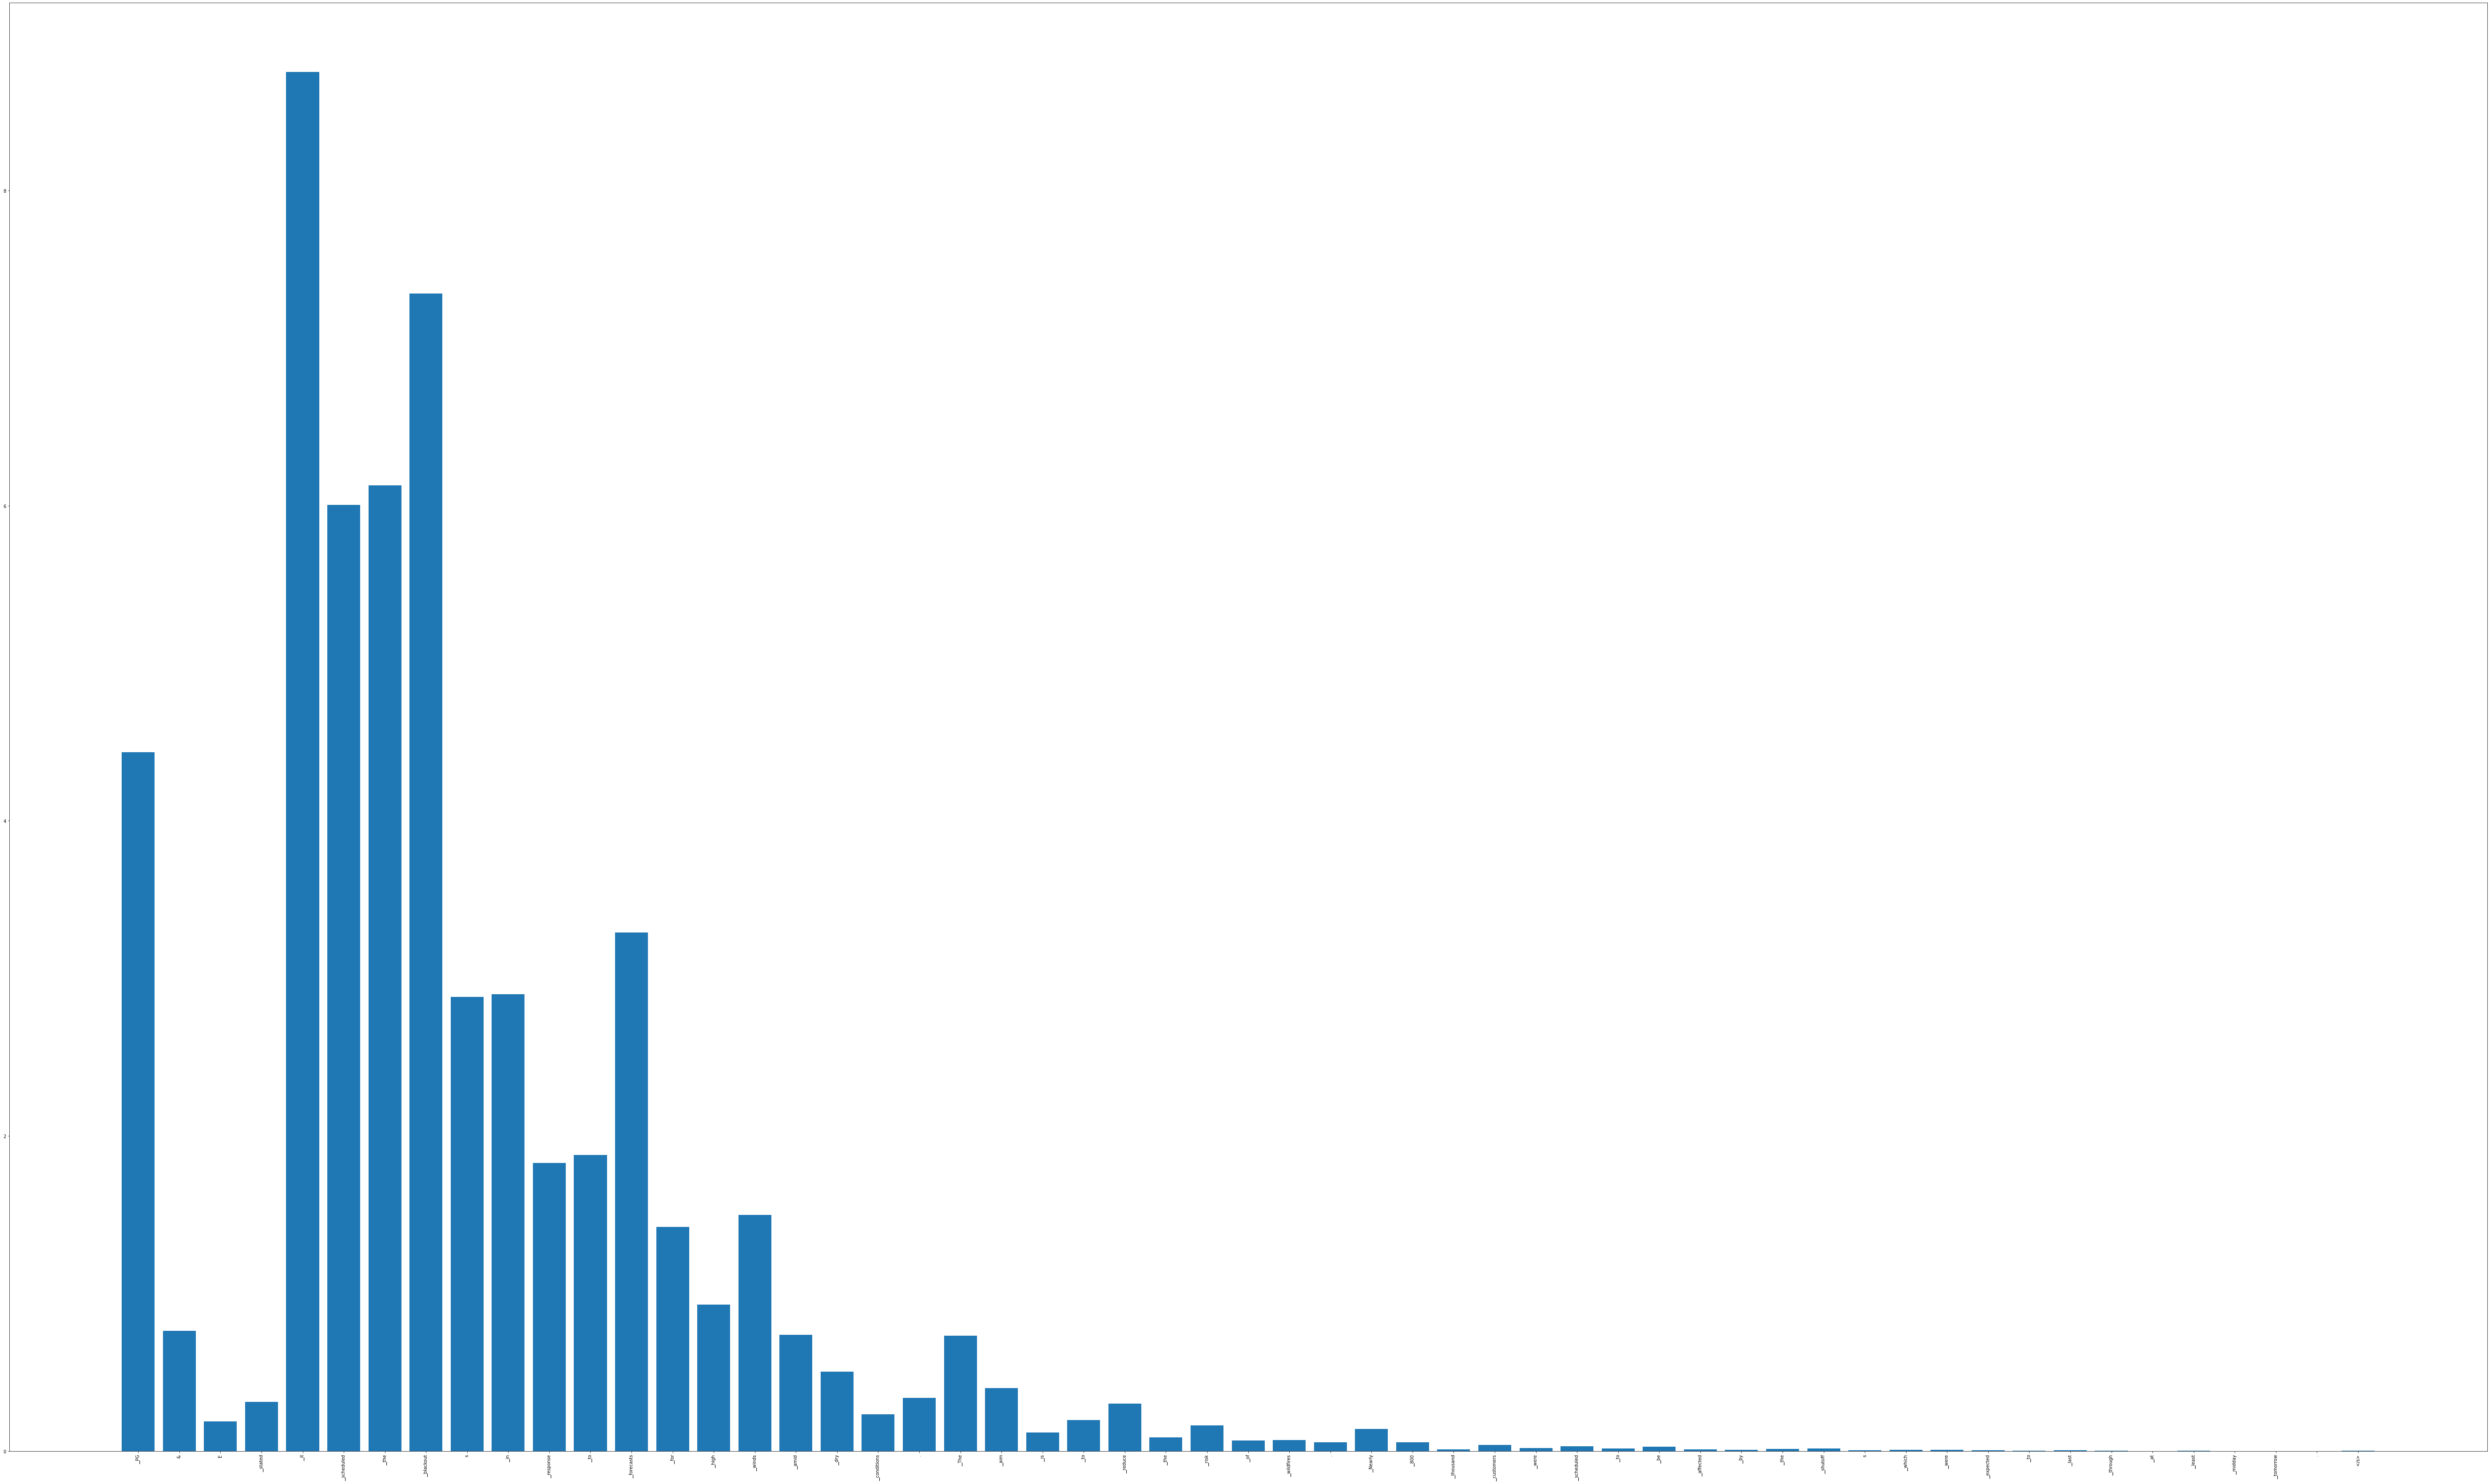

<Figure size 7200x4320 with 0 Axes>

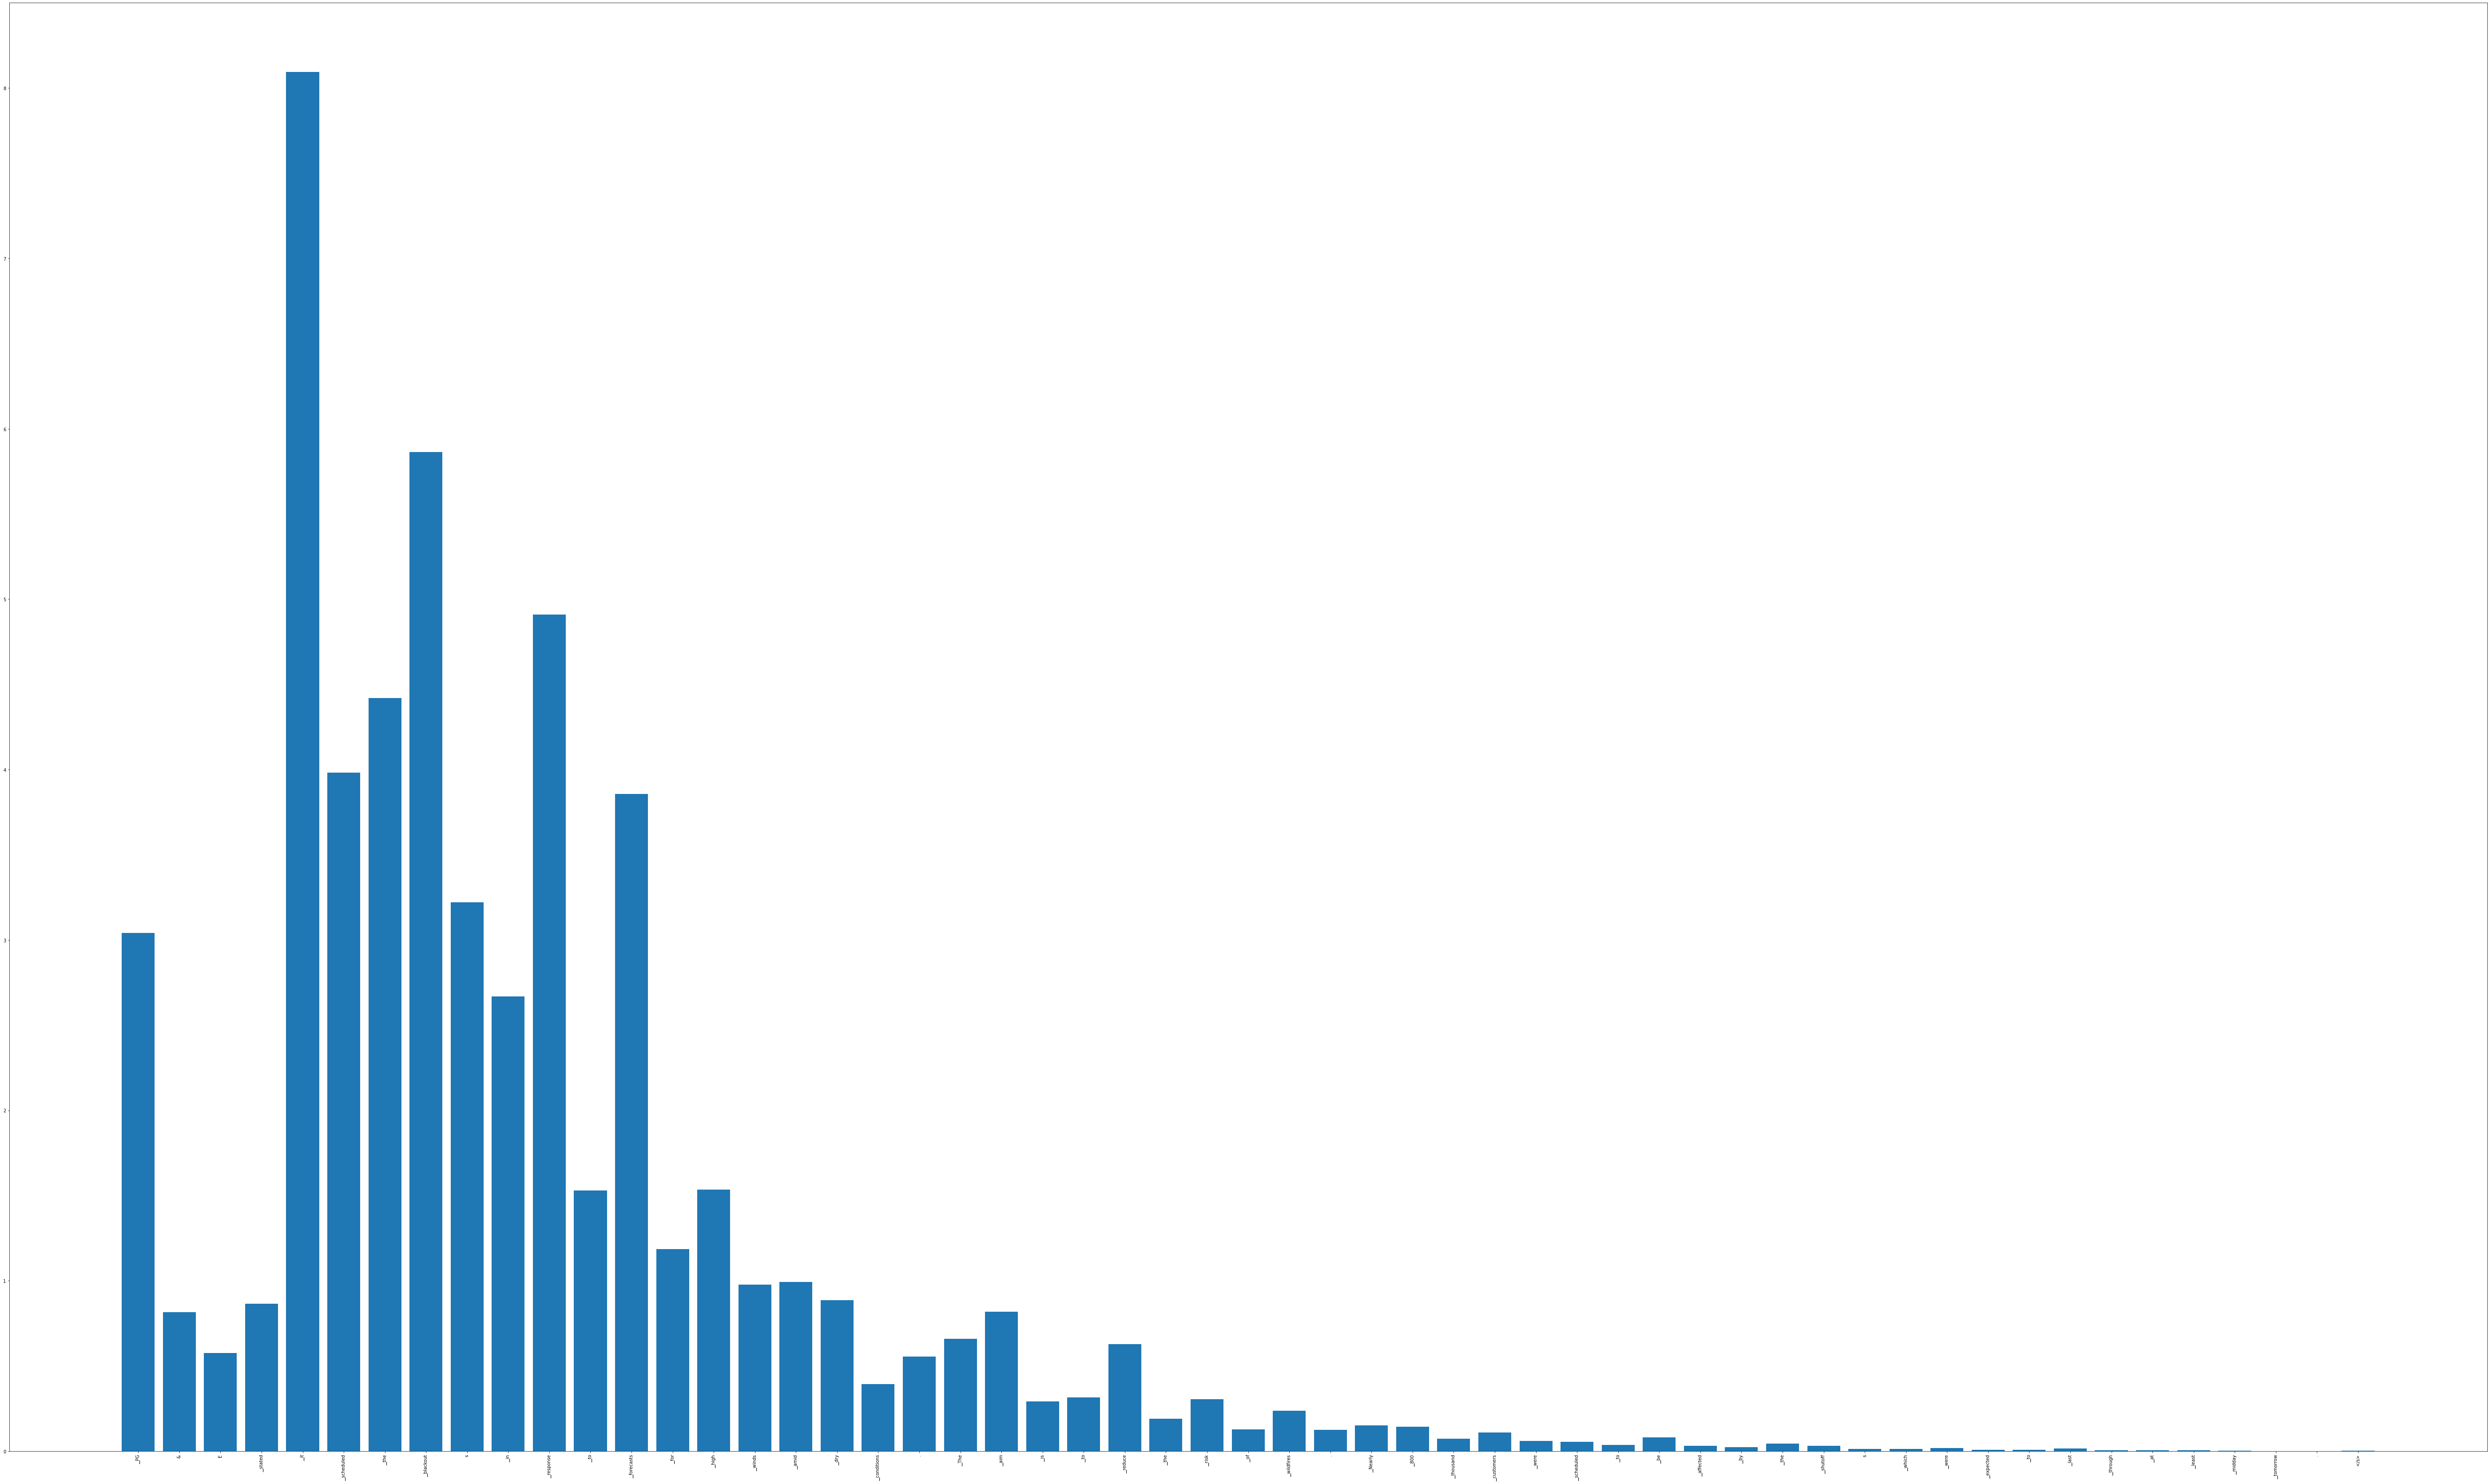

<Figure size 7200x4320 with 0 Axes>

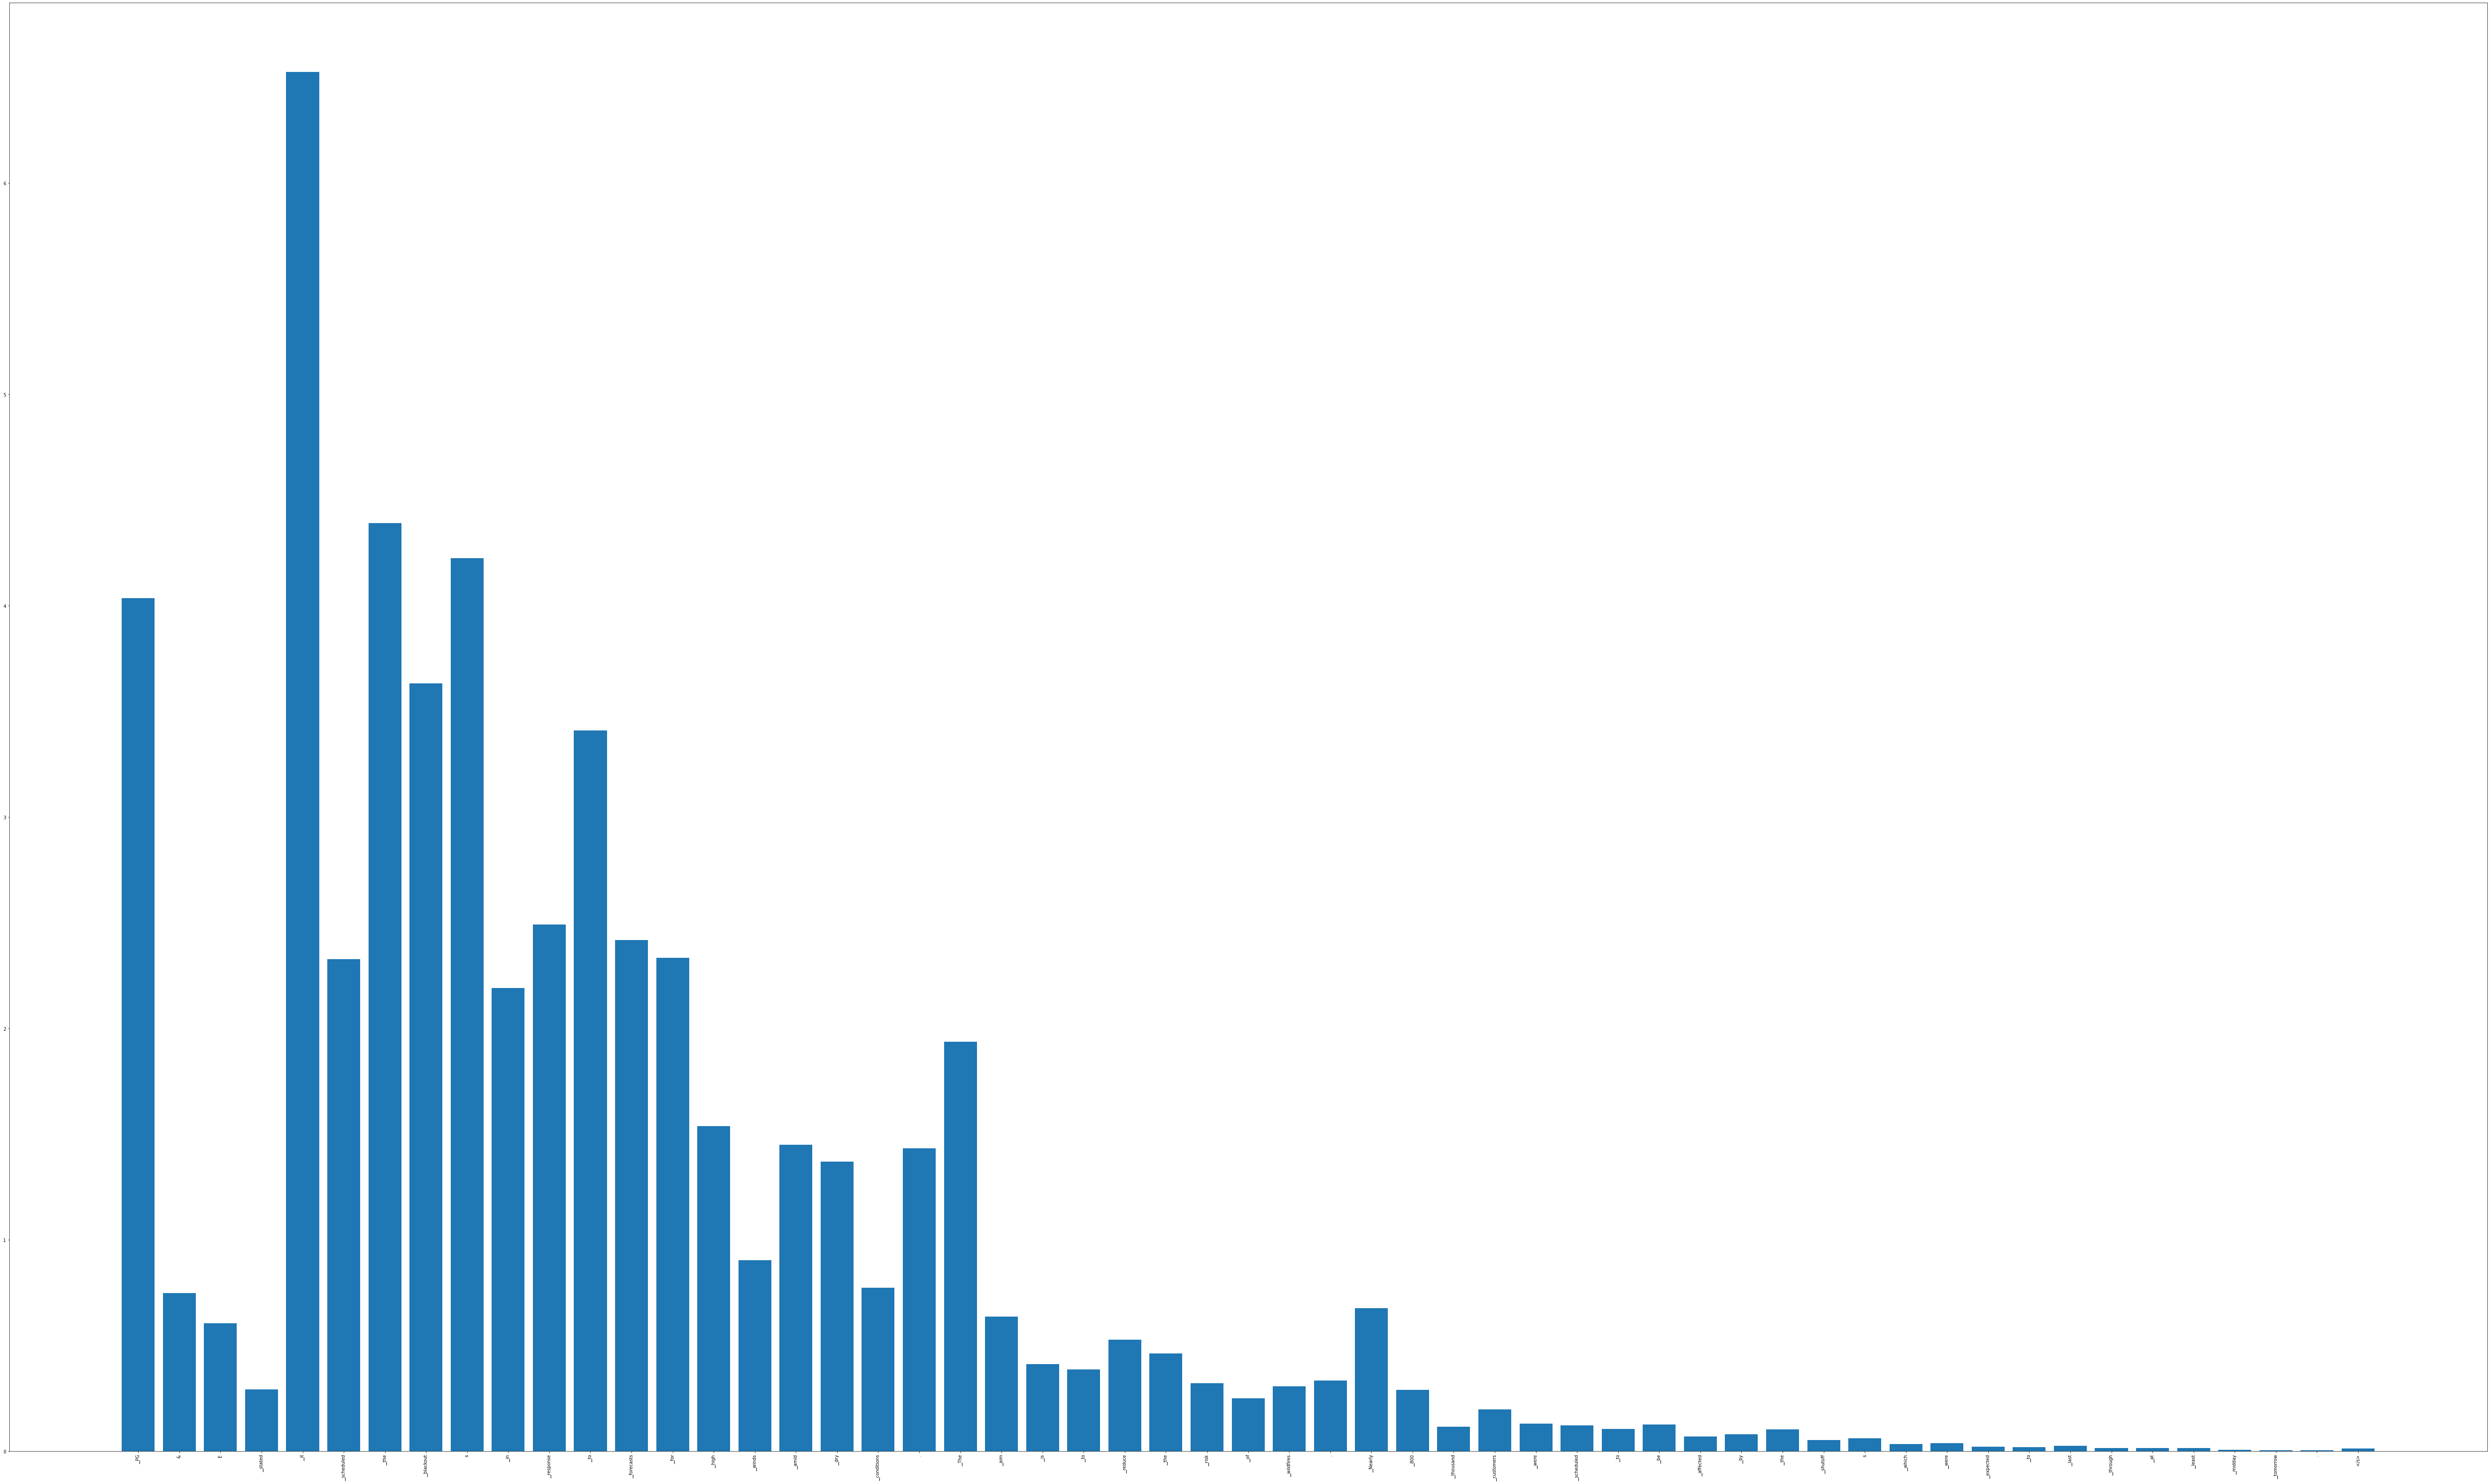

<Figure size 7200x4320 with 0 Axes>

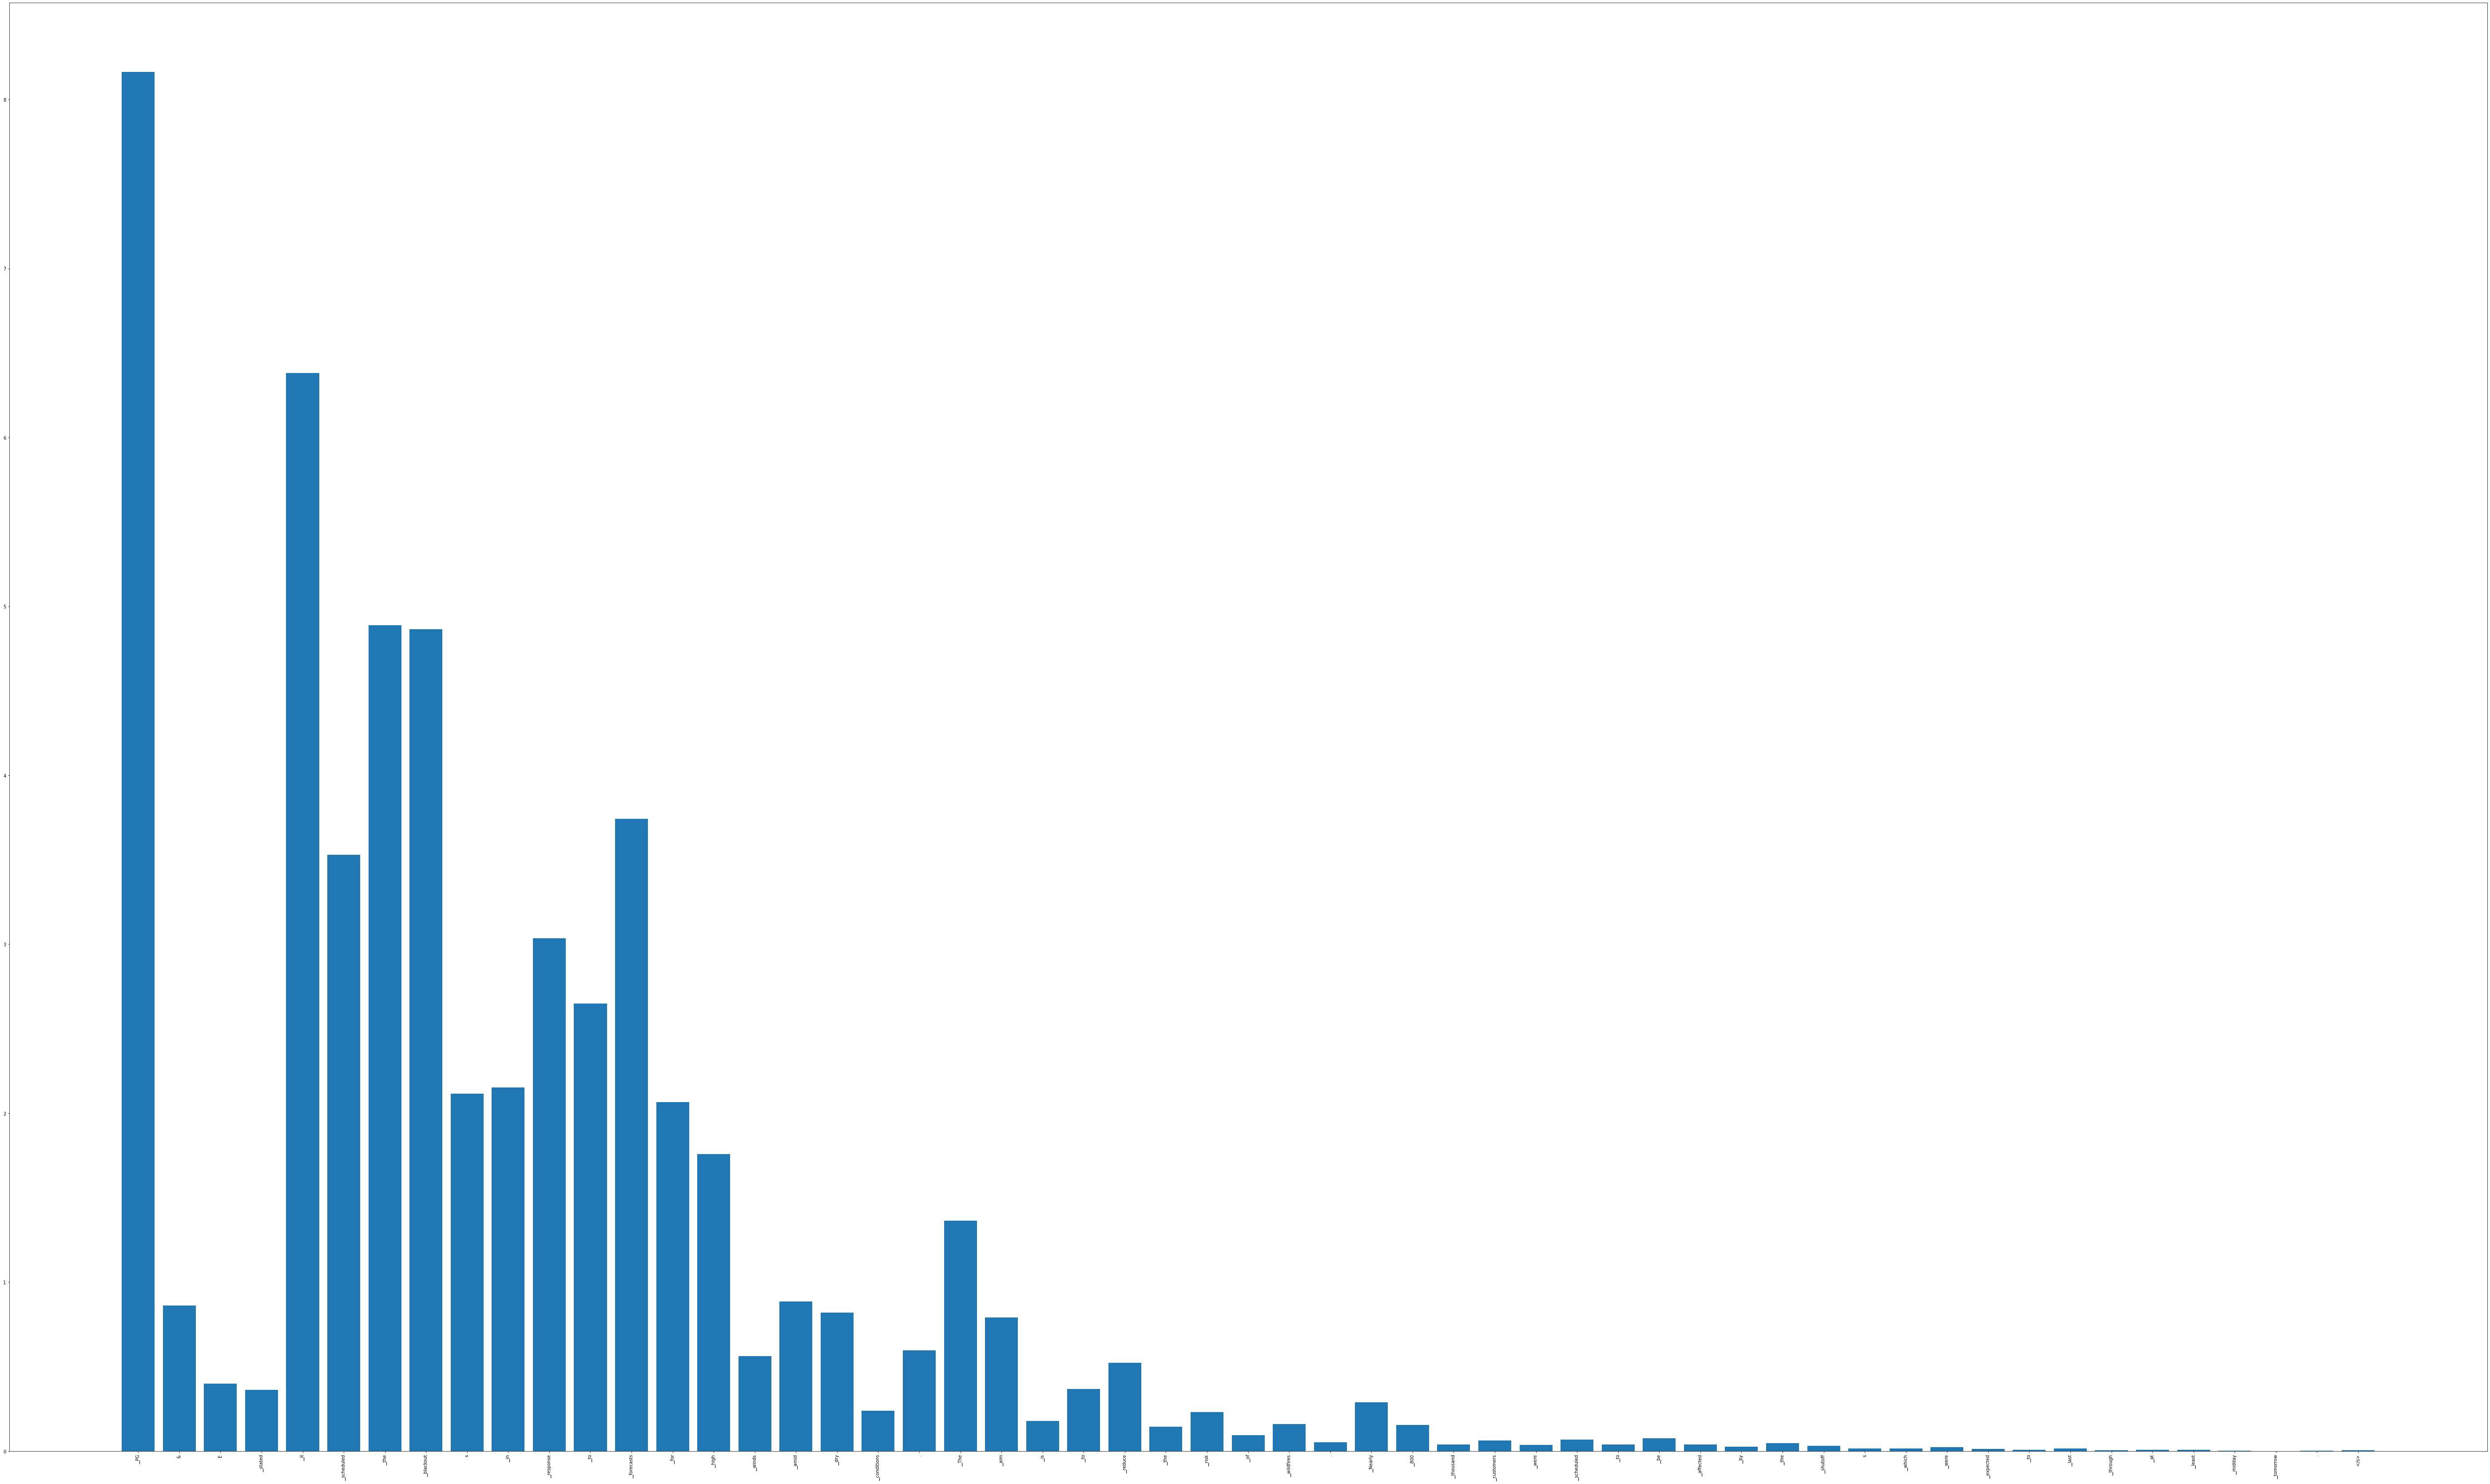

<Figure size 7200x4320 with 0 Axes>

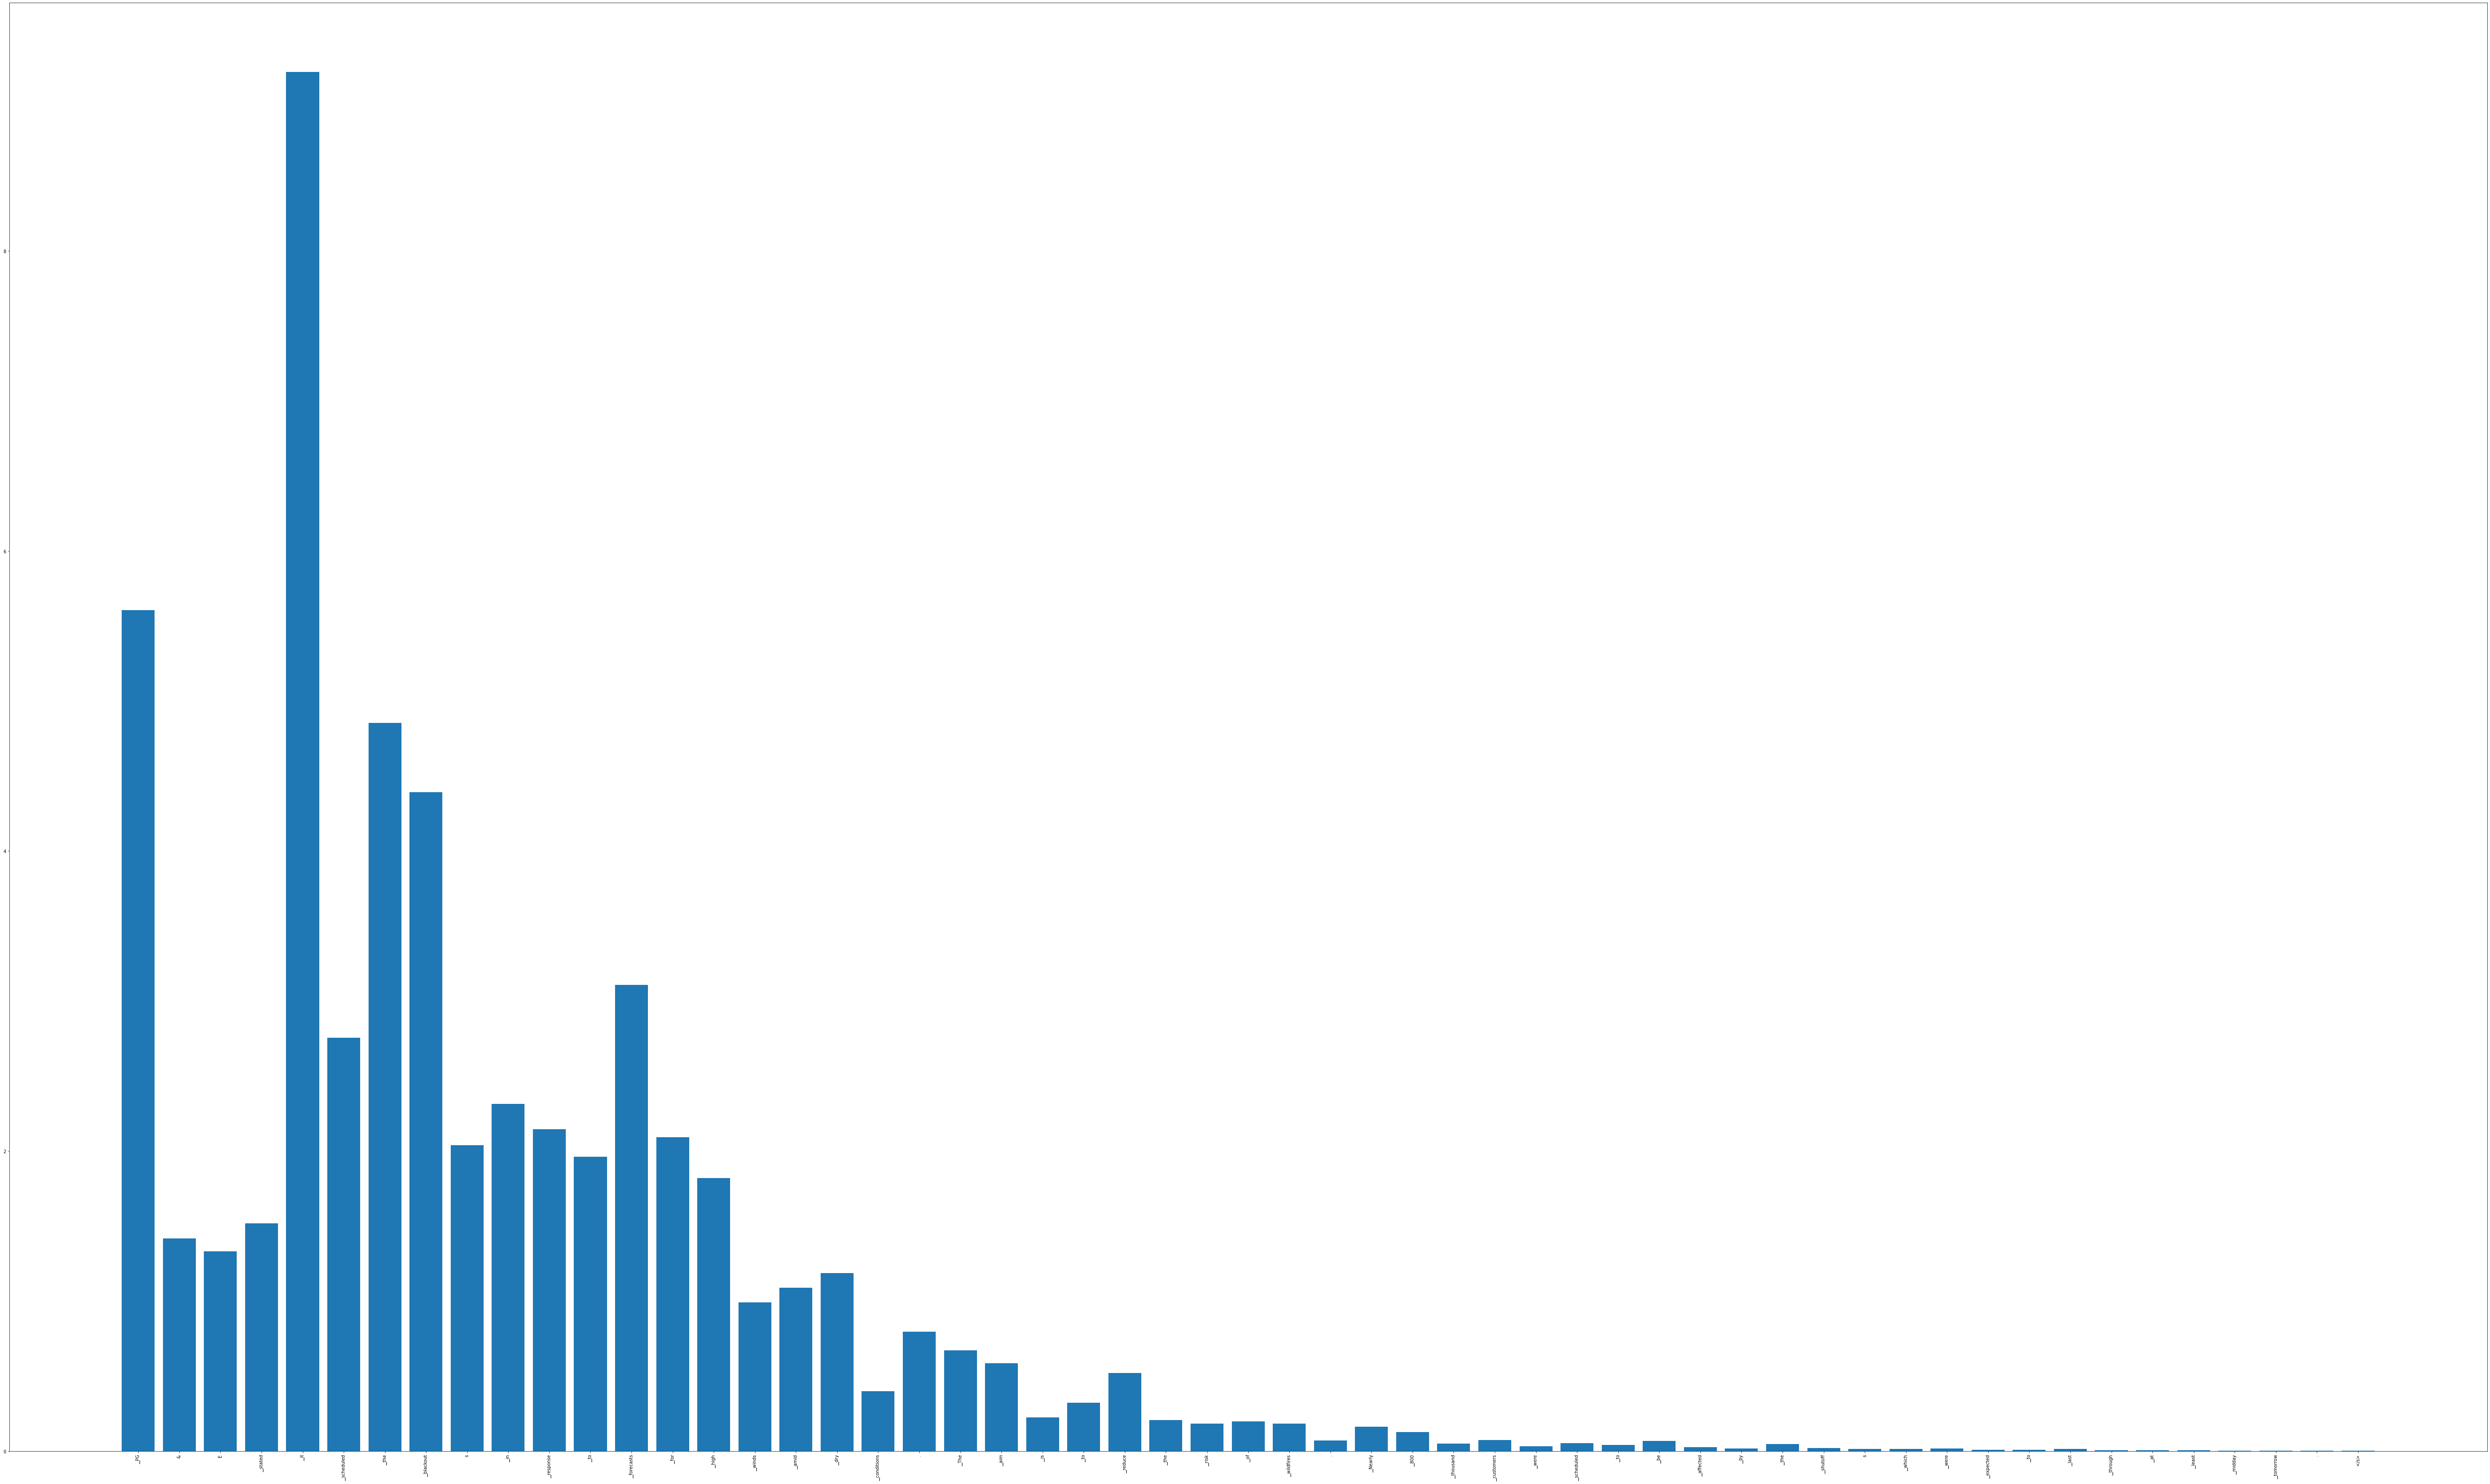

<Figure size 7200x4320 with 0 Axes>

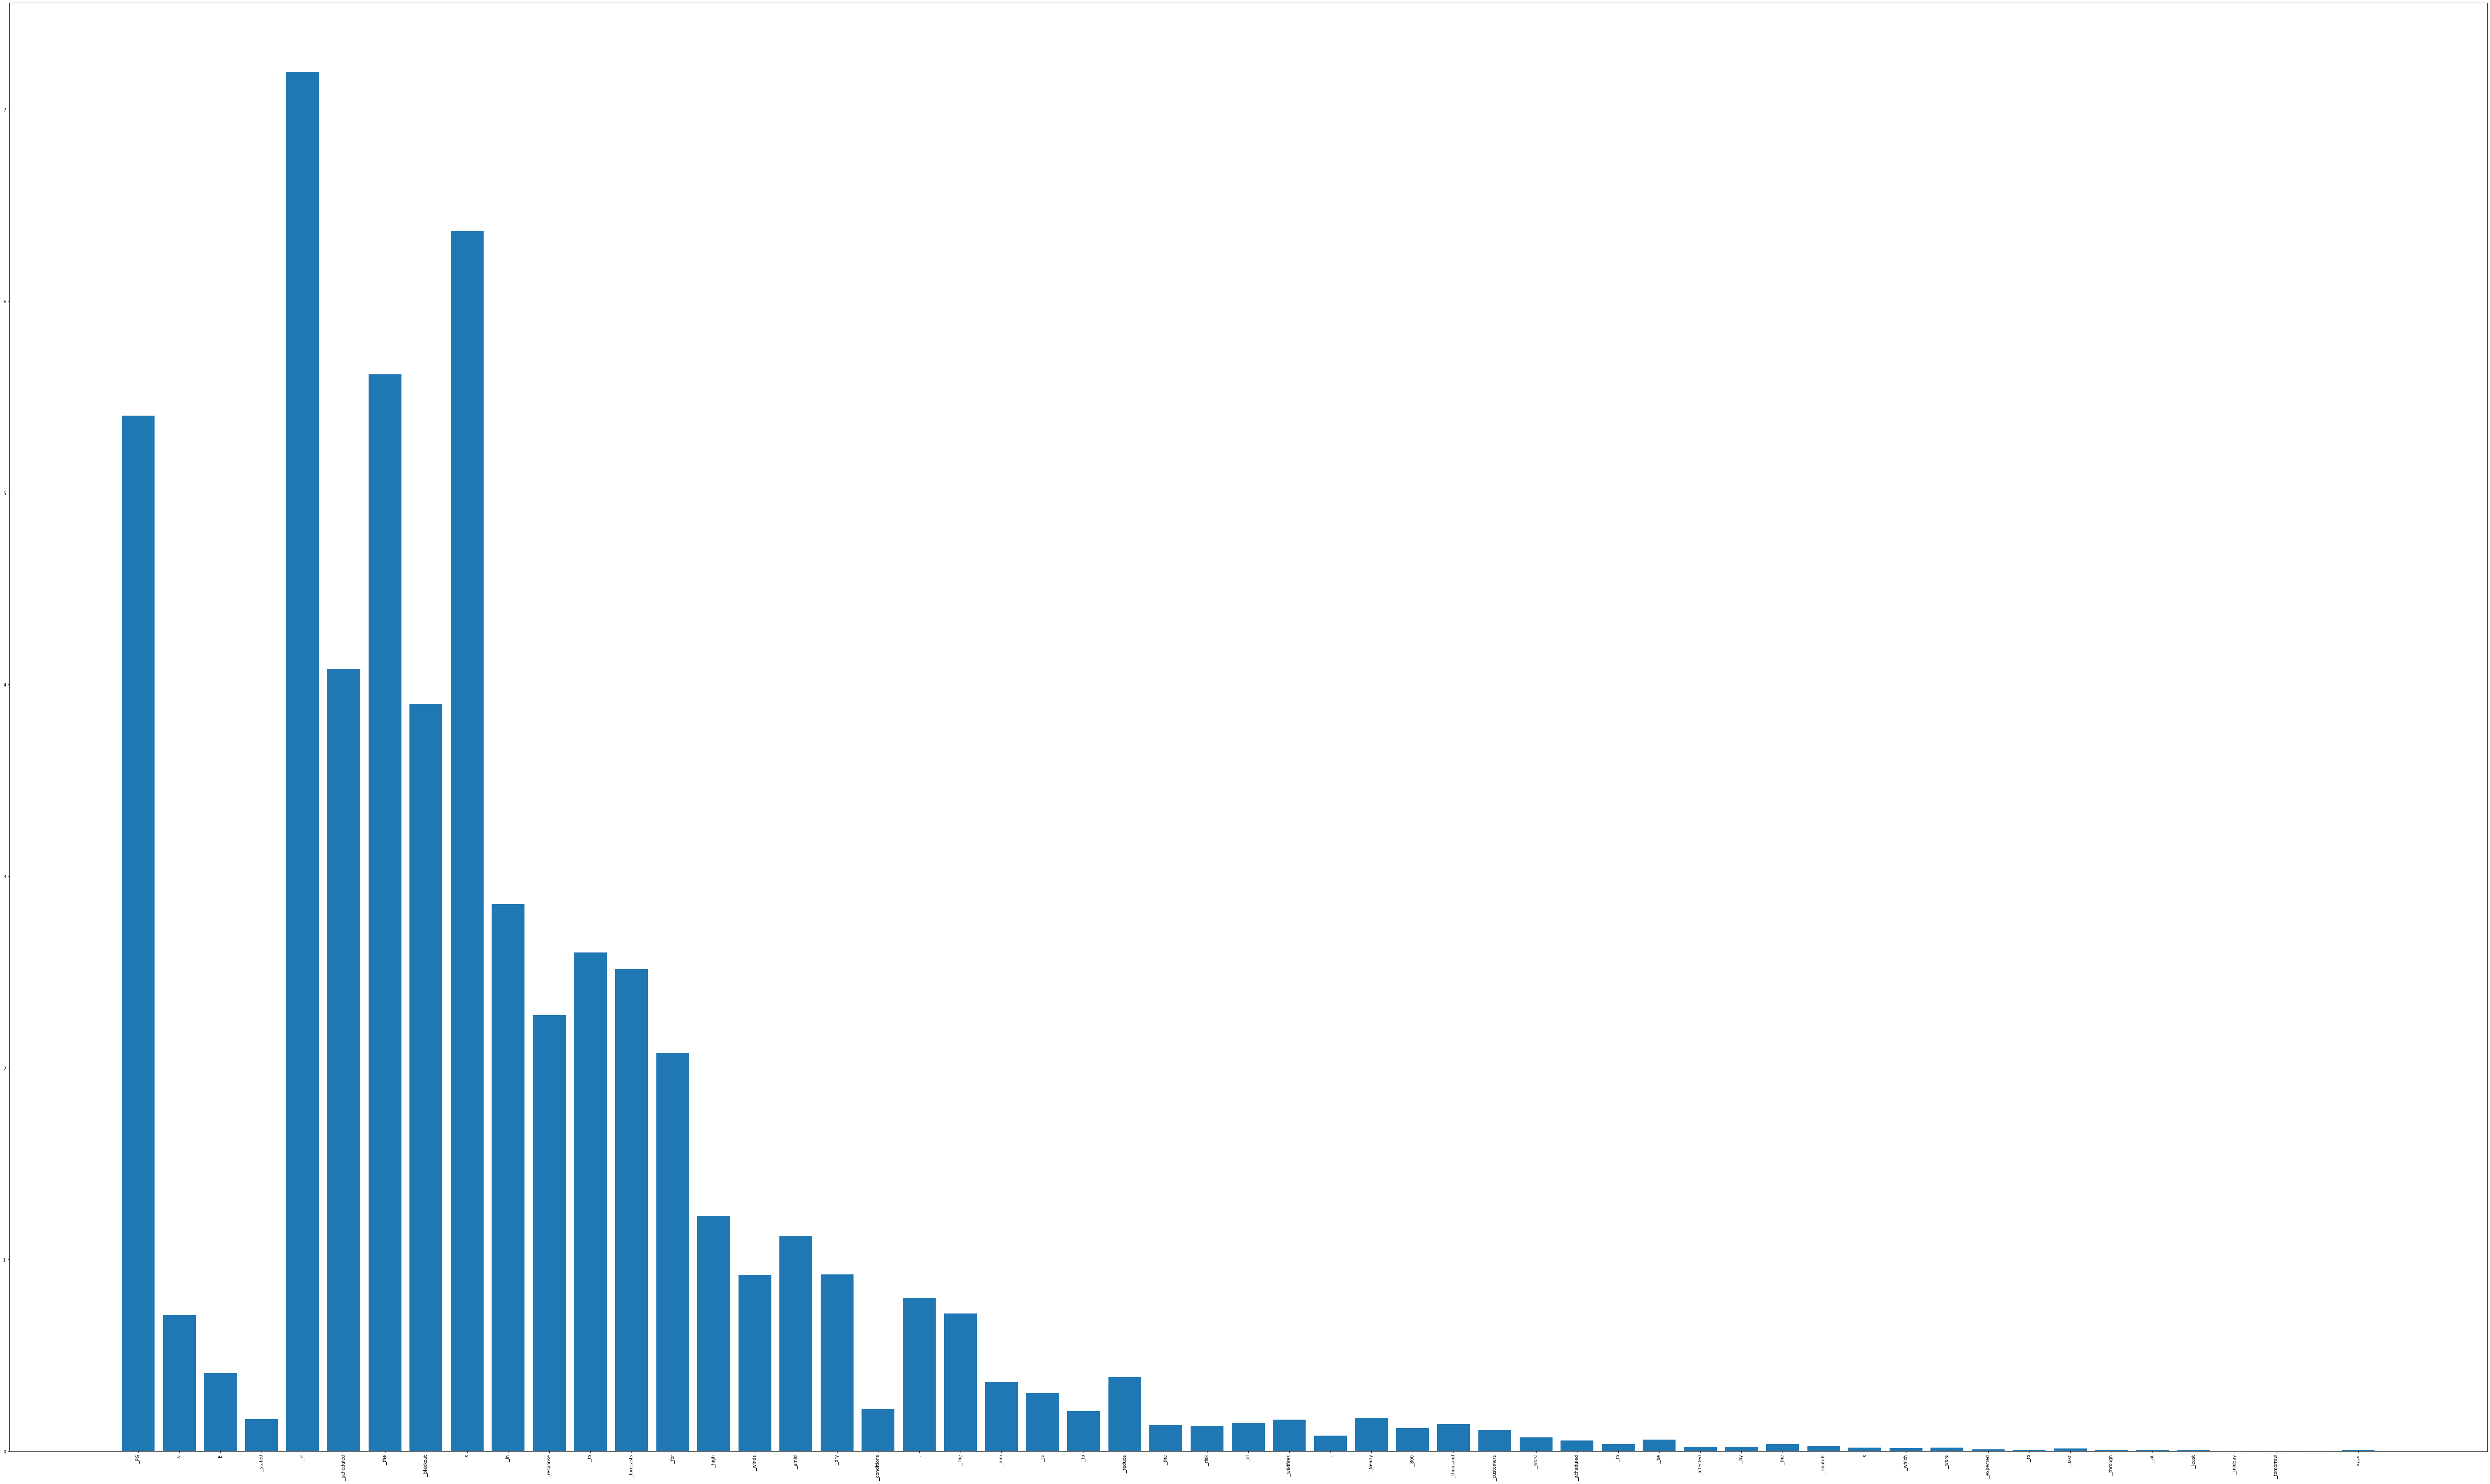

<Figure size 7200x4320 with 0 Axes>

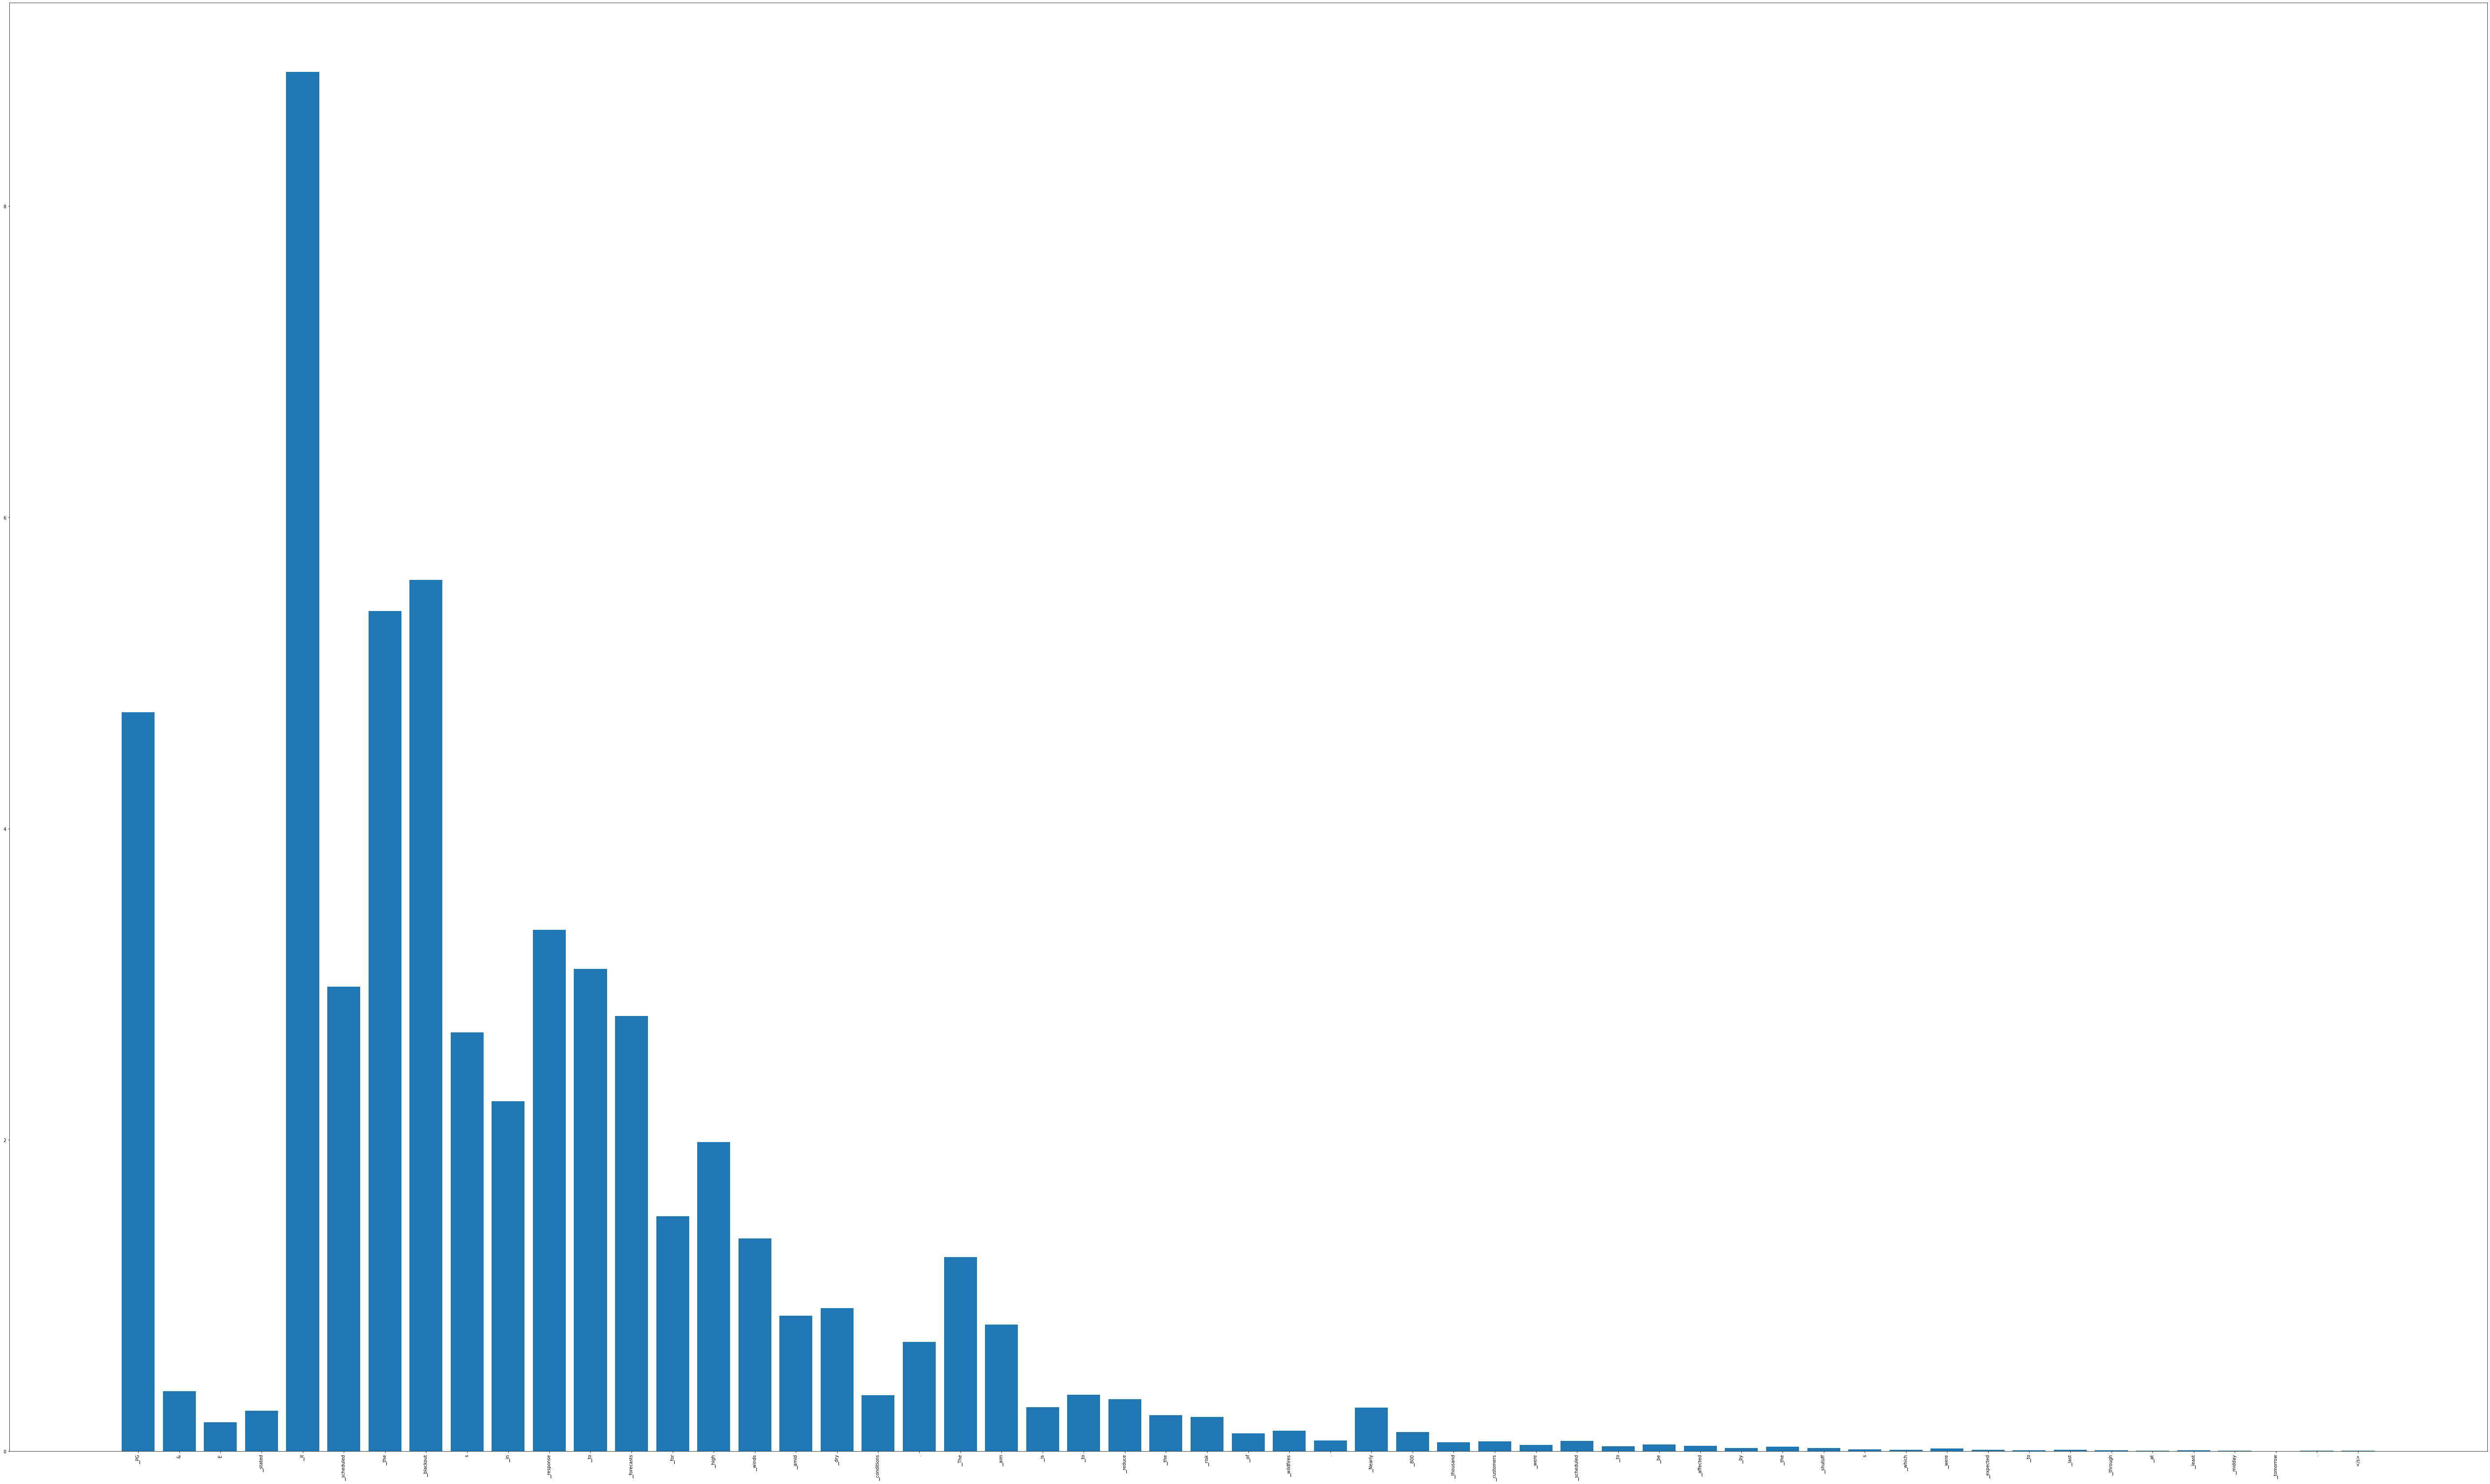

<Figure size 7200x4320 with 0 Axes>

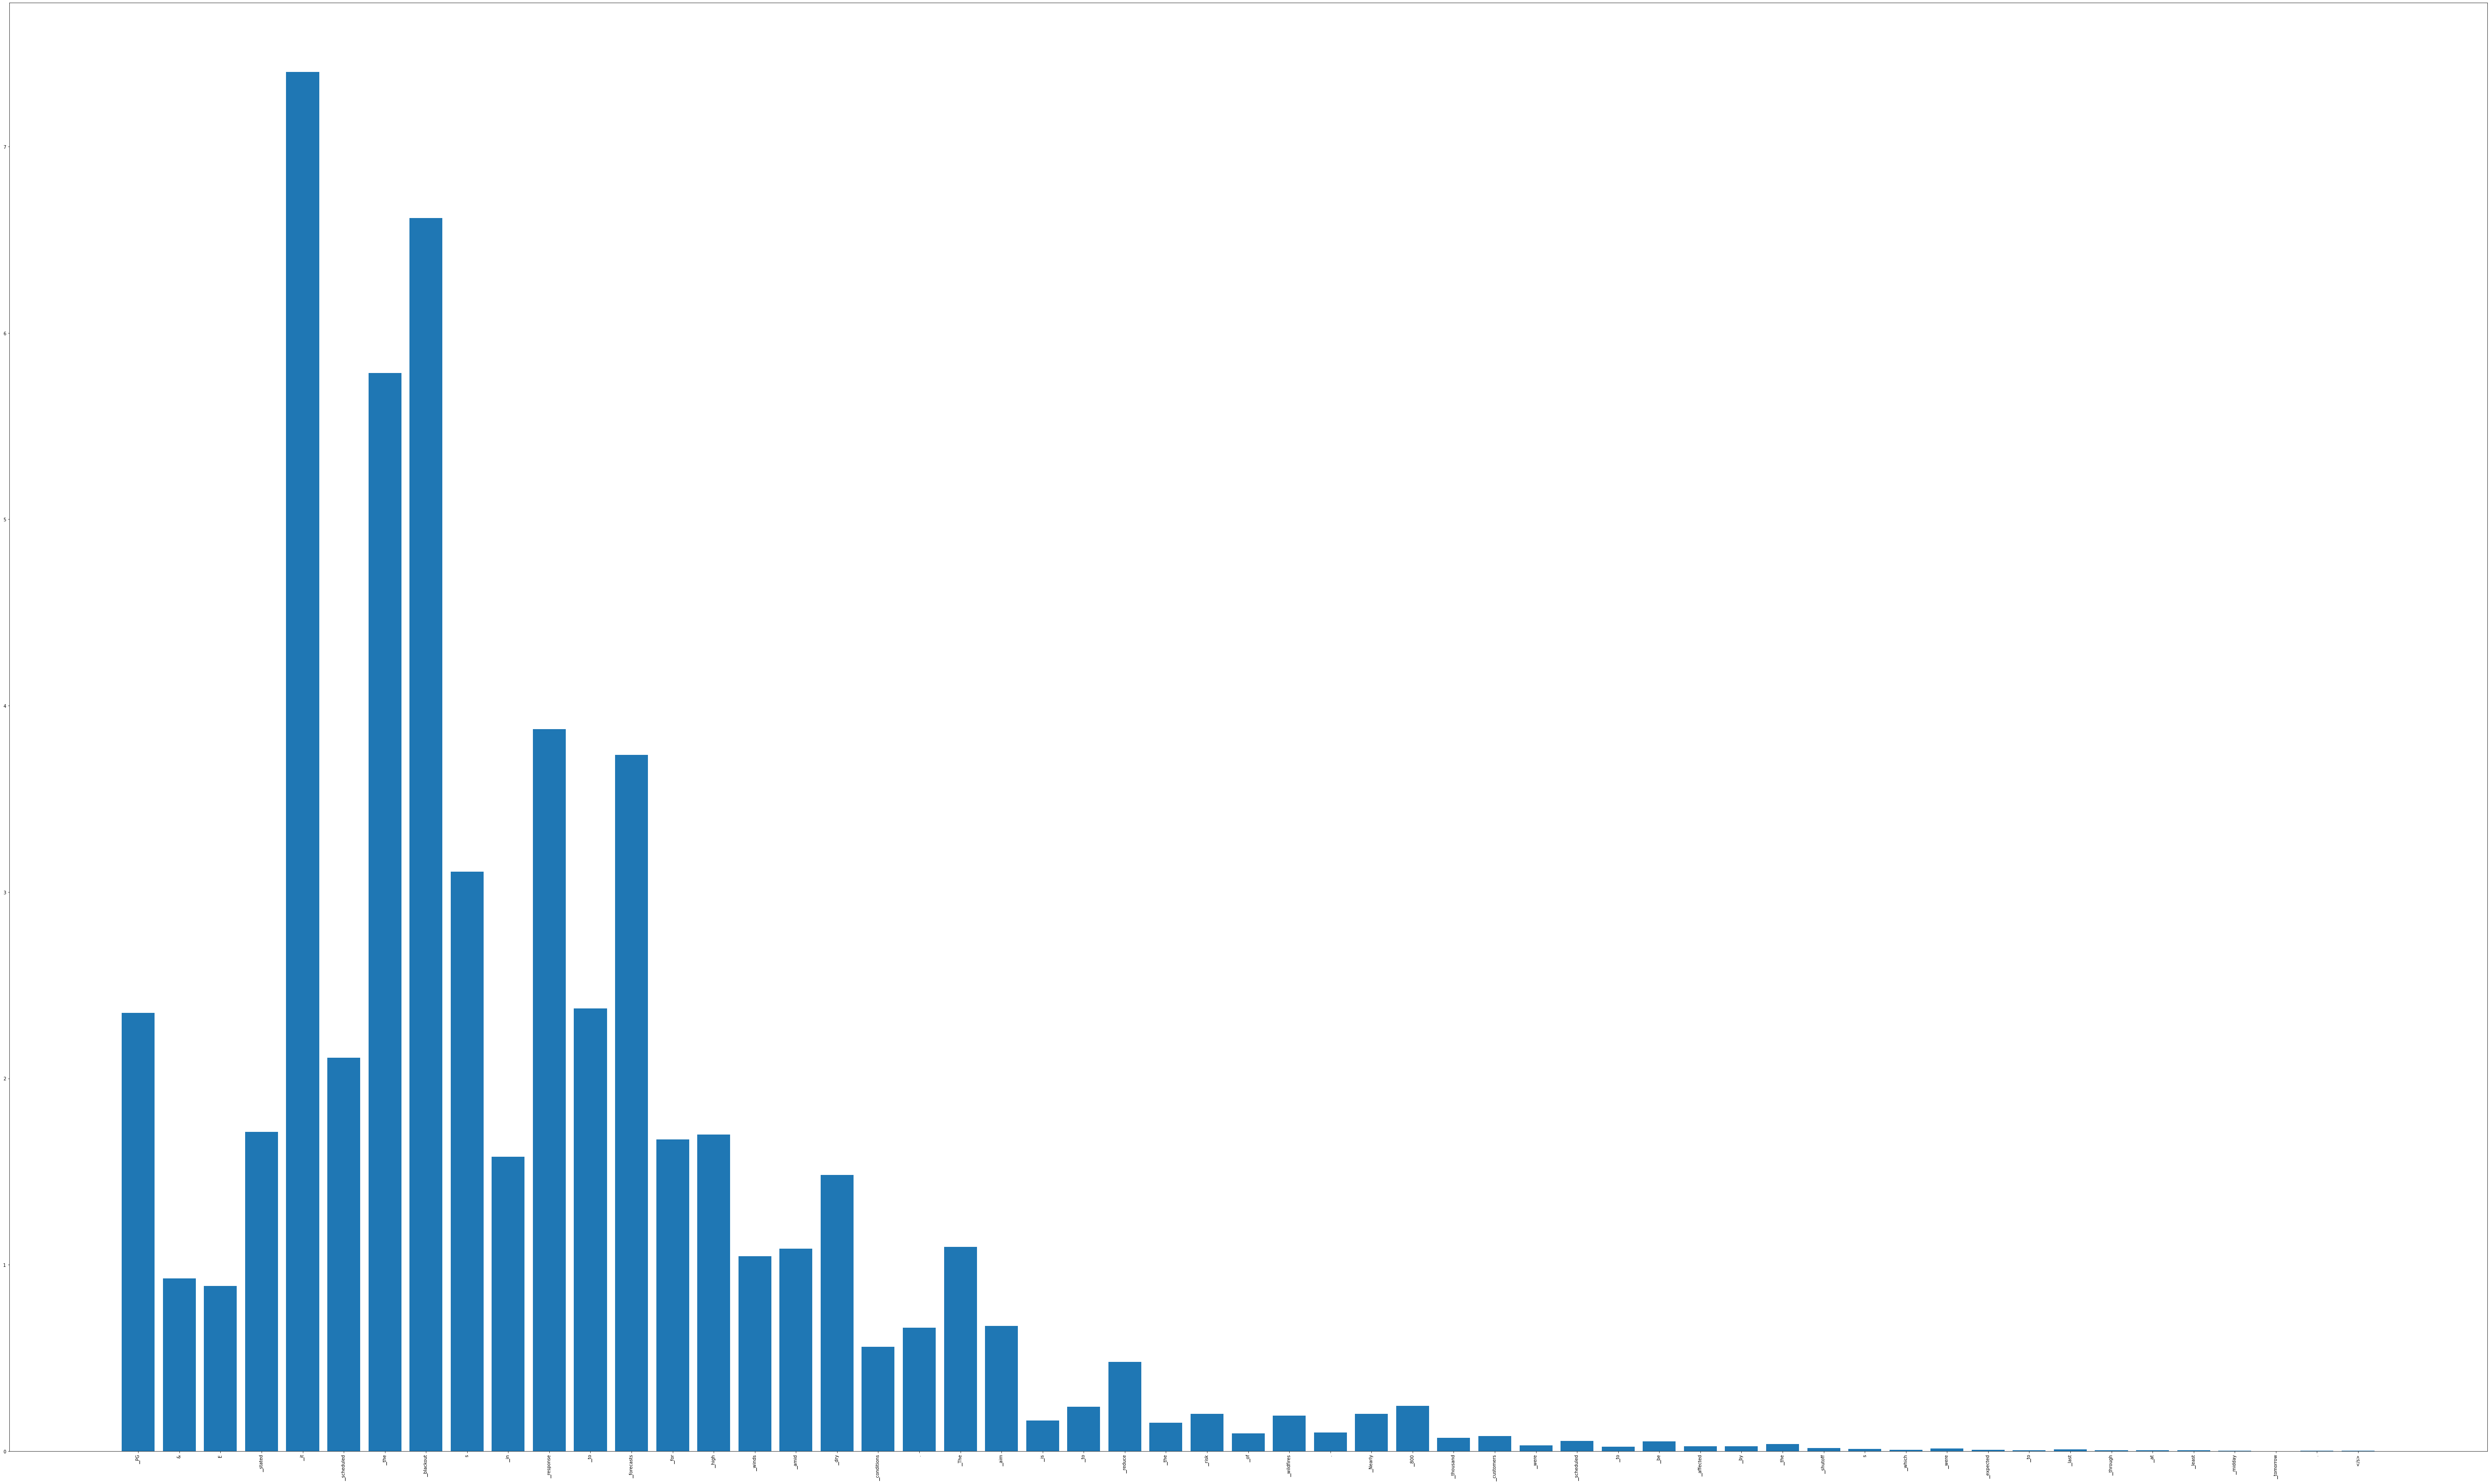

<Figure size 7200x4320 with 0 Axes>

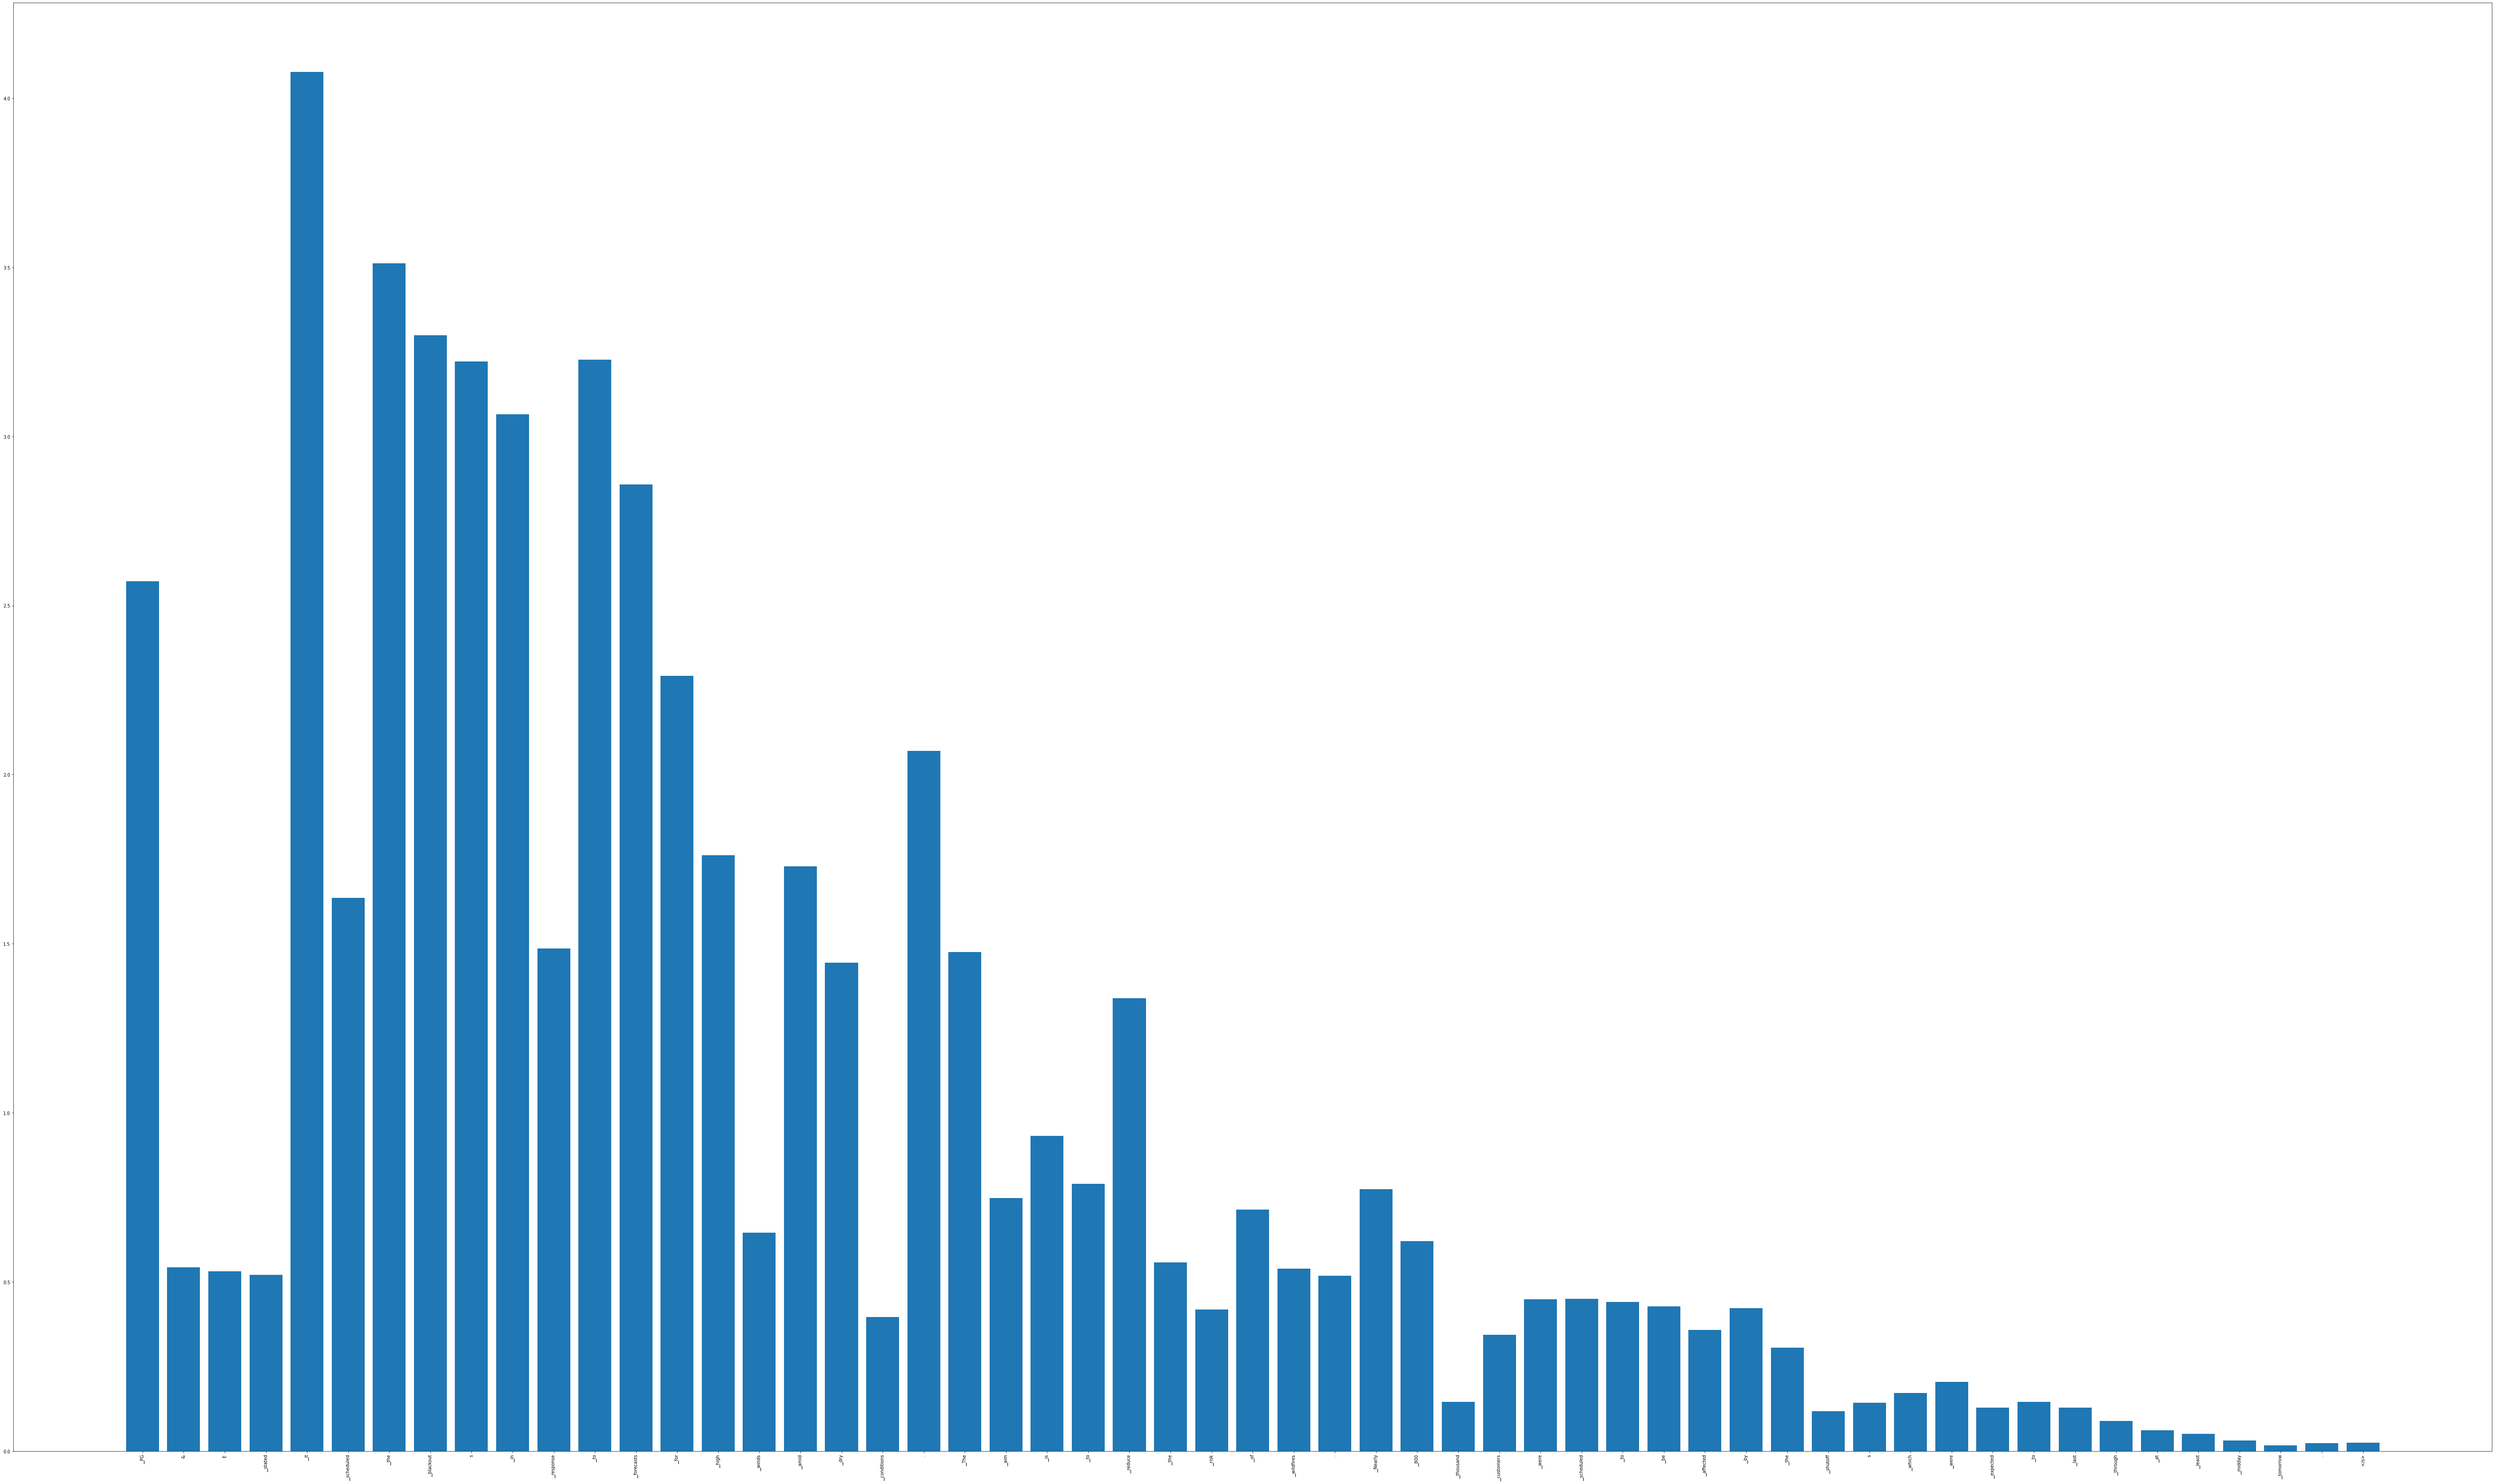

<Figure size 7200x4320 with 0 Axes>

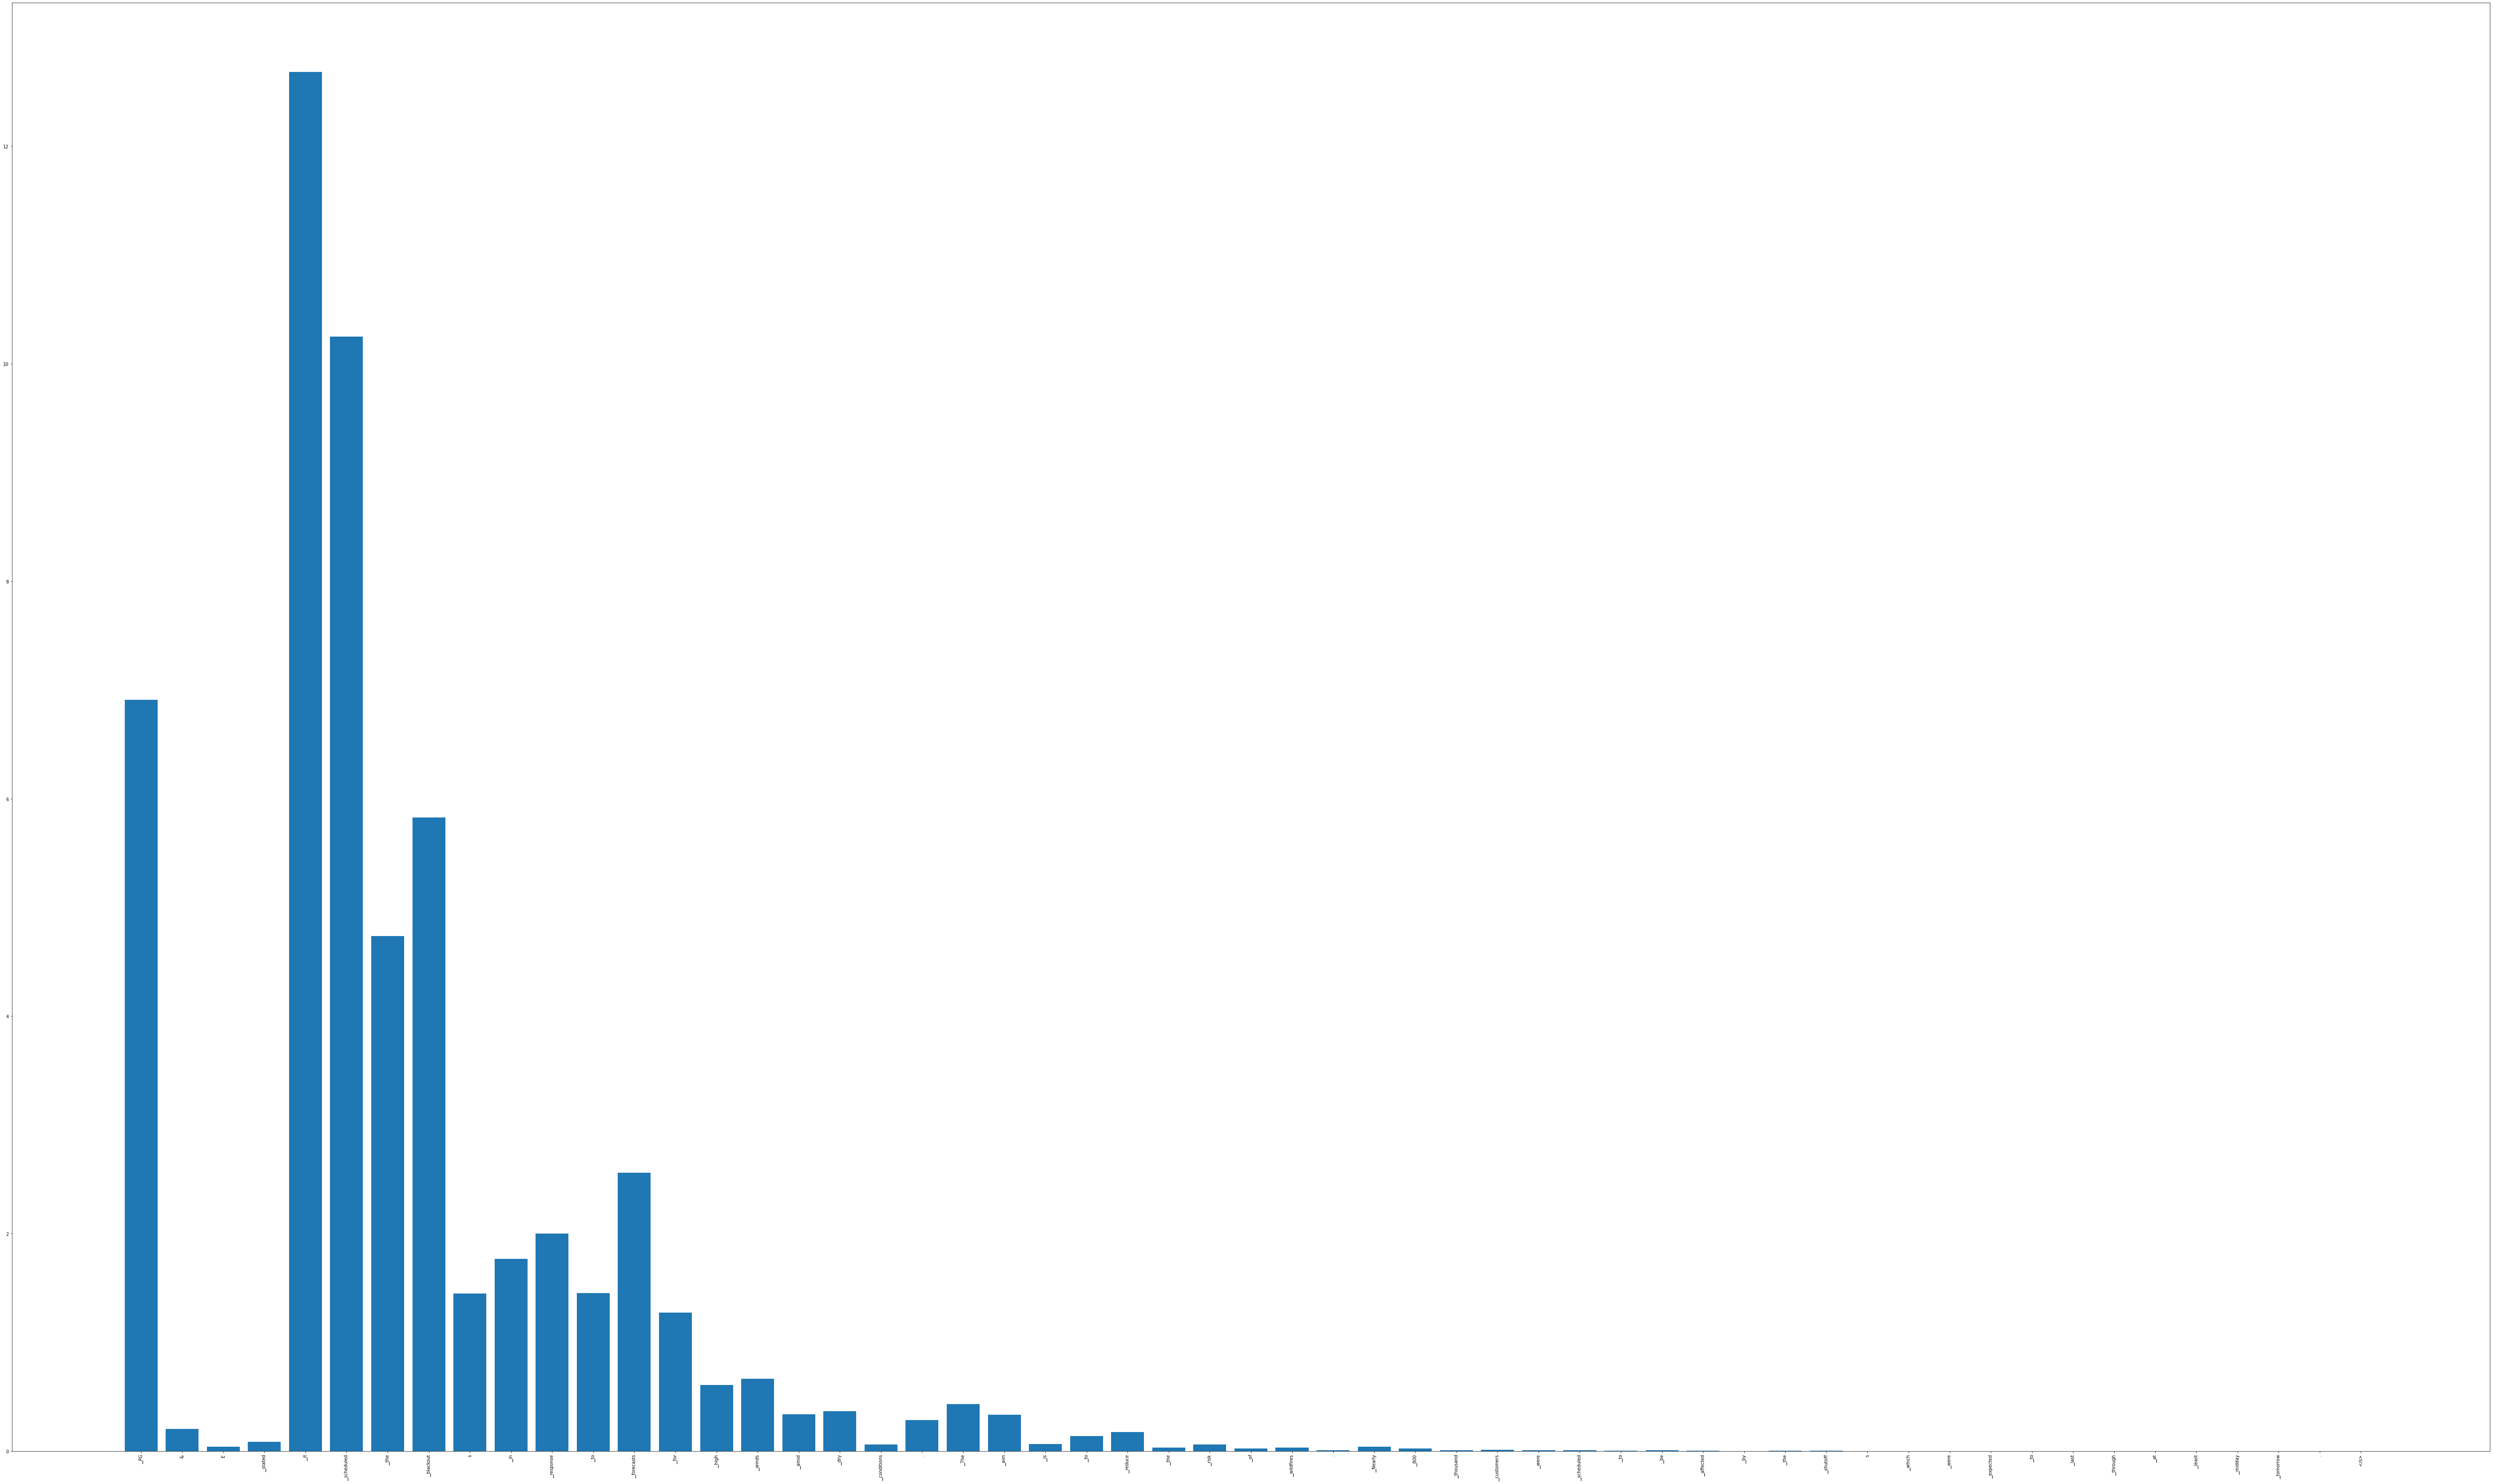

<Figure size 7200x4320 with 0 Axes>

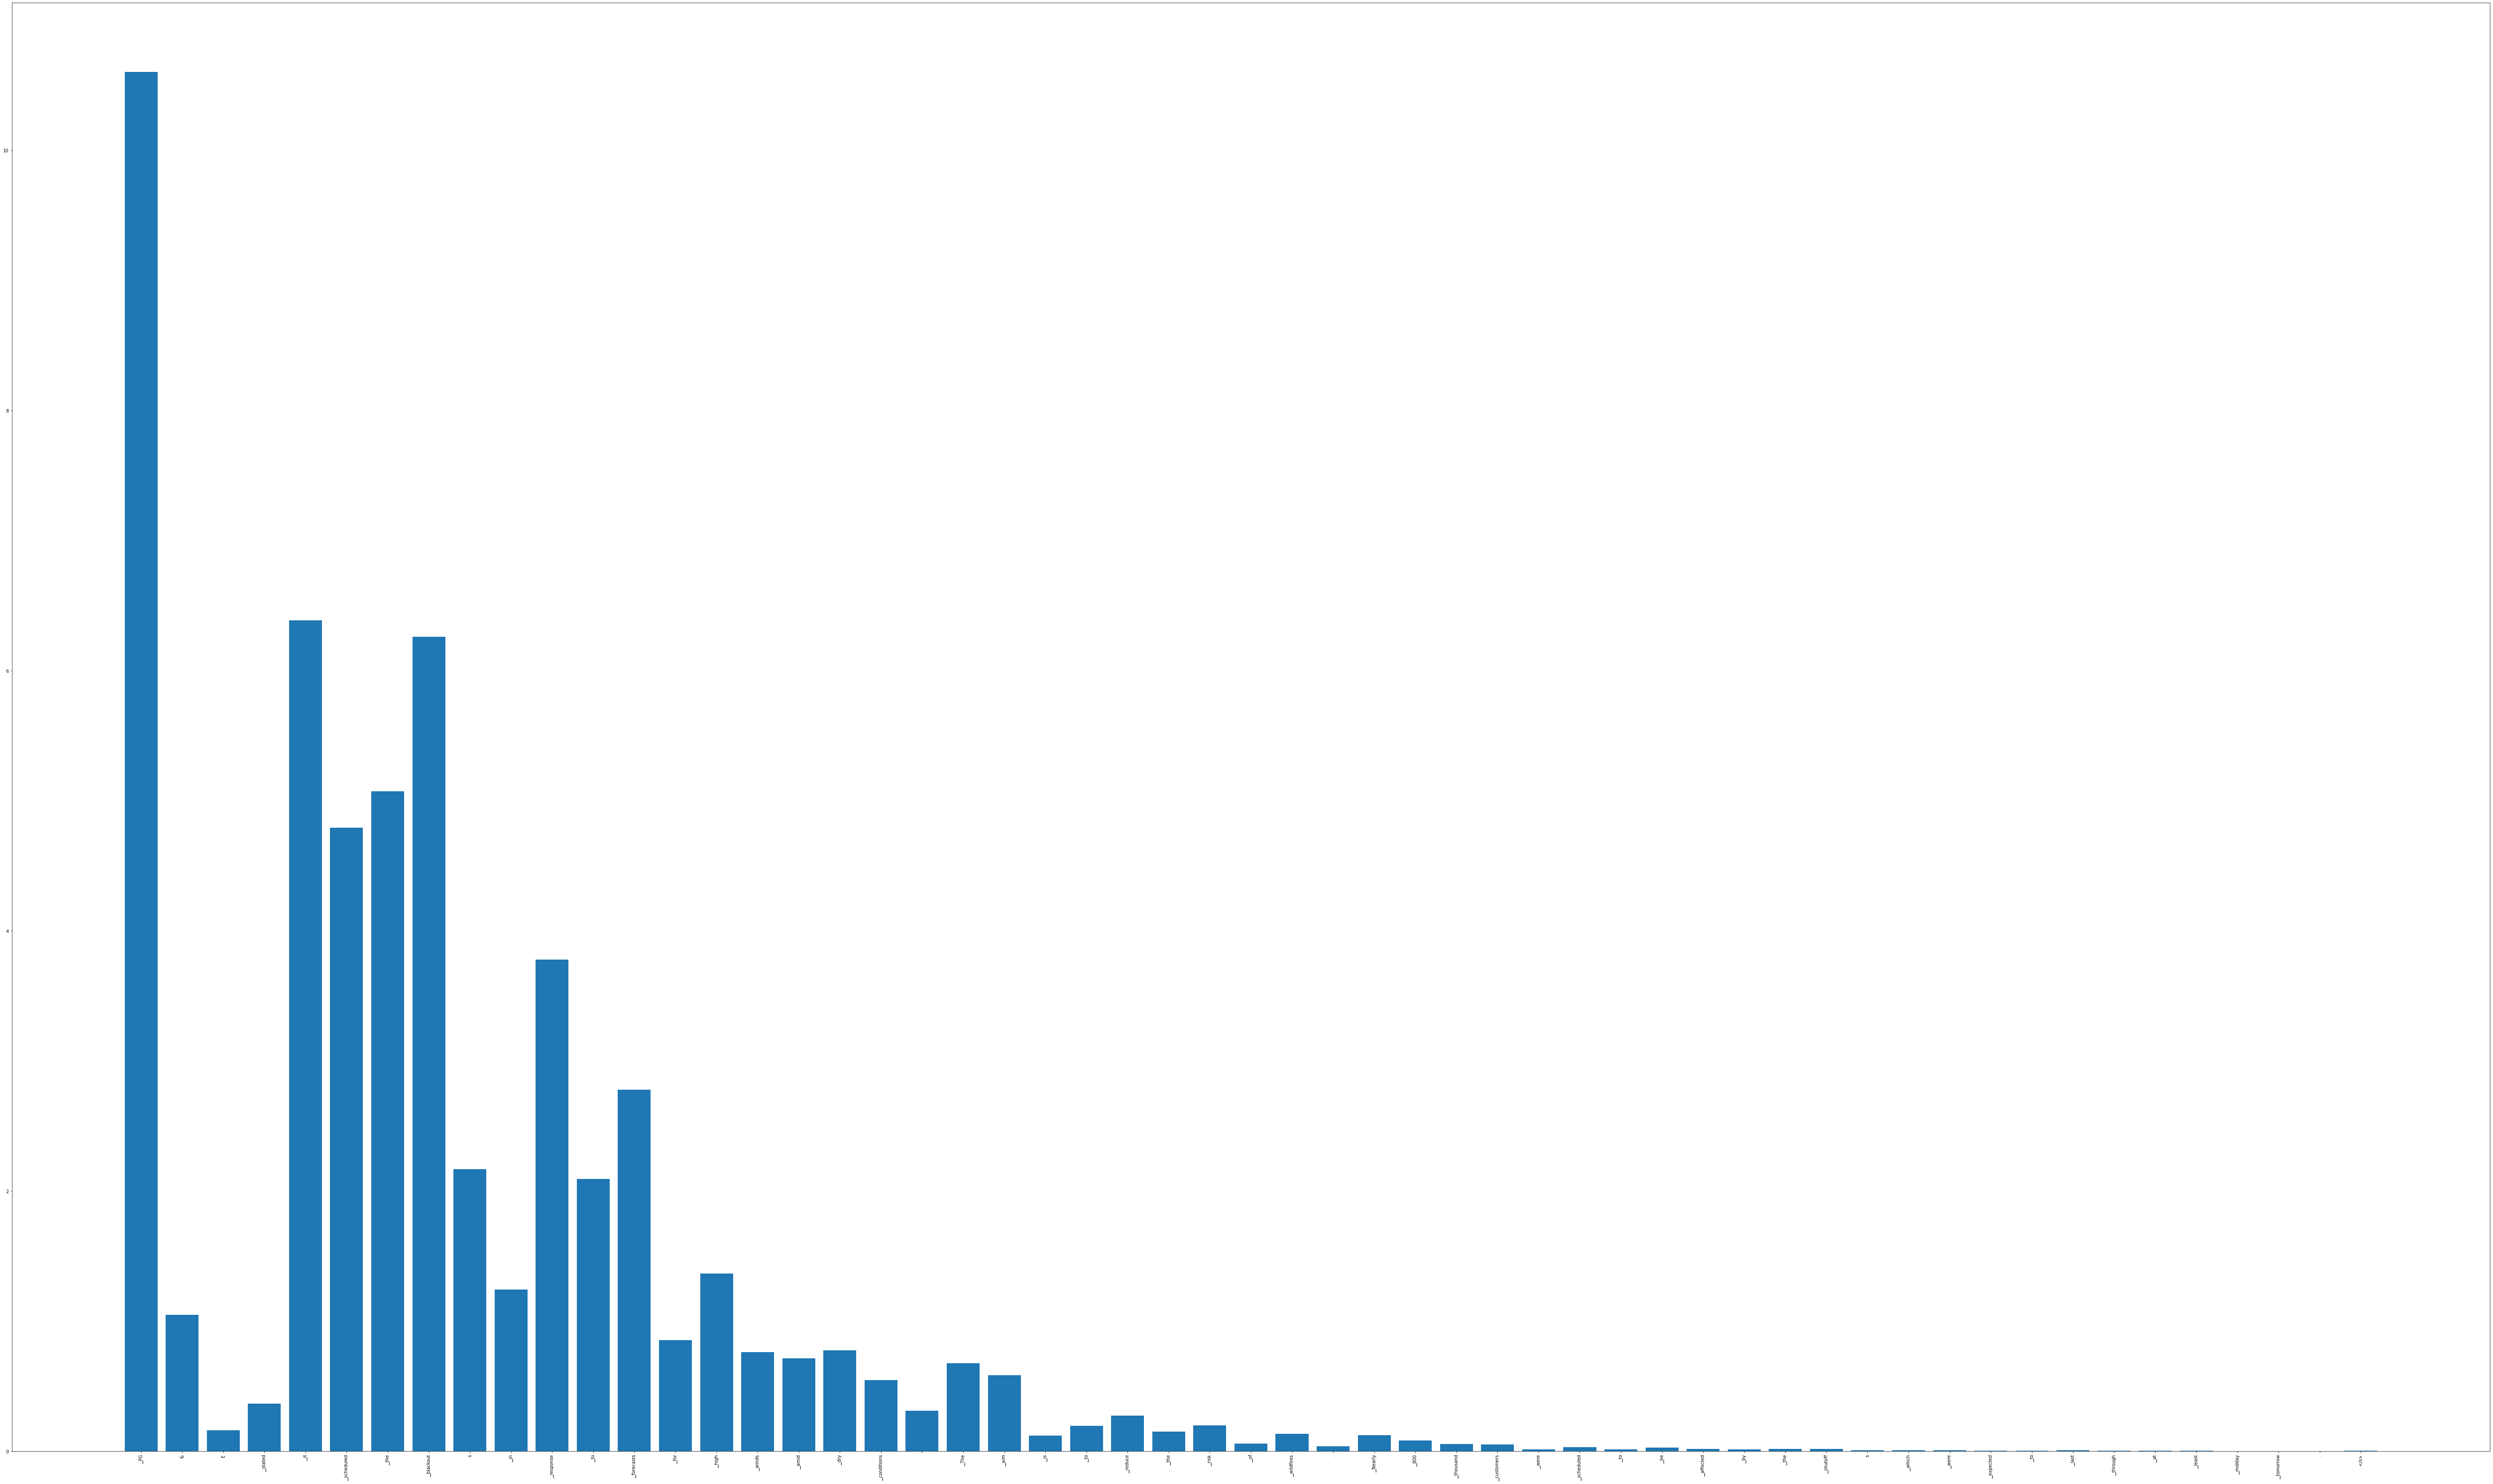

<Figure size 7200x4320 with 0 Axes>

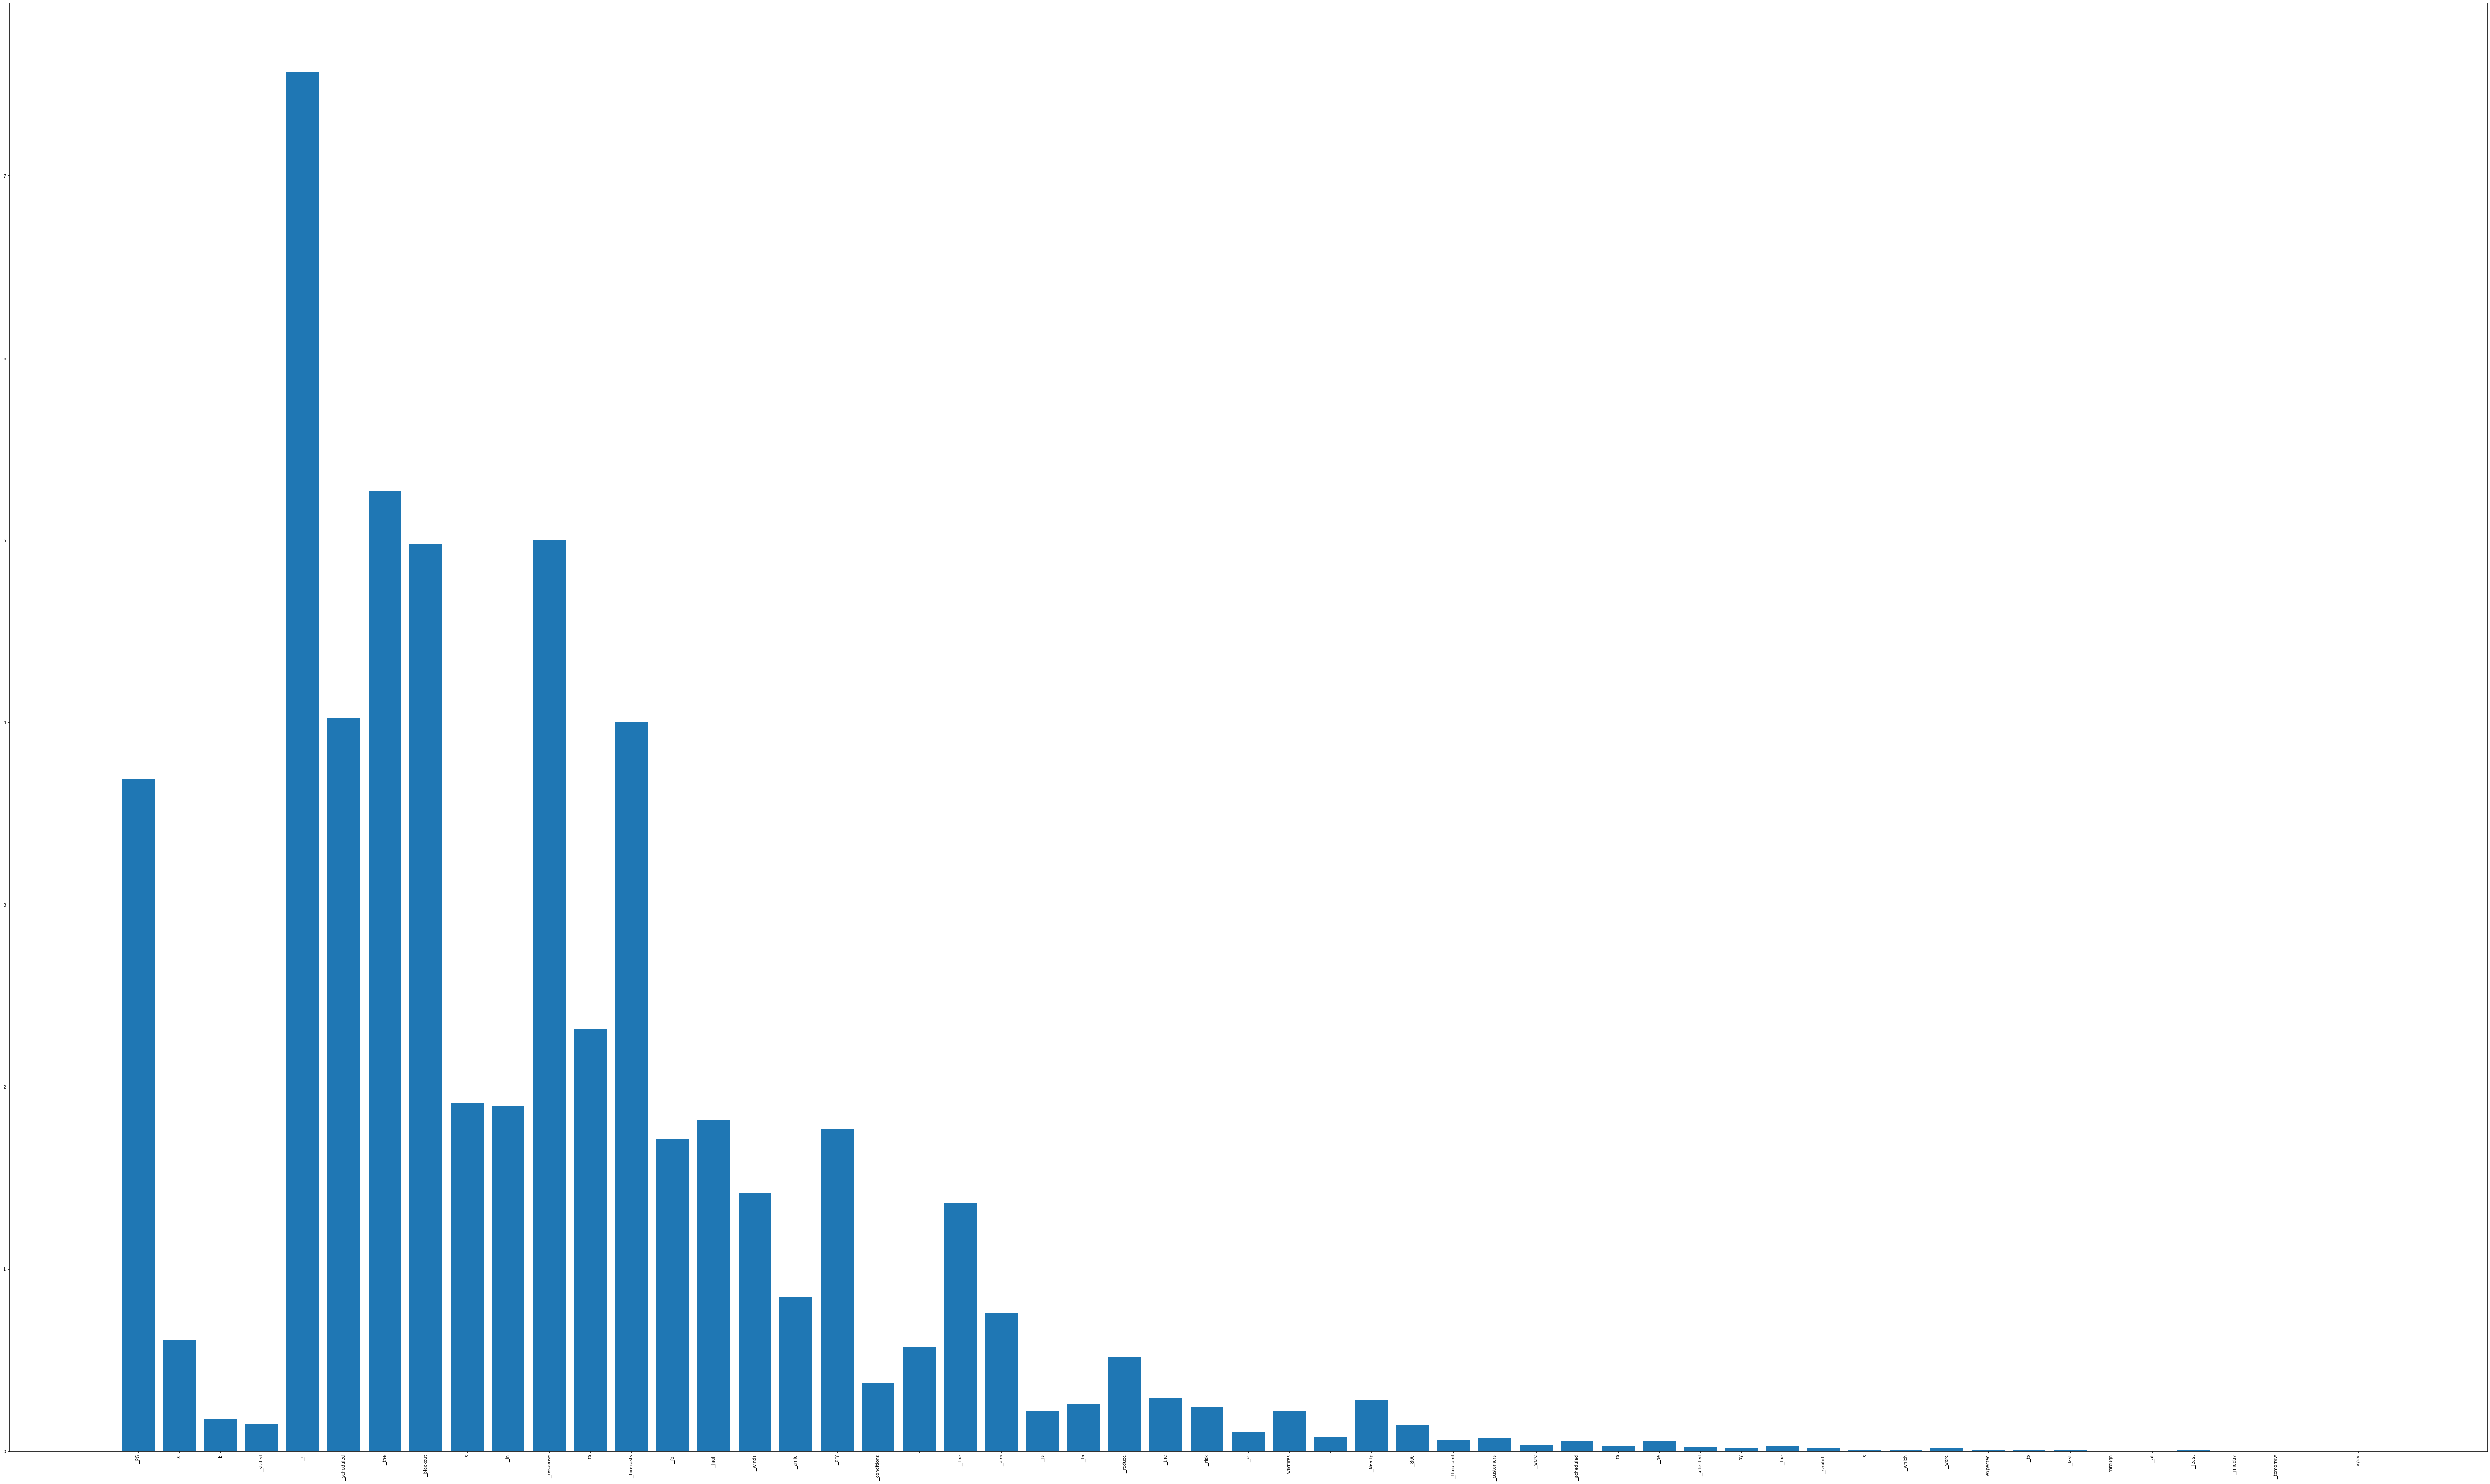

<Figure size 7200x4320 with 0 Axes>

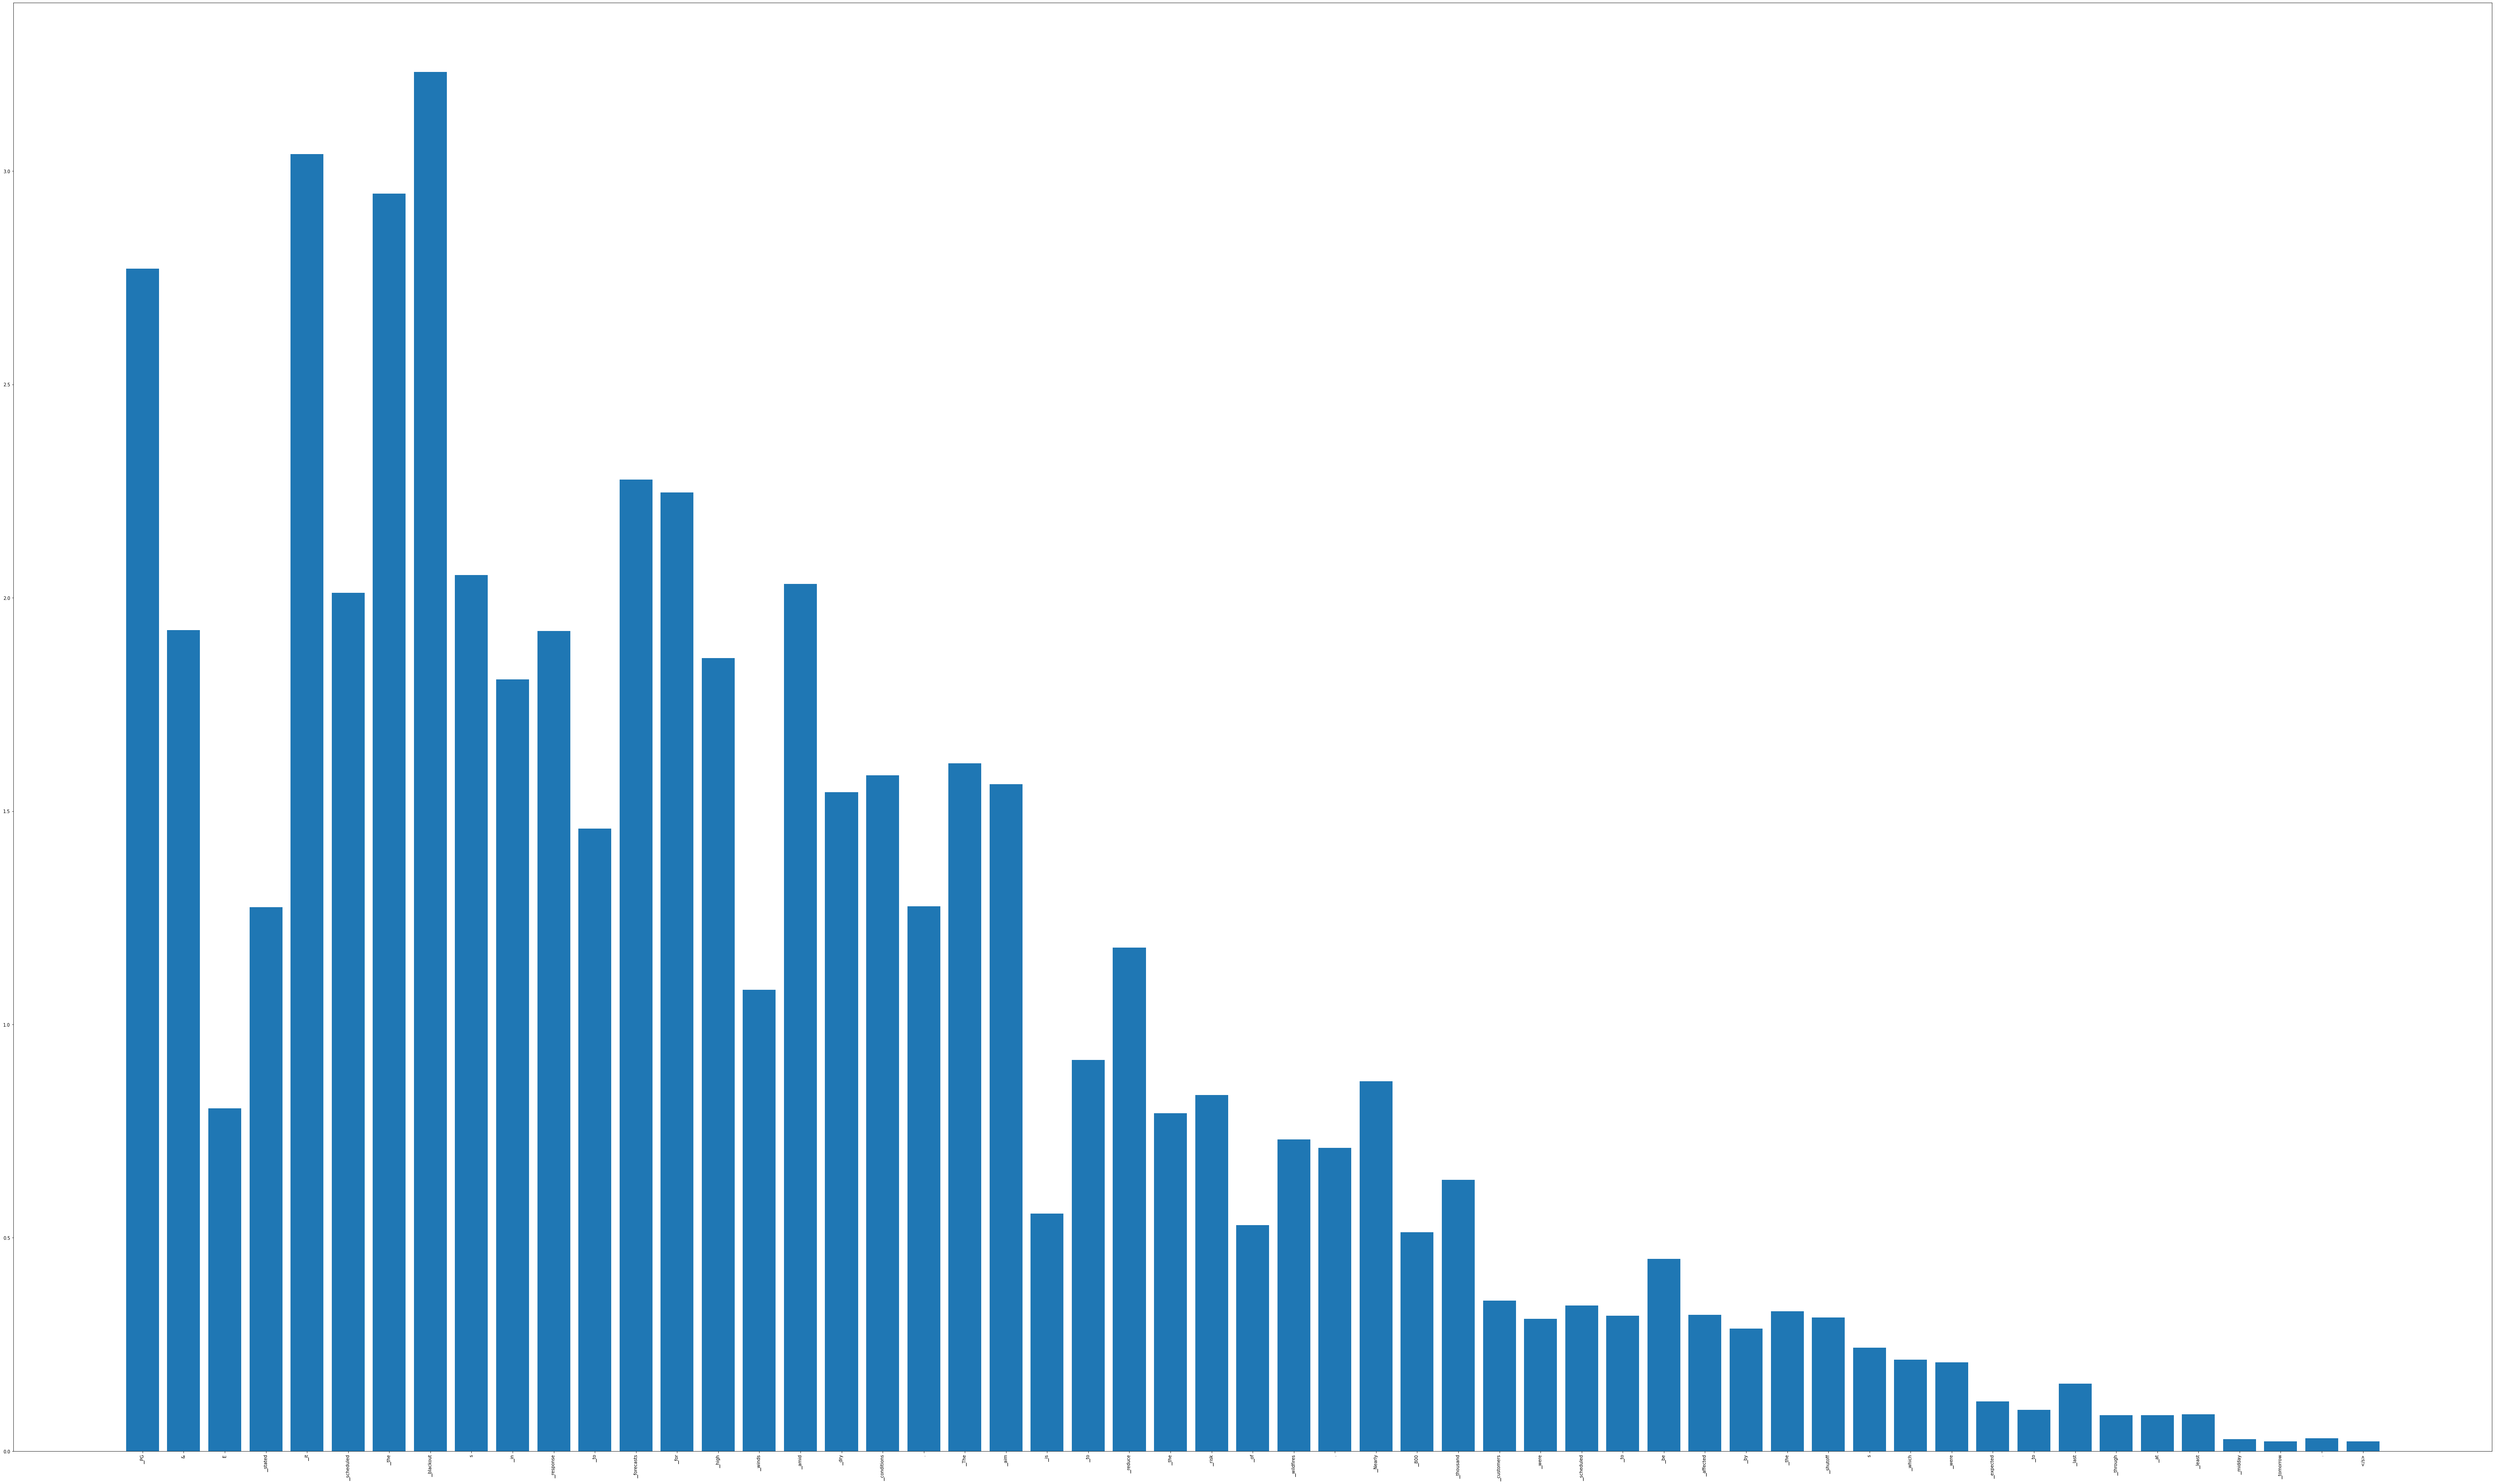

<Figure size 7200x4320 with 0 Axes>

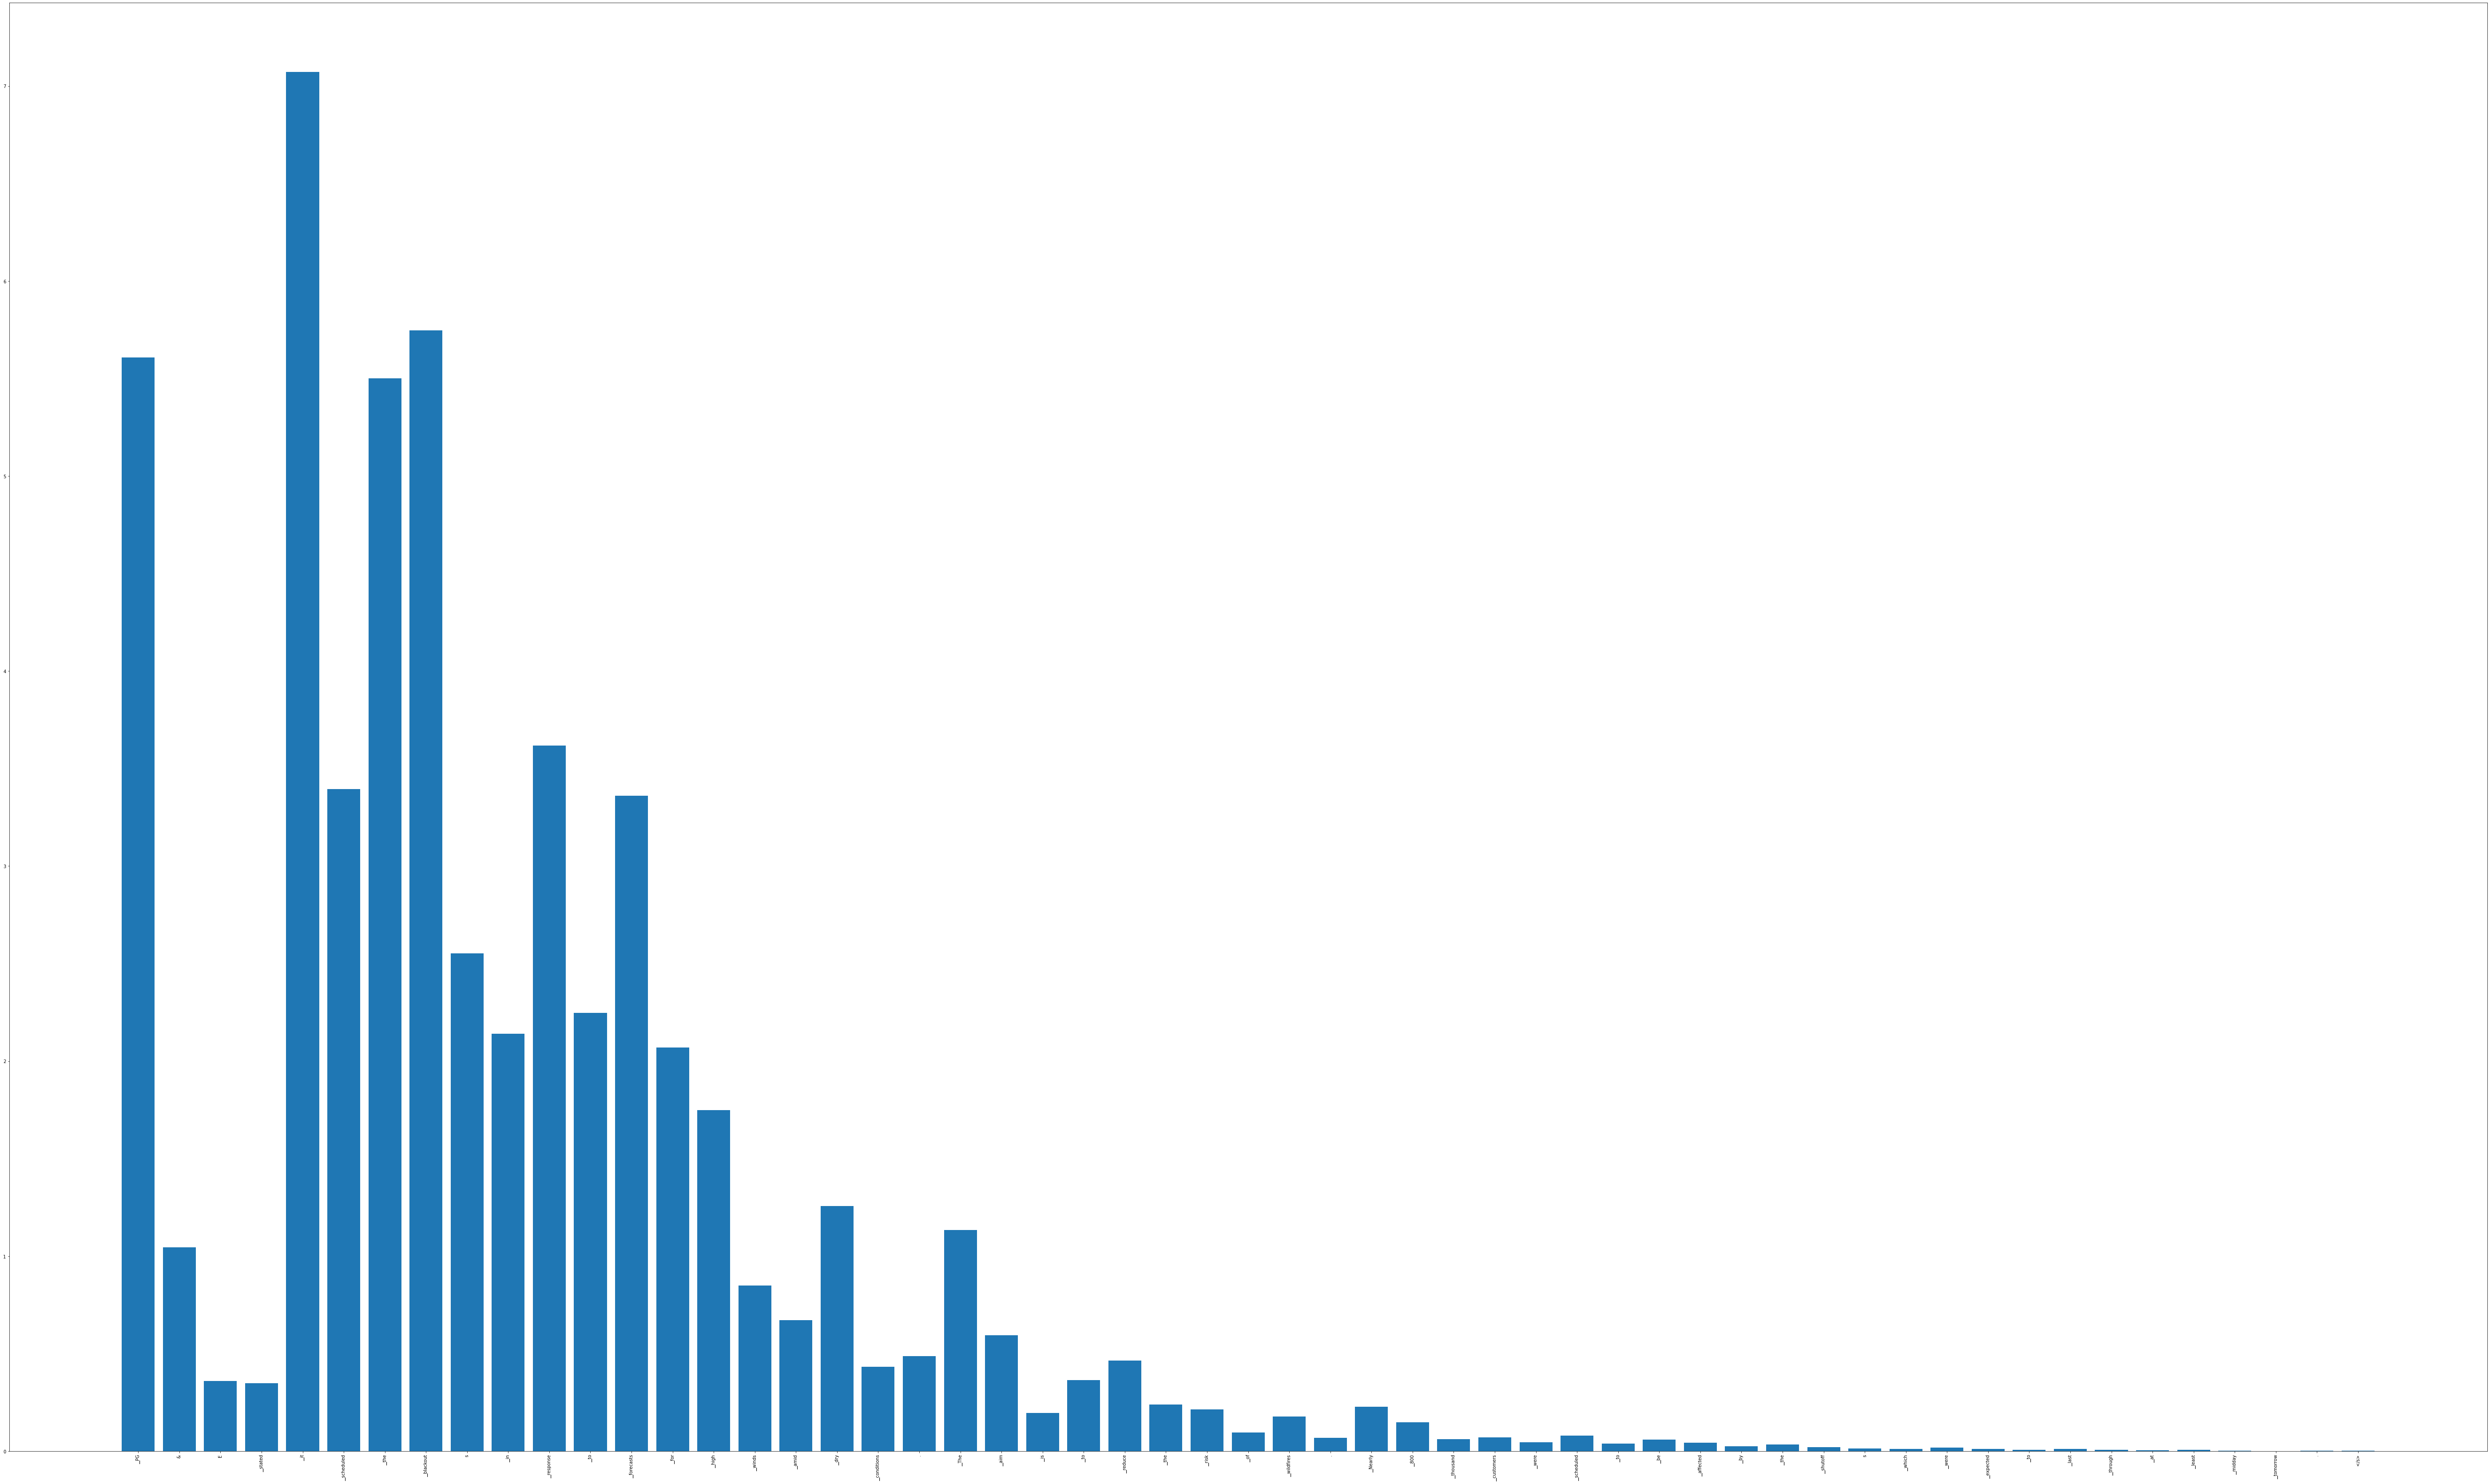

<Figure size 7200x4320 with 0 Axes>

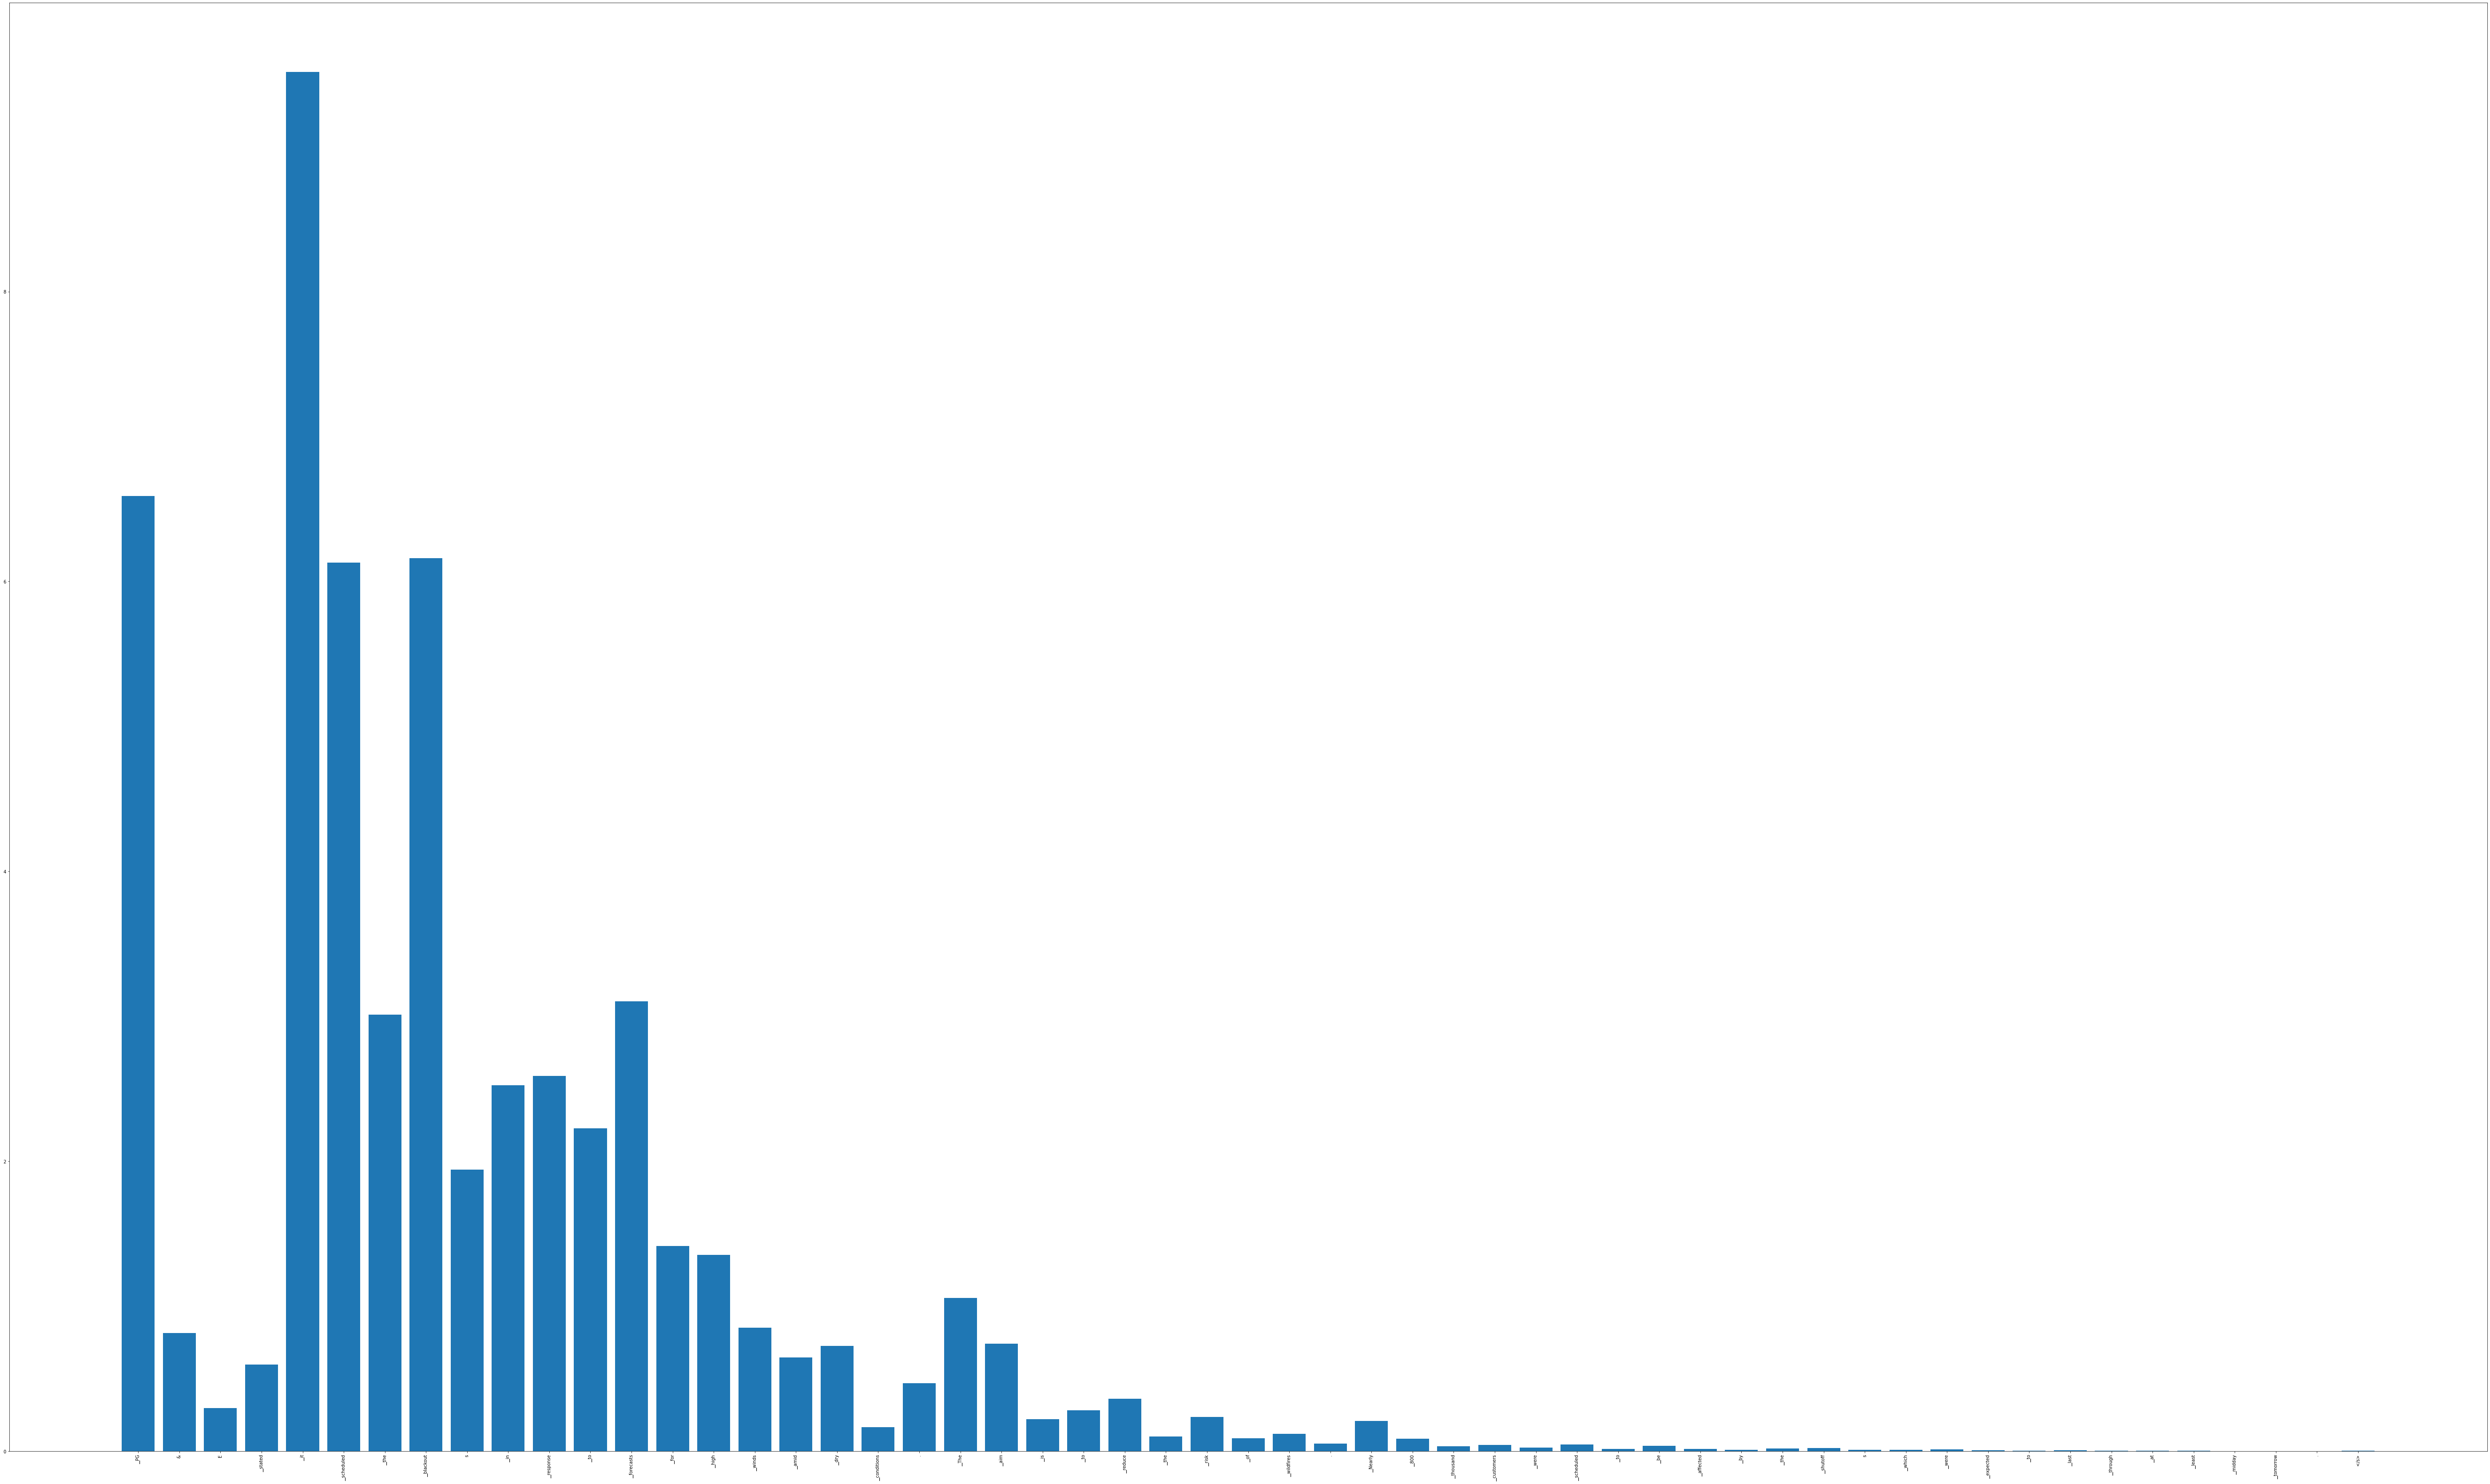

<Figure size 7200x4320 with 0 Axes>

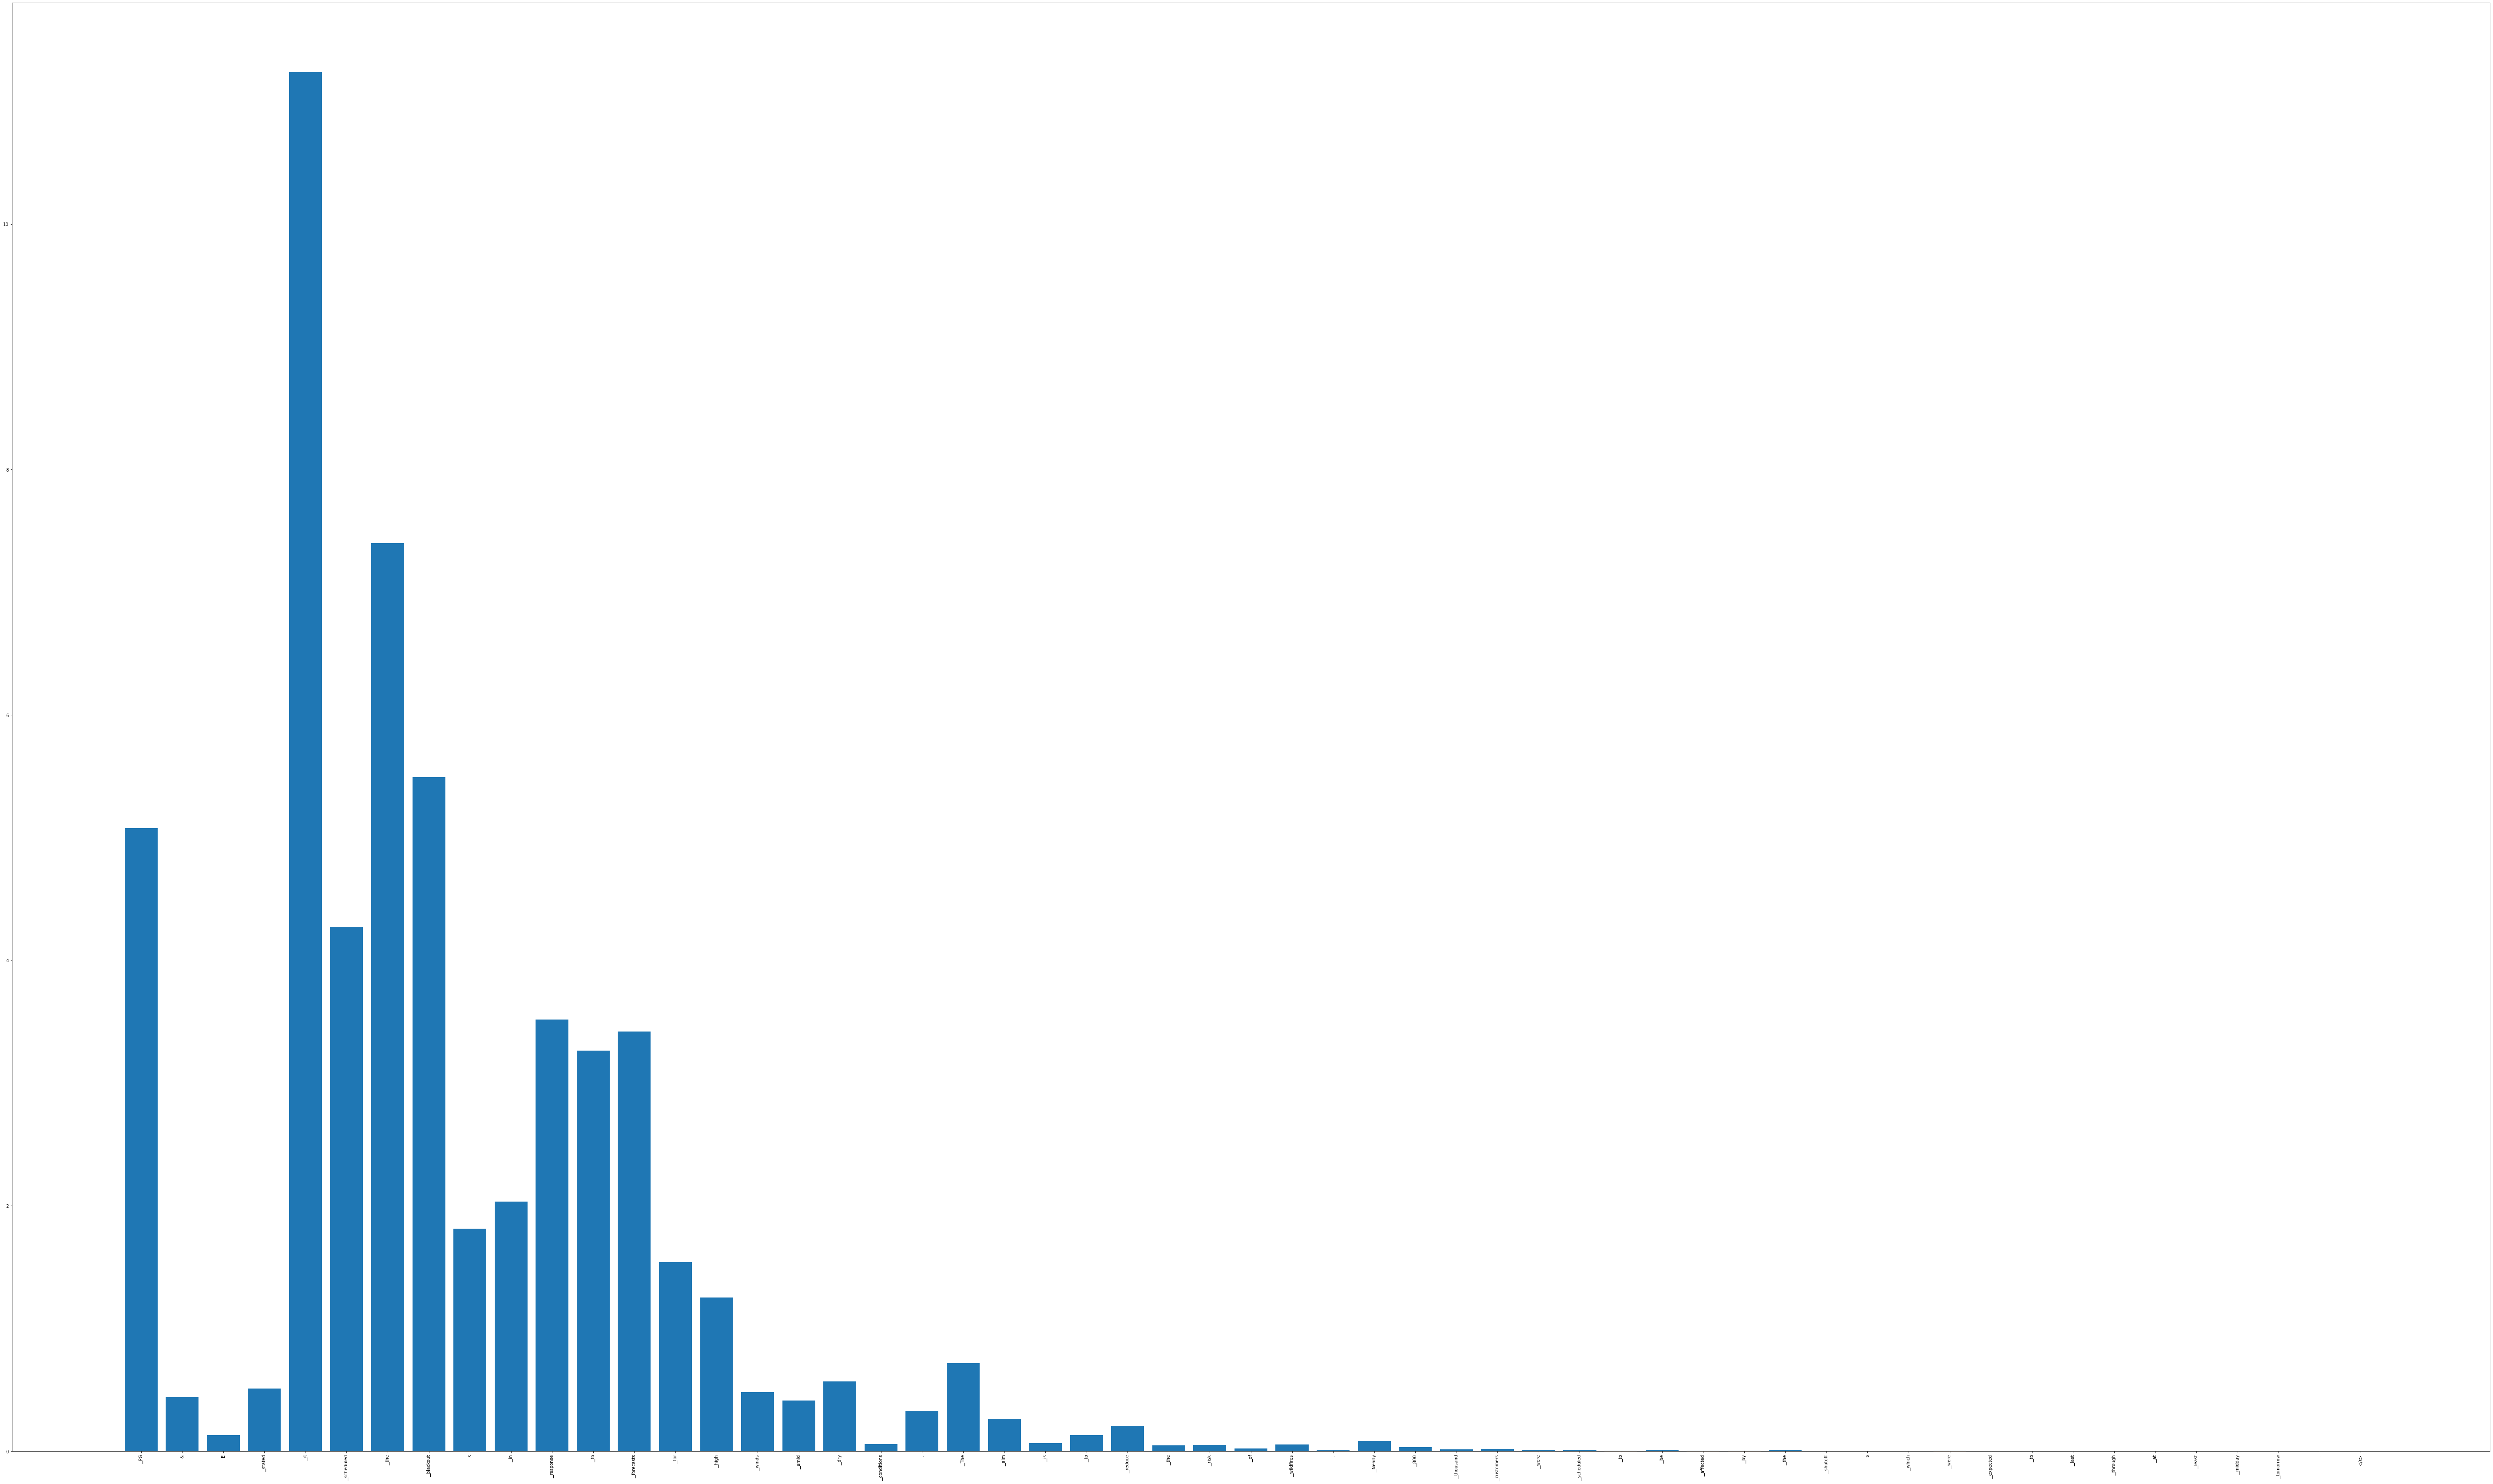

In [15]:
#plt.clf()
#plt.figure()
plots = []
for i, head in enumerate(head_sums[-1]):
    plt.clf()
    plt.figure()
    #plots.append(plt.bar(range(len(head)), head))
    plt.bar(range(len(head)), head)
    plt.xticks(range(len(head)), tokens, rotation=90)
    plt.rcParams["figure.figsize"] = (100,60)
    #plt.legend([bar[0] for bar in plots], [i+1 for i in range(17)])
    #plt.savefig(f'decoder16head{i+1}.jpg')
    plt.show()

<Figure size 7200x4320 with 0 Axes>

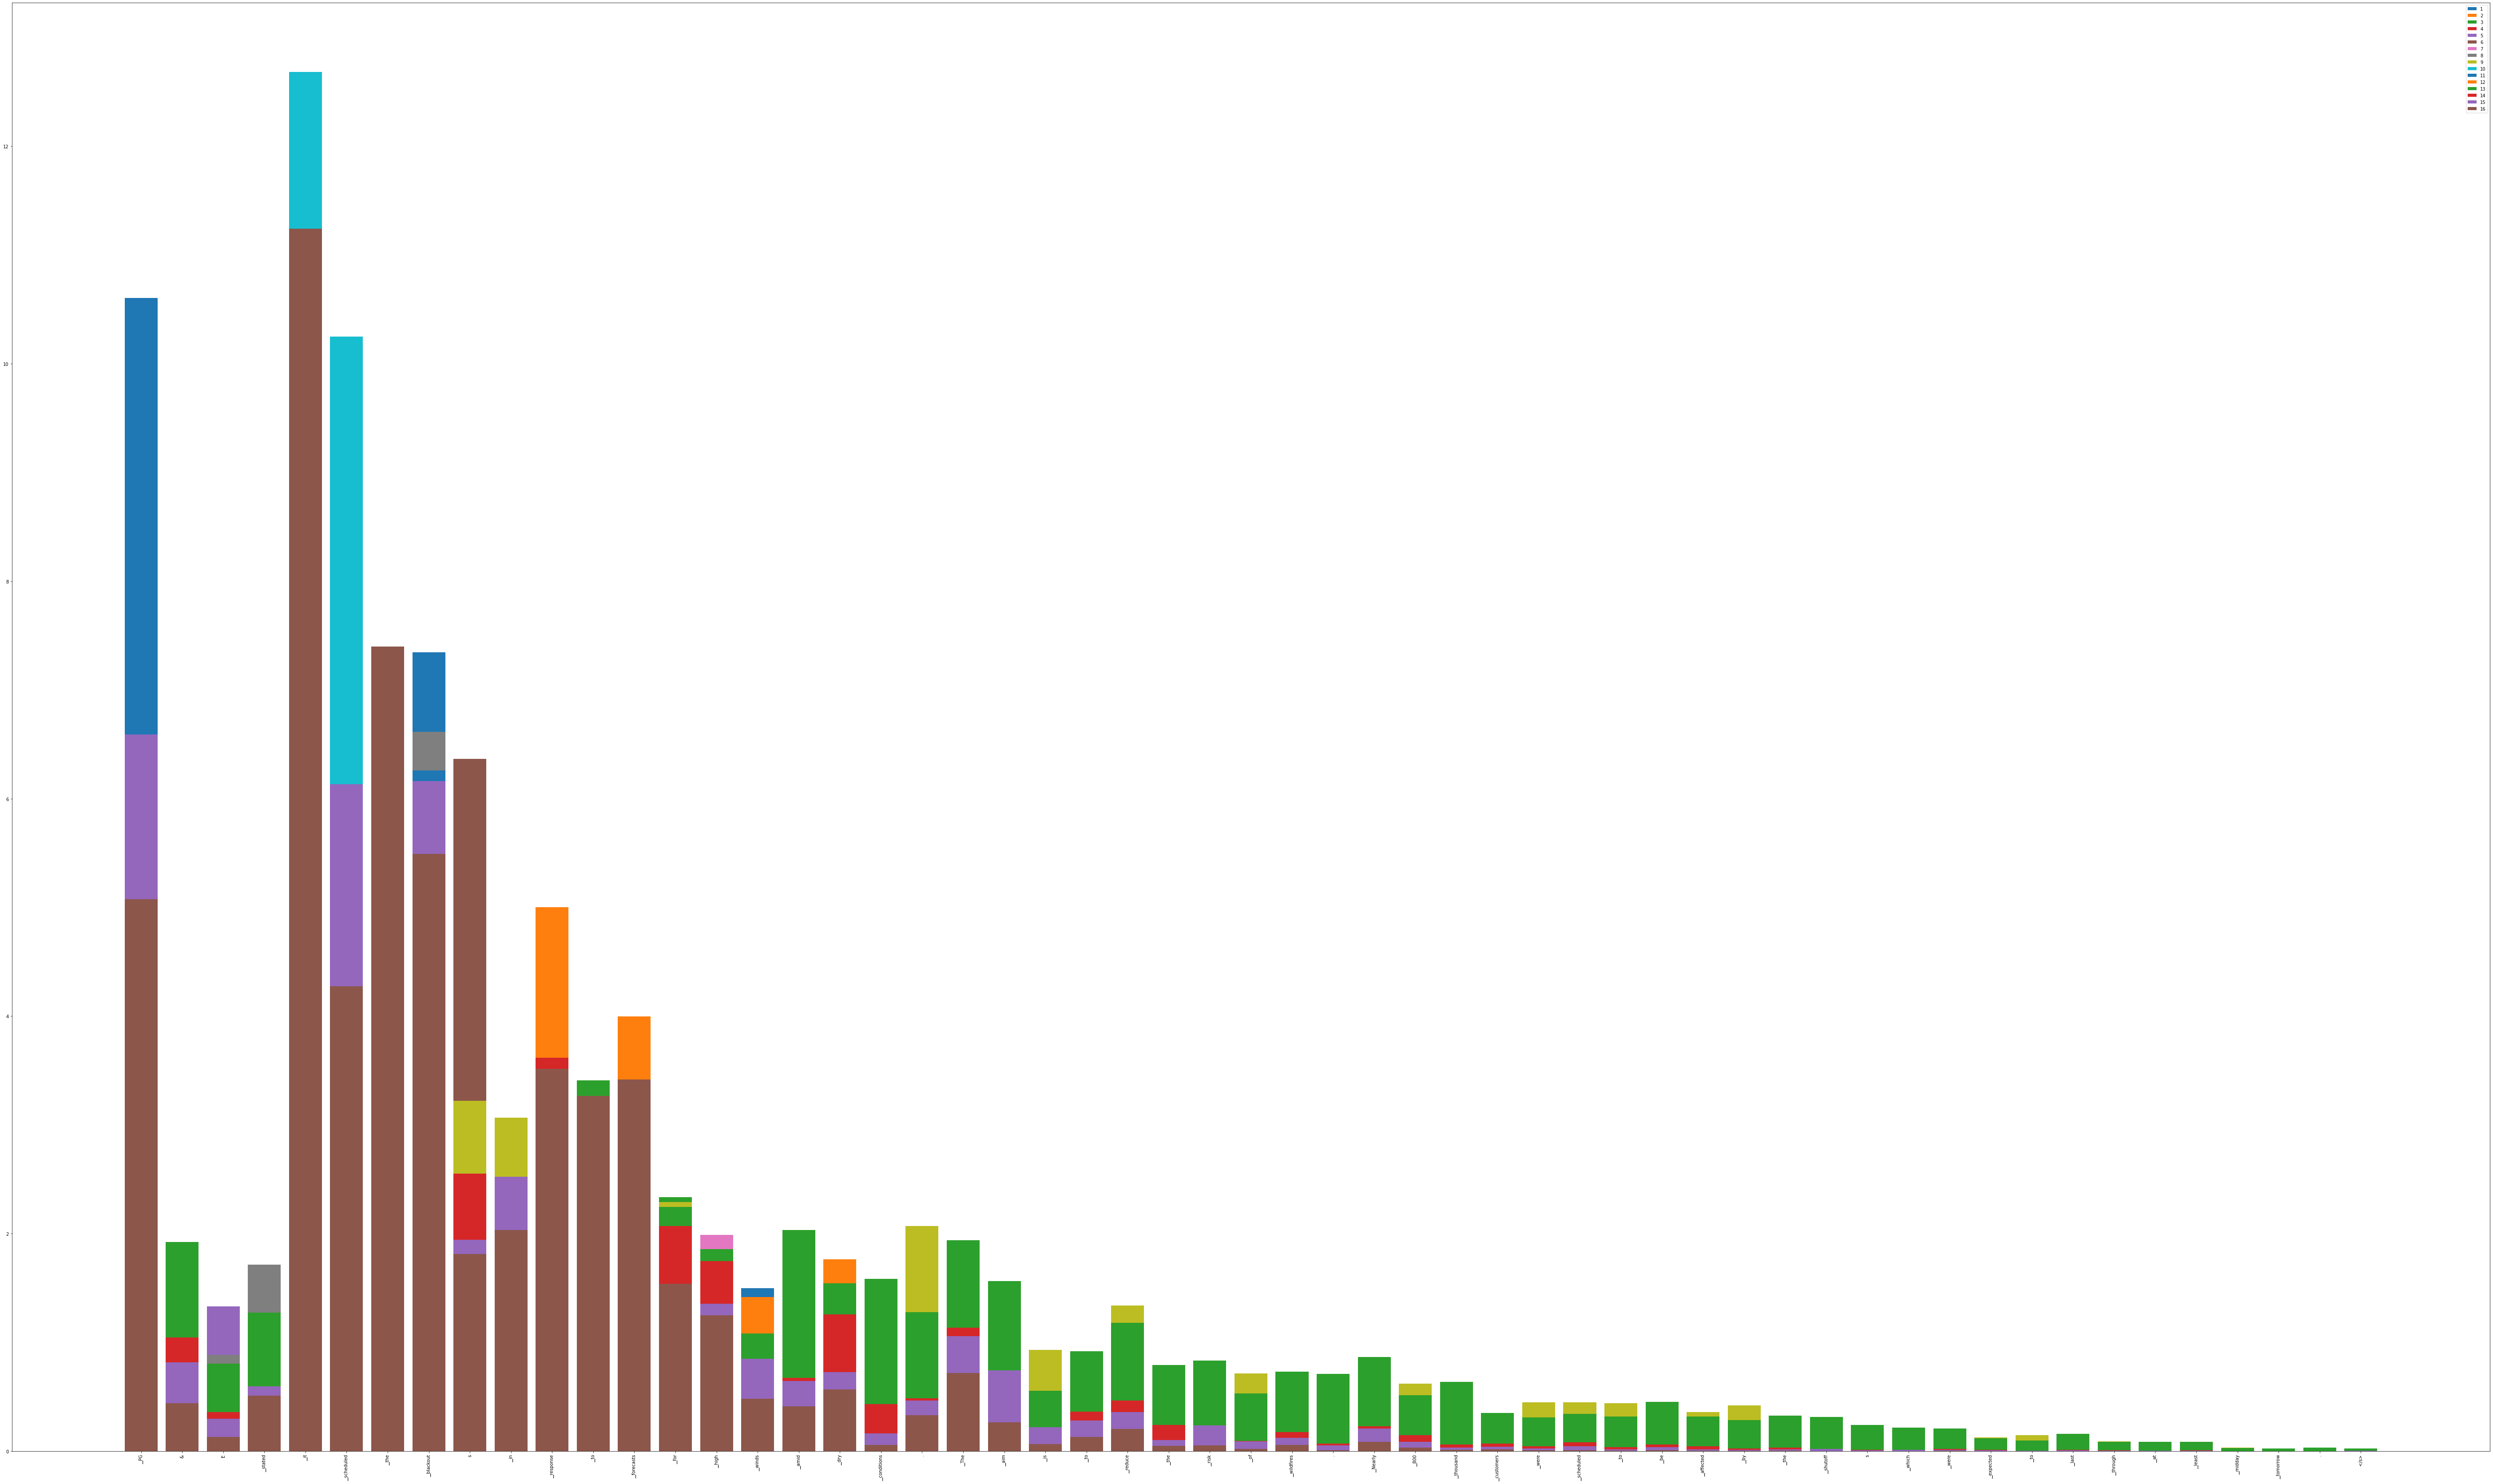

In [518]:
plt.clf()
plt.figure()
plots = []
for i, head in enumerate(head_sums[-1]):
    plots.append(plt.bar(range(len(head)), head))
plt.xticks(range(len(head)), tokens, rotation=90)
plt.rcParams["figure.figsize"] = (100,60)
plt.legend([bar[0] for bar in plots], [i+1 for i in range(17)])
plt.savefig('decoder16headsums1.jpg')
plt.show()

<Figure size 7200x4320 with 0 Axes>

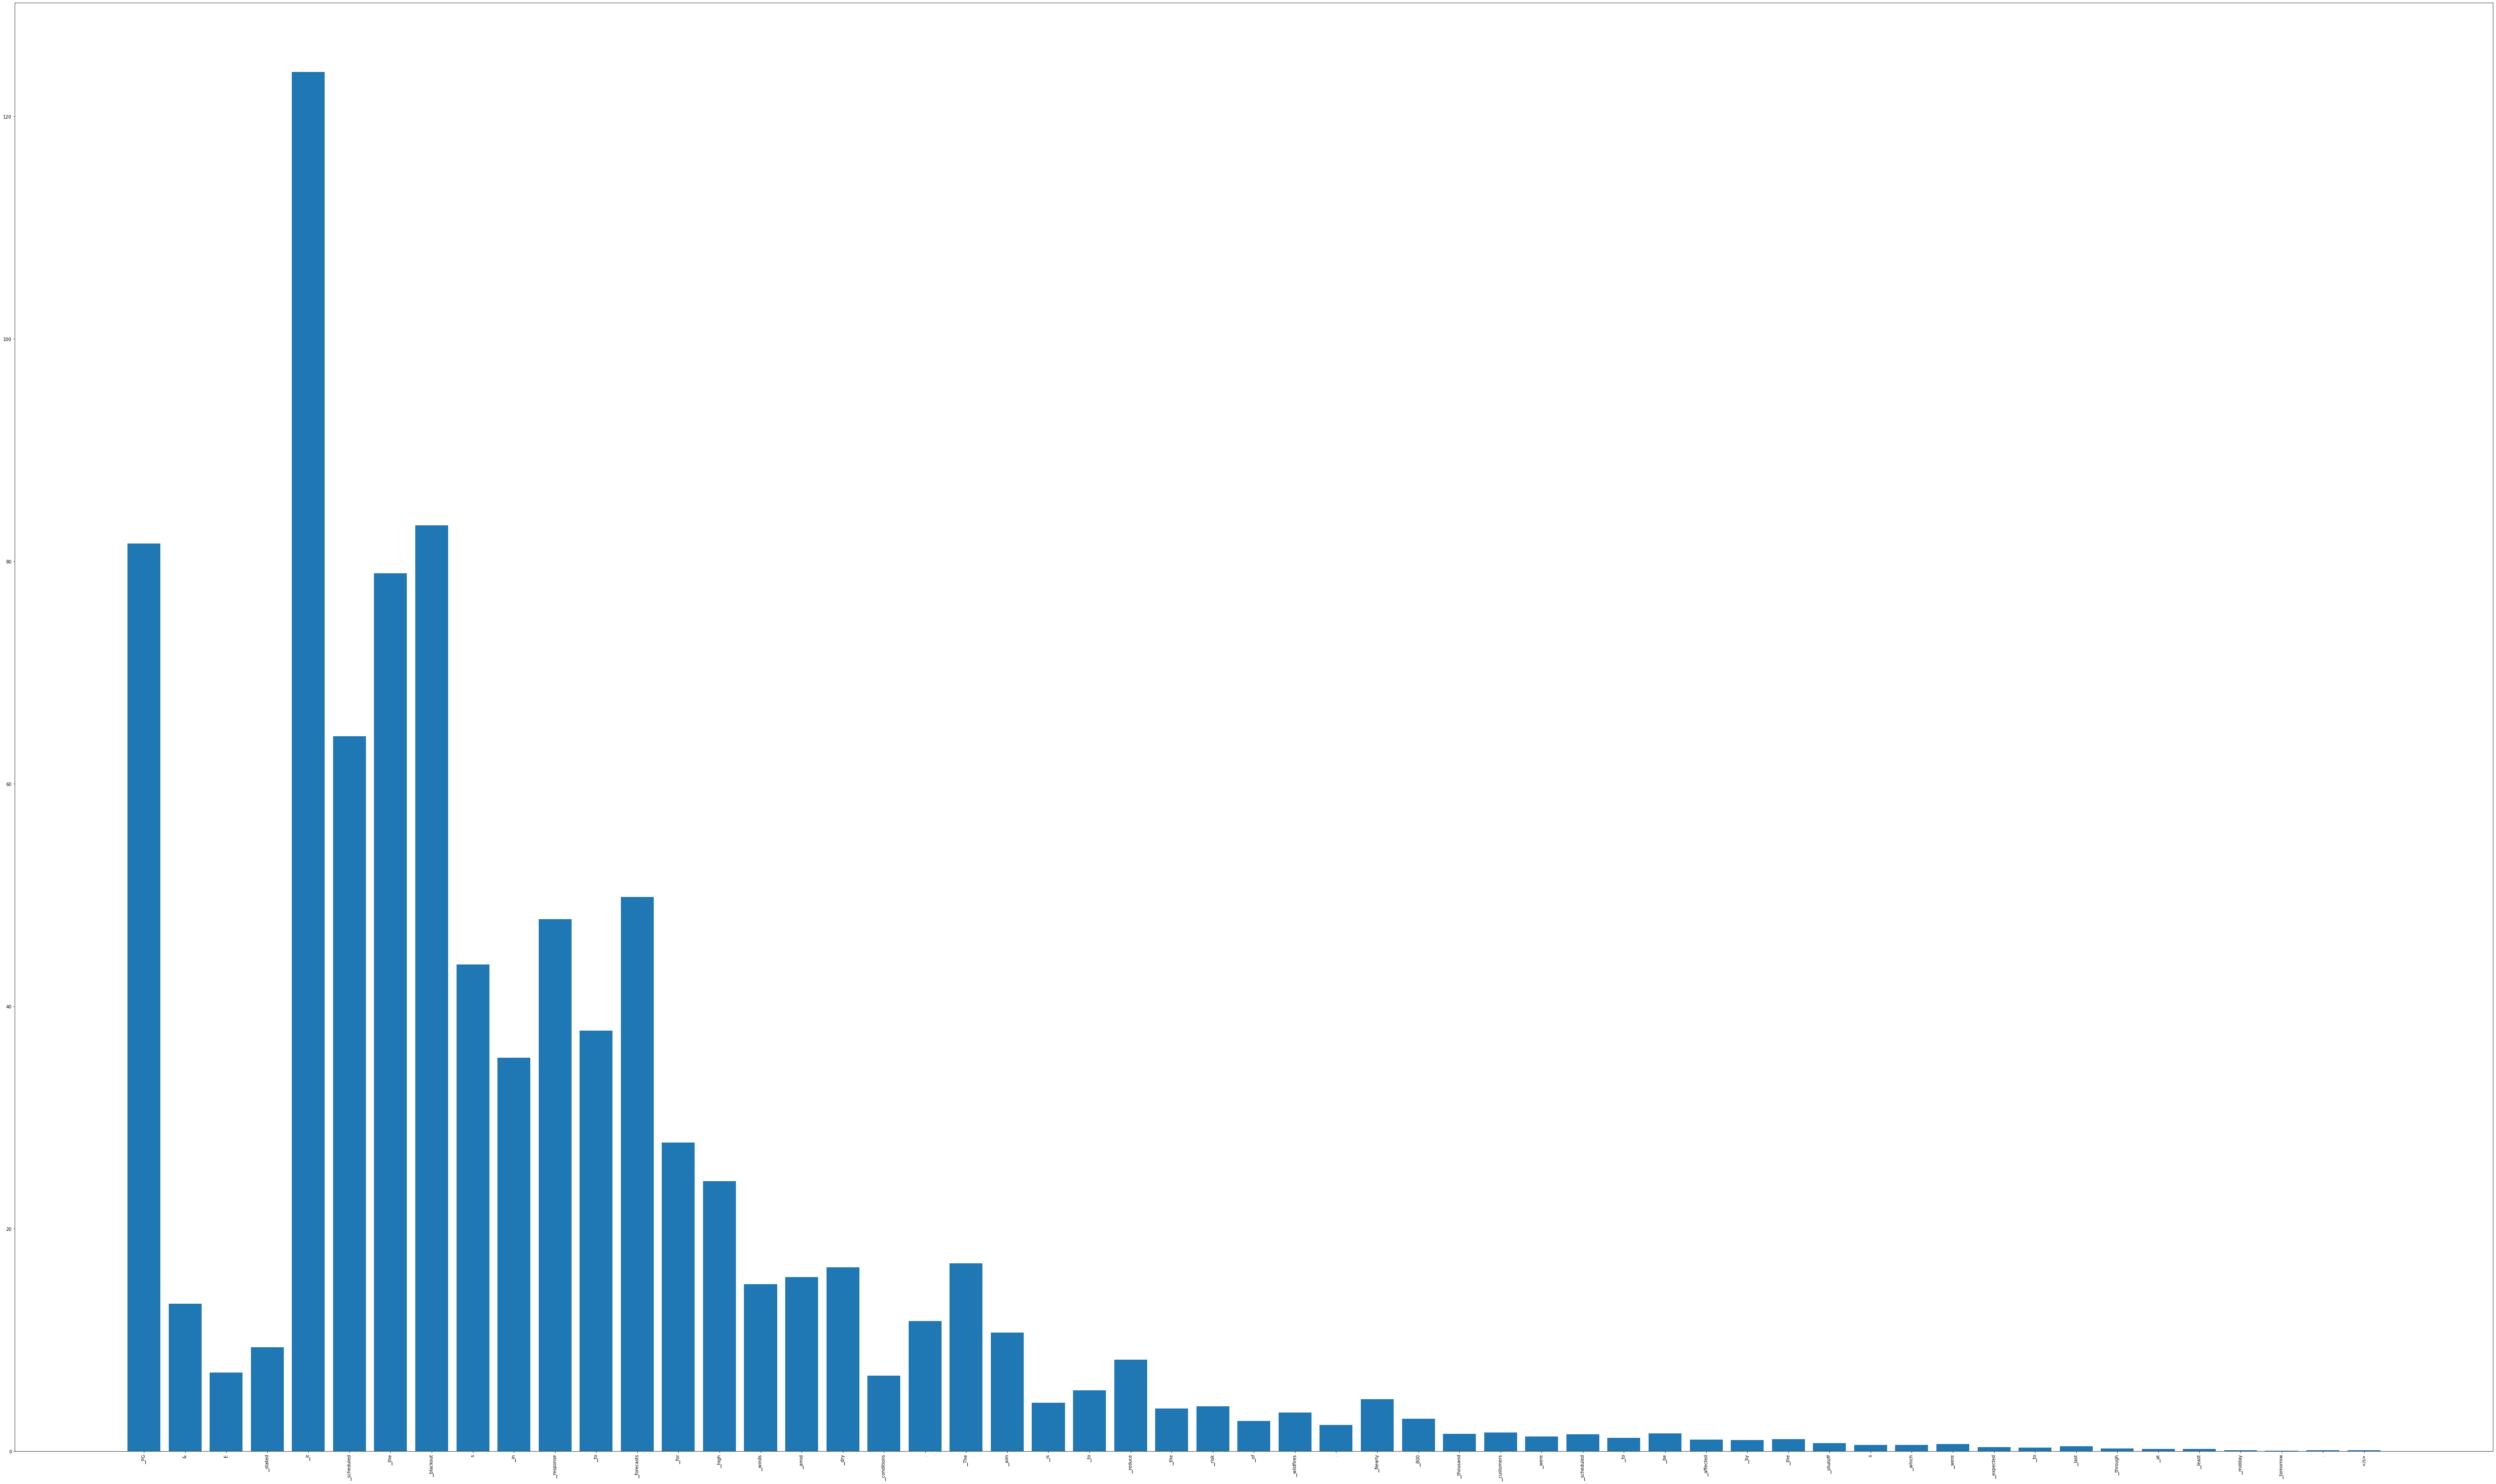

In [517]:
plt.clf()
plt.figure()
#plots = []
#for i, head in enumerate(head_sums[-1]):
#    plots.append(plt.bar(range(len(head)), head))
plt.bar(range(len(head)), final_layer_sum)
plt.xticks(range(len(head)), tokens, rotation=90)
plt.rcParams["figure.figsize"] = (100,60)
#plt.legend([bar[0] for bar in plots], [i+1 for i in range(17)])
#plt.savefig('decoder16headsums1.jpg')
plt.show()

In [102]:
import pickle

In [ ]:
pickle.dump( translated, open( "outputs.p", "wb" ) )

In [482]:
plt.clf()

<Figure size 7200x7200 with 0 Axes>

In [488]:
plt.savefig('decoder16headsums.jpg')

<Figure size 7200x4320 with 0 Axes>

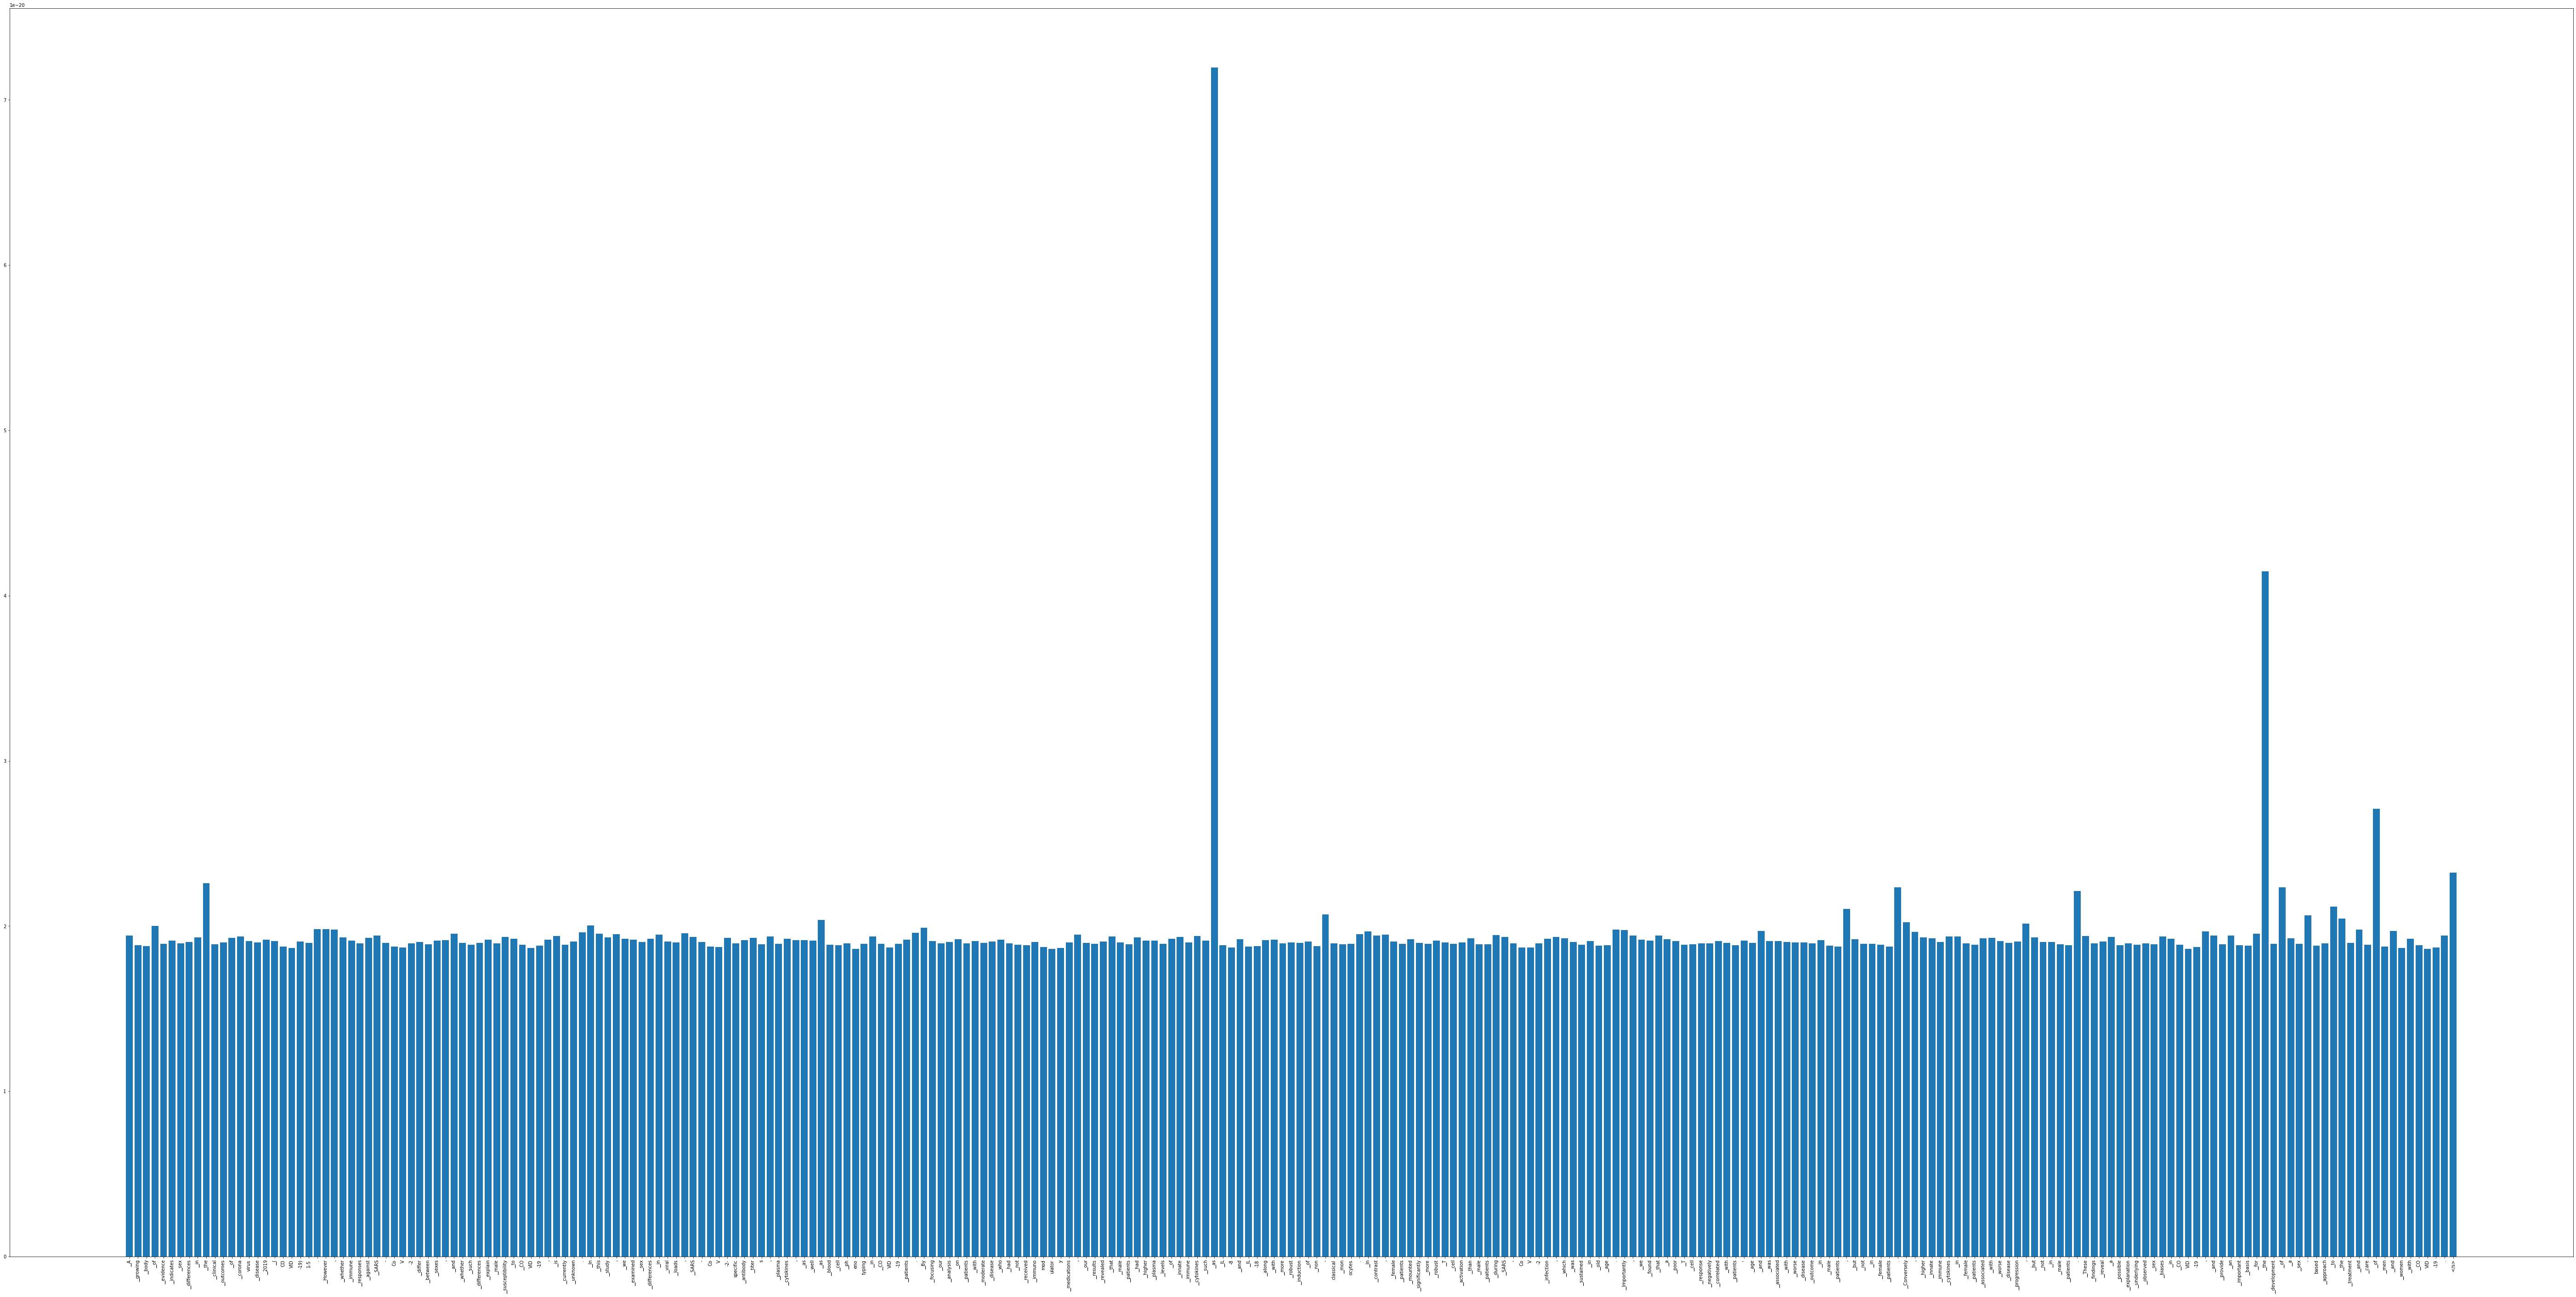

<Figure size 7200x3600 with 0 Axes>

In [453]:
plt.bar(range(len(total_prod)), total_prod)
plt.xticks(range(len(total_prod)), tokens, rotation=90)
plt.rcParams["figure.figsize"] = (100,50)
#plt.legend(, [i+1 for i in range(17)])
plt.show()
plt.clf()

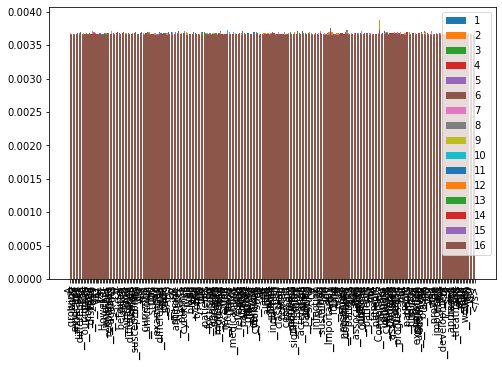

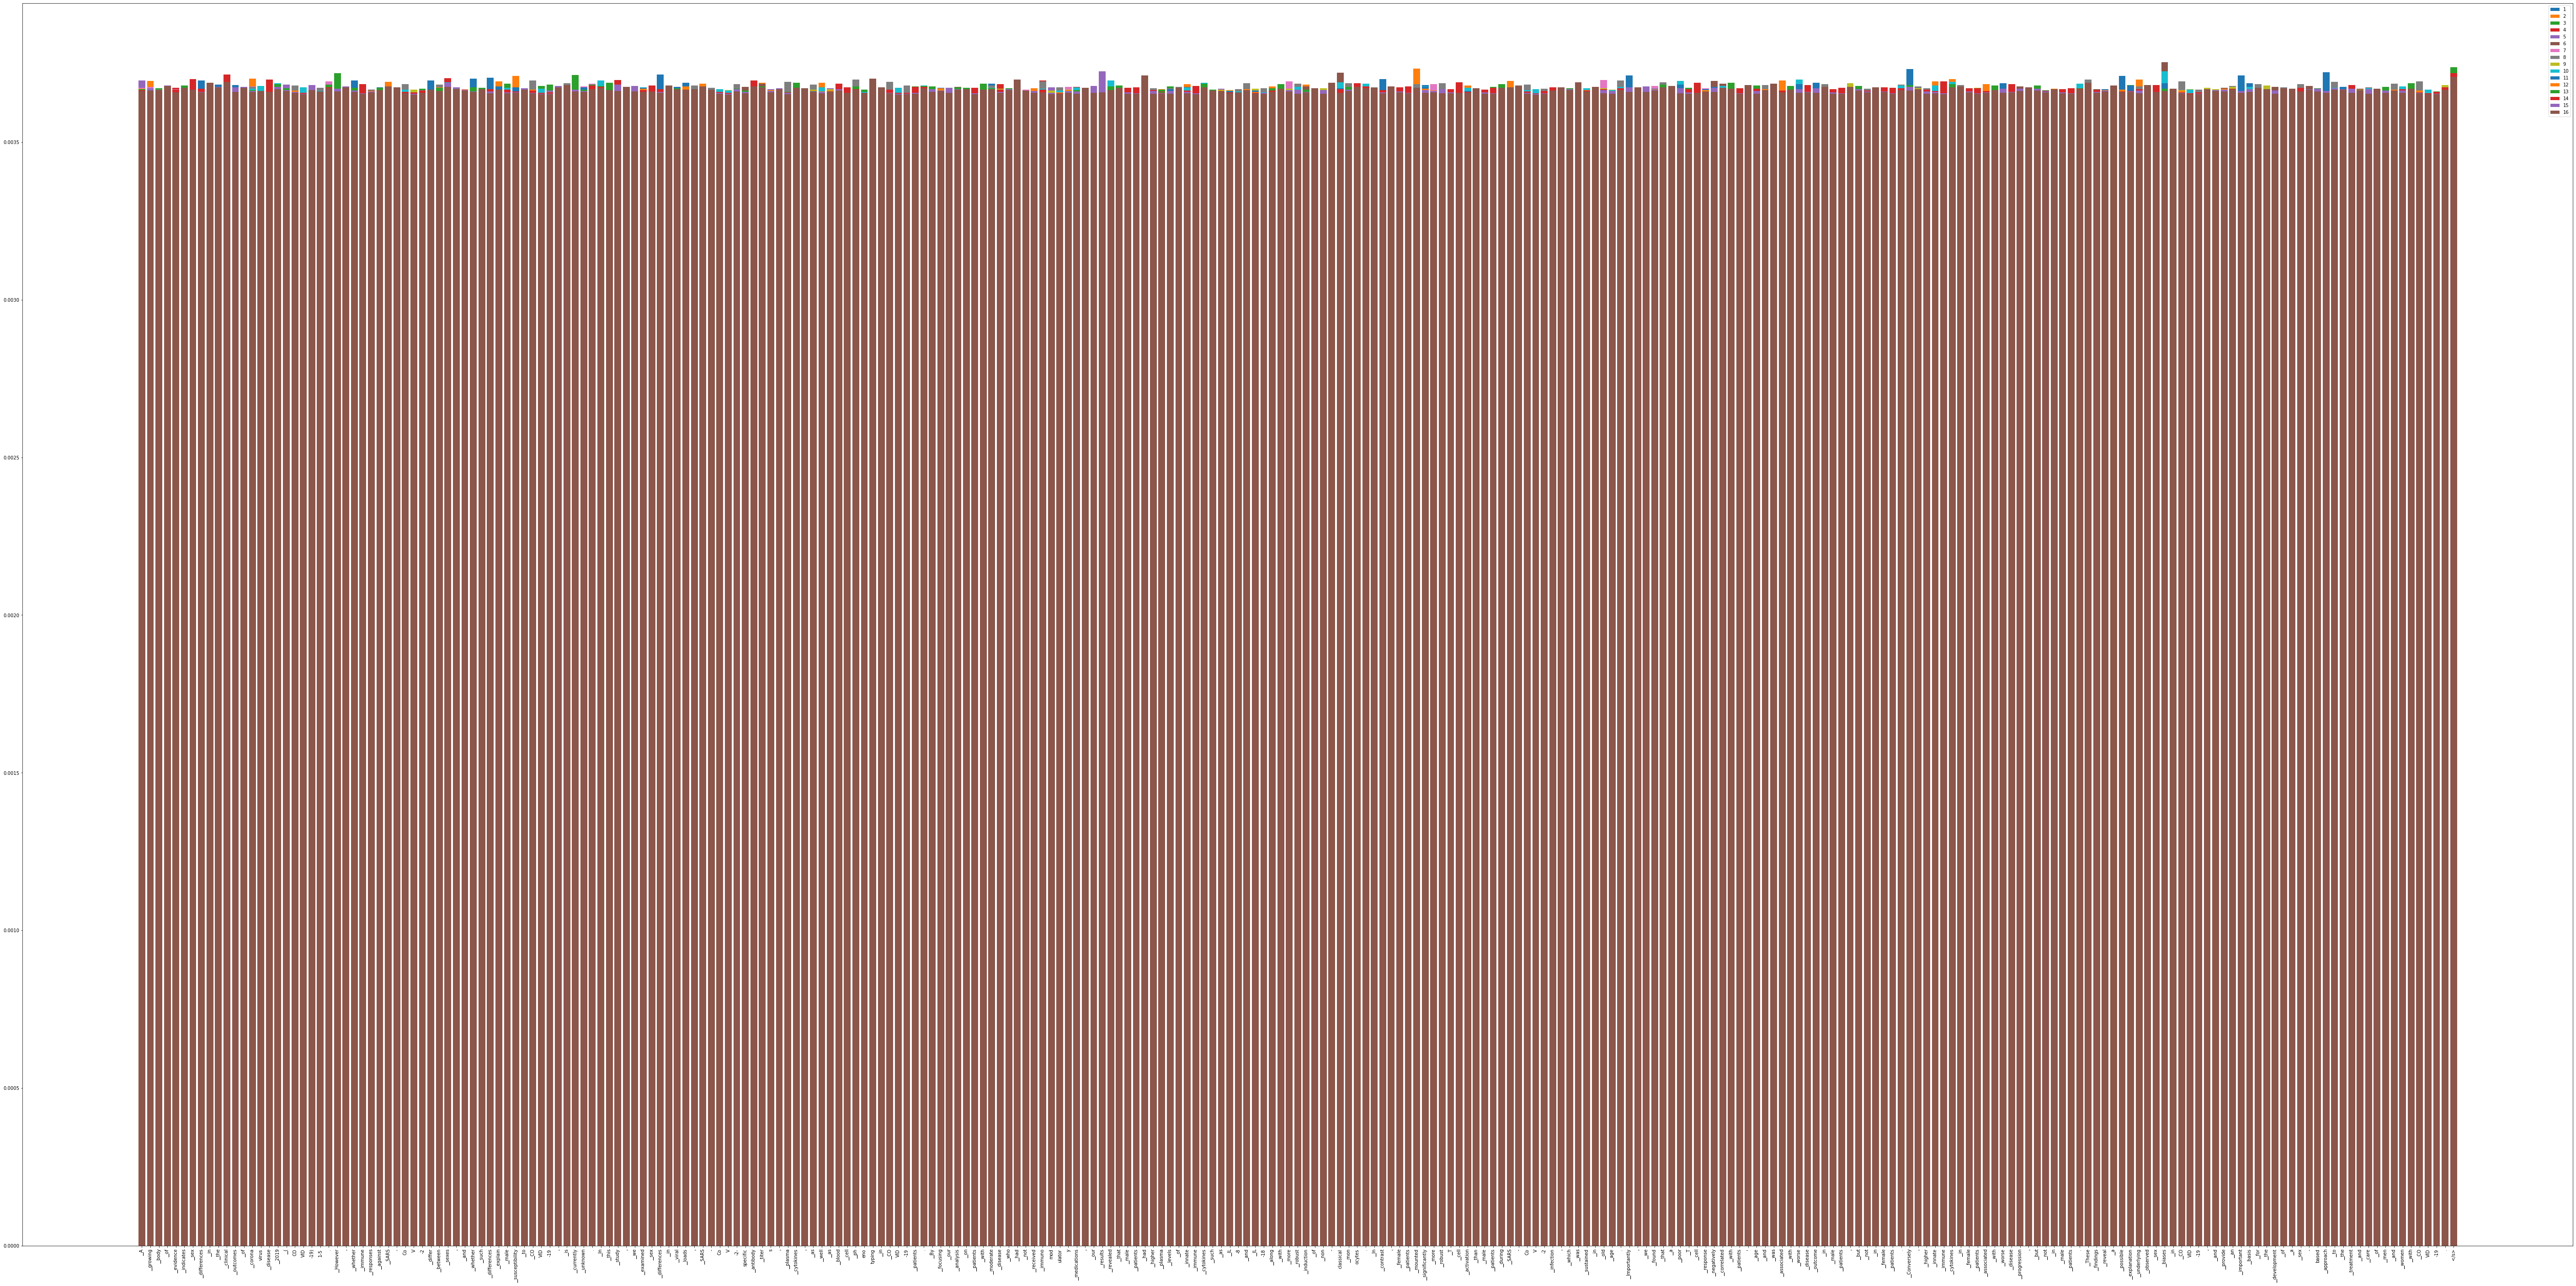

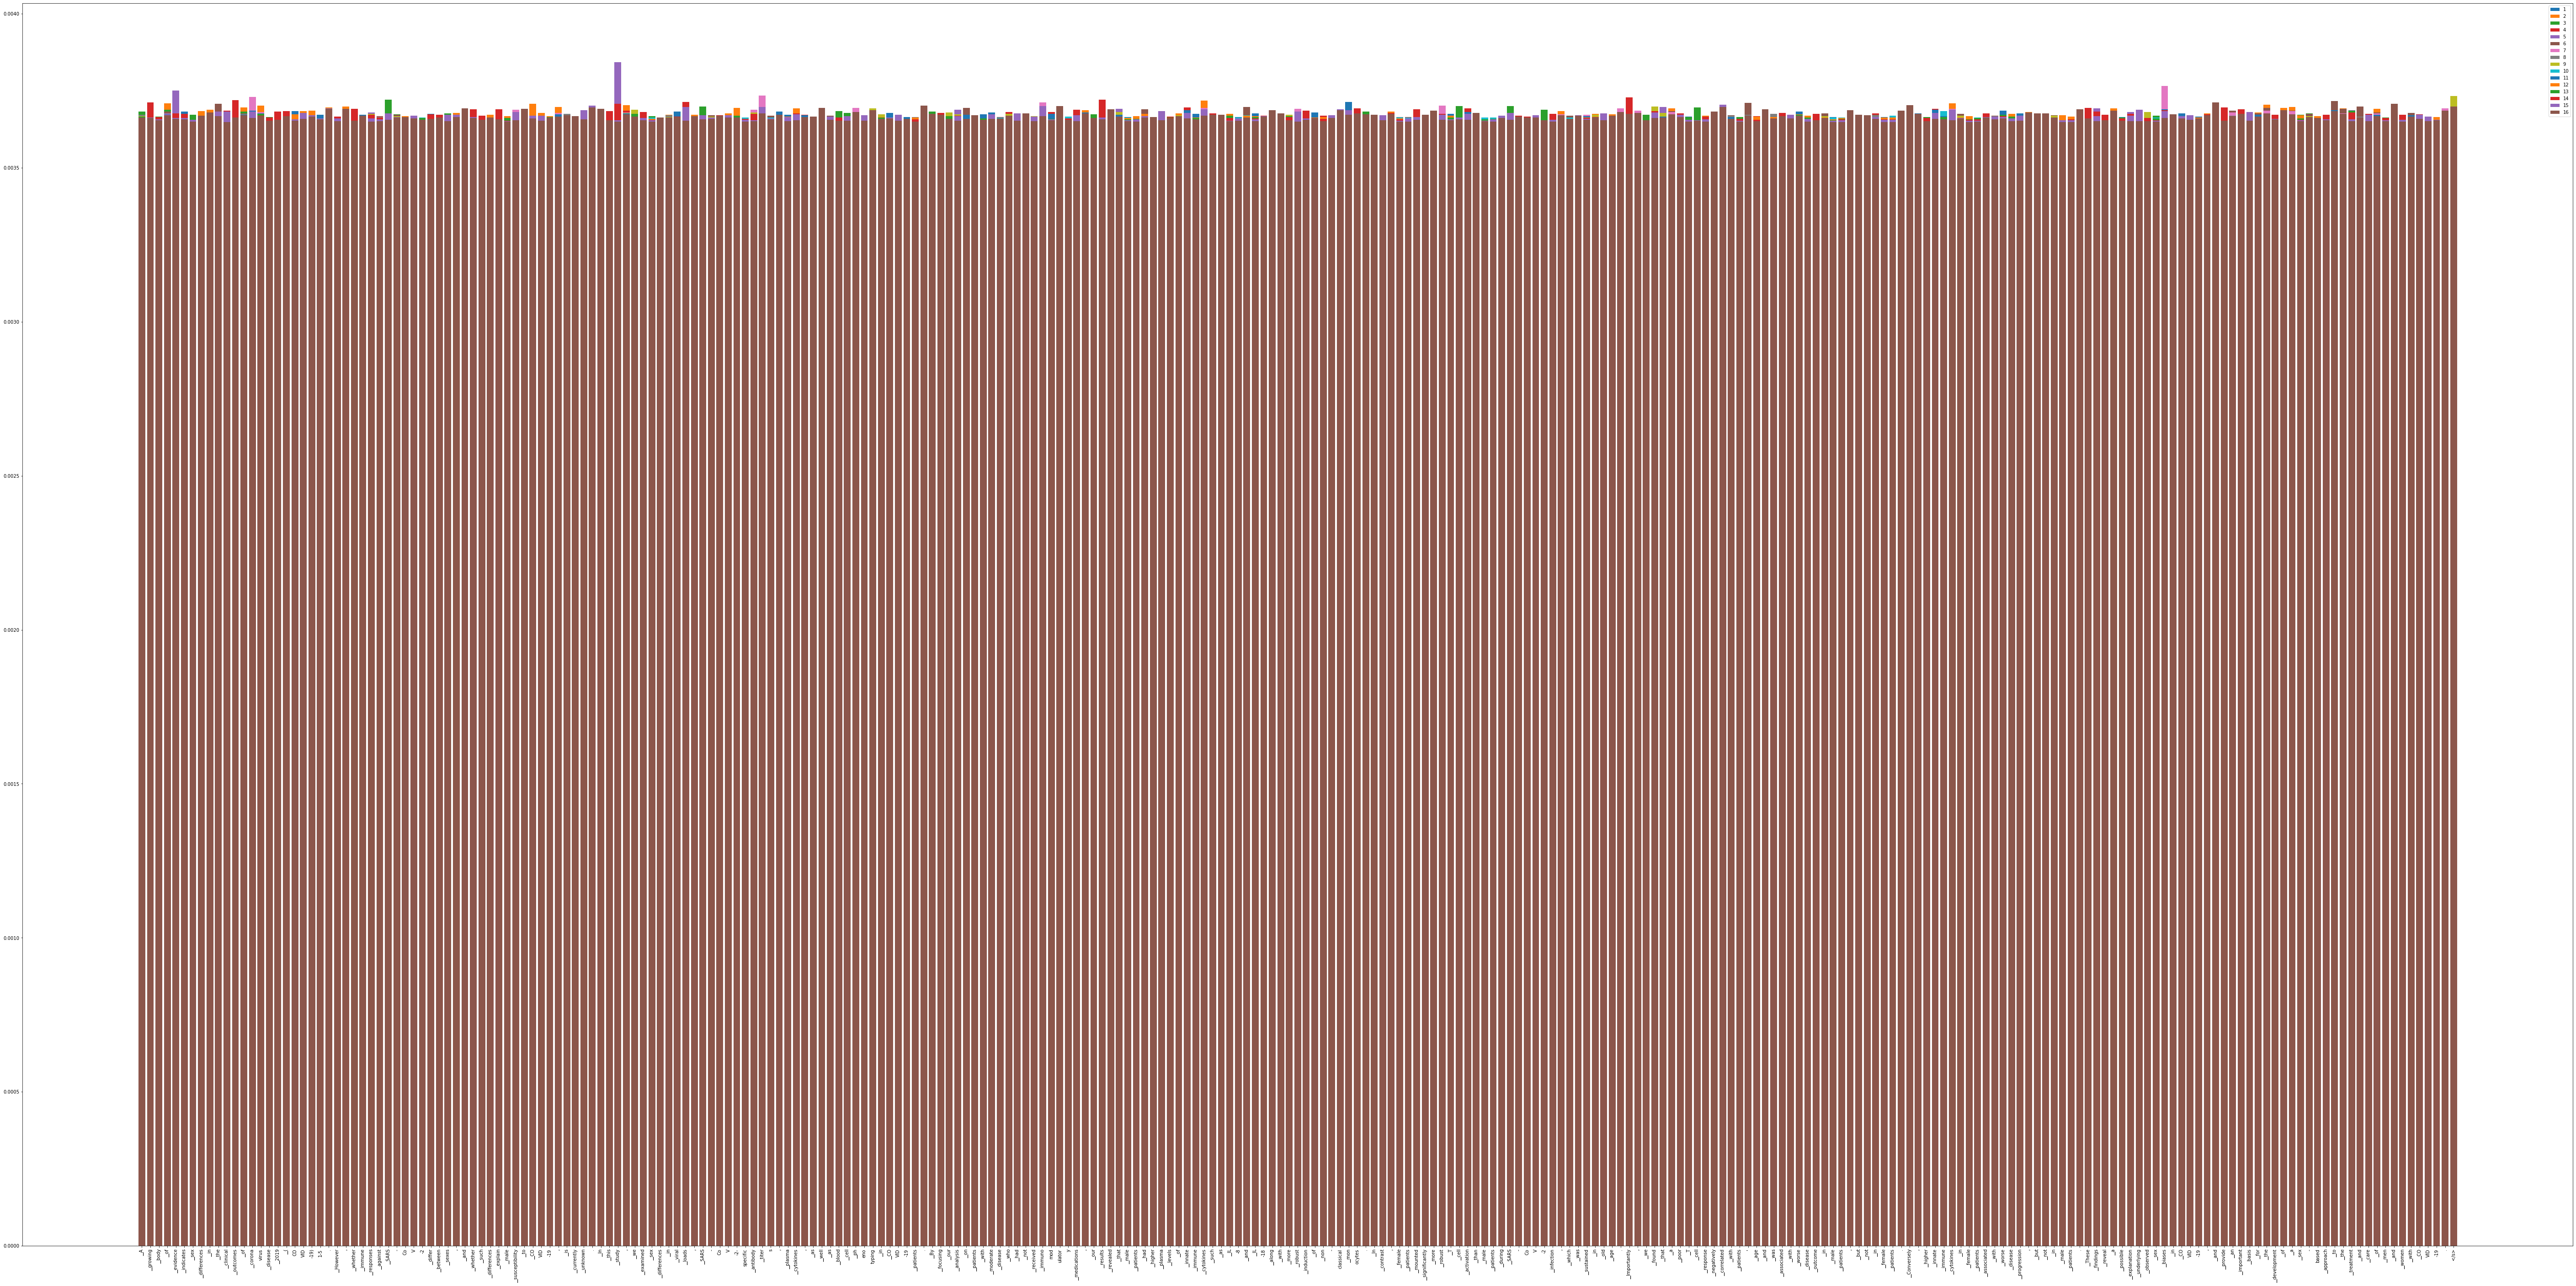

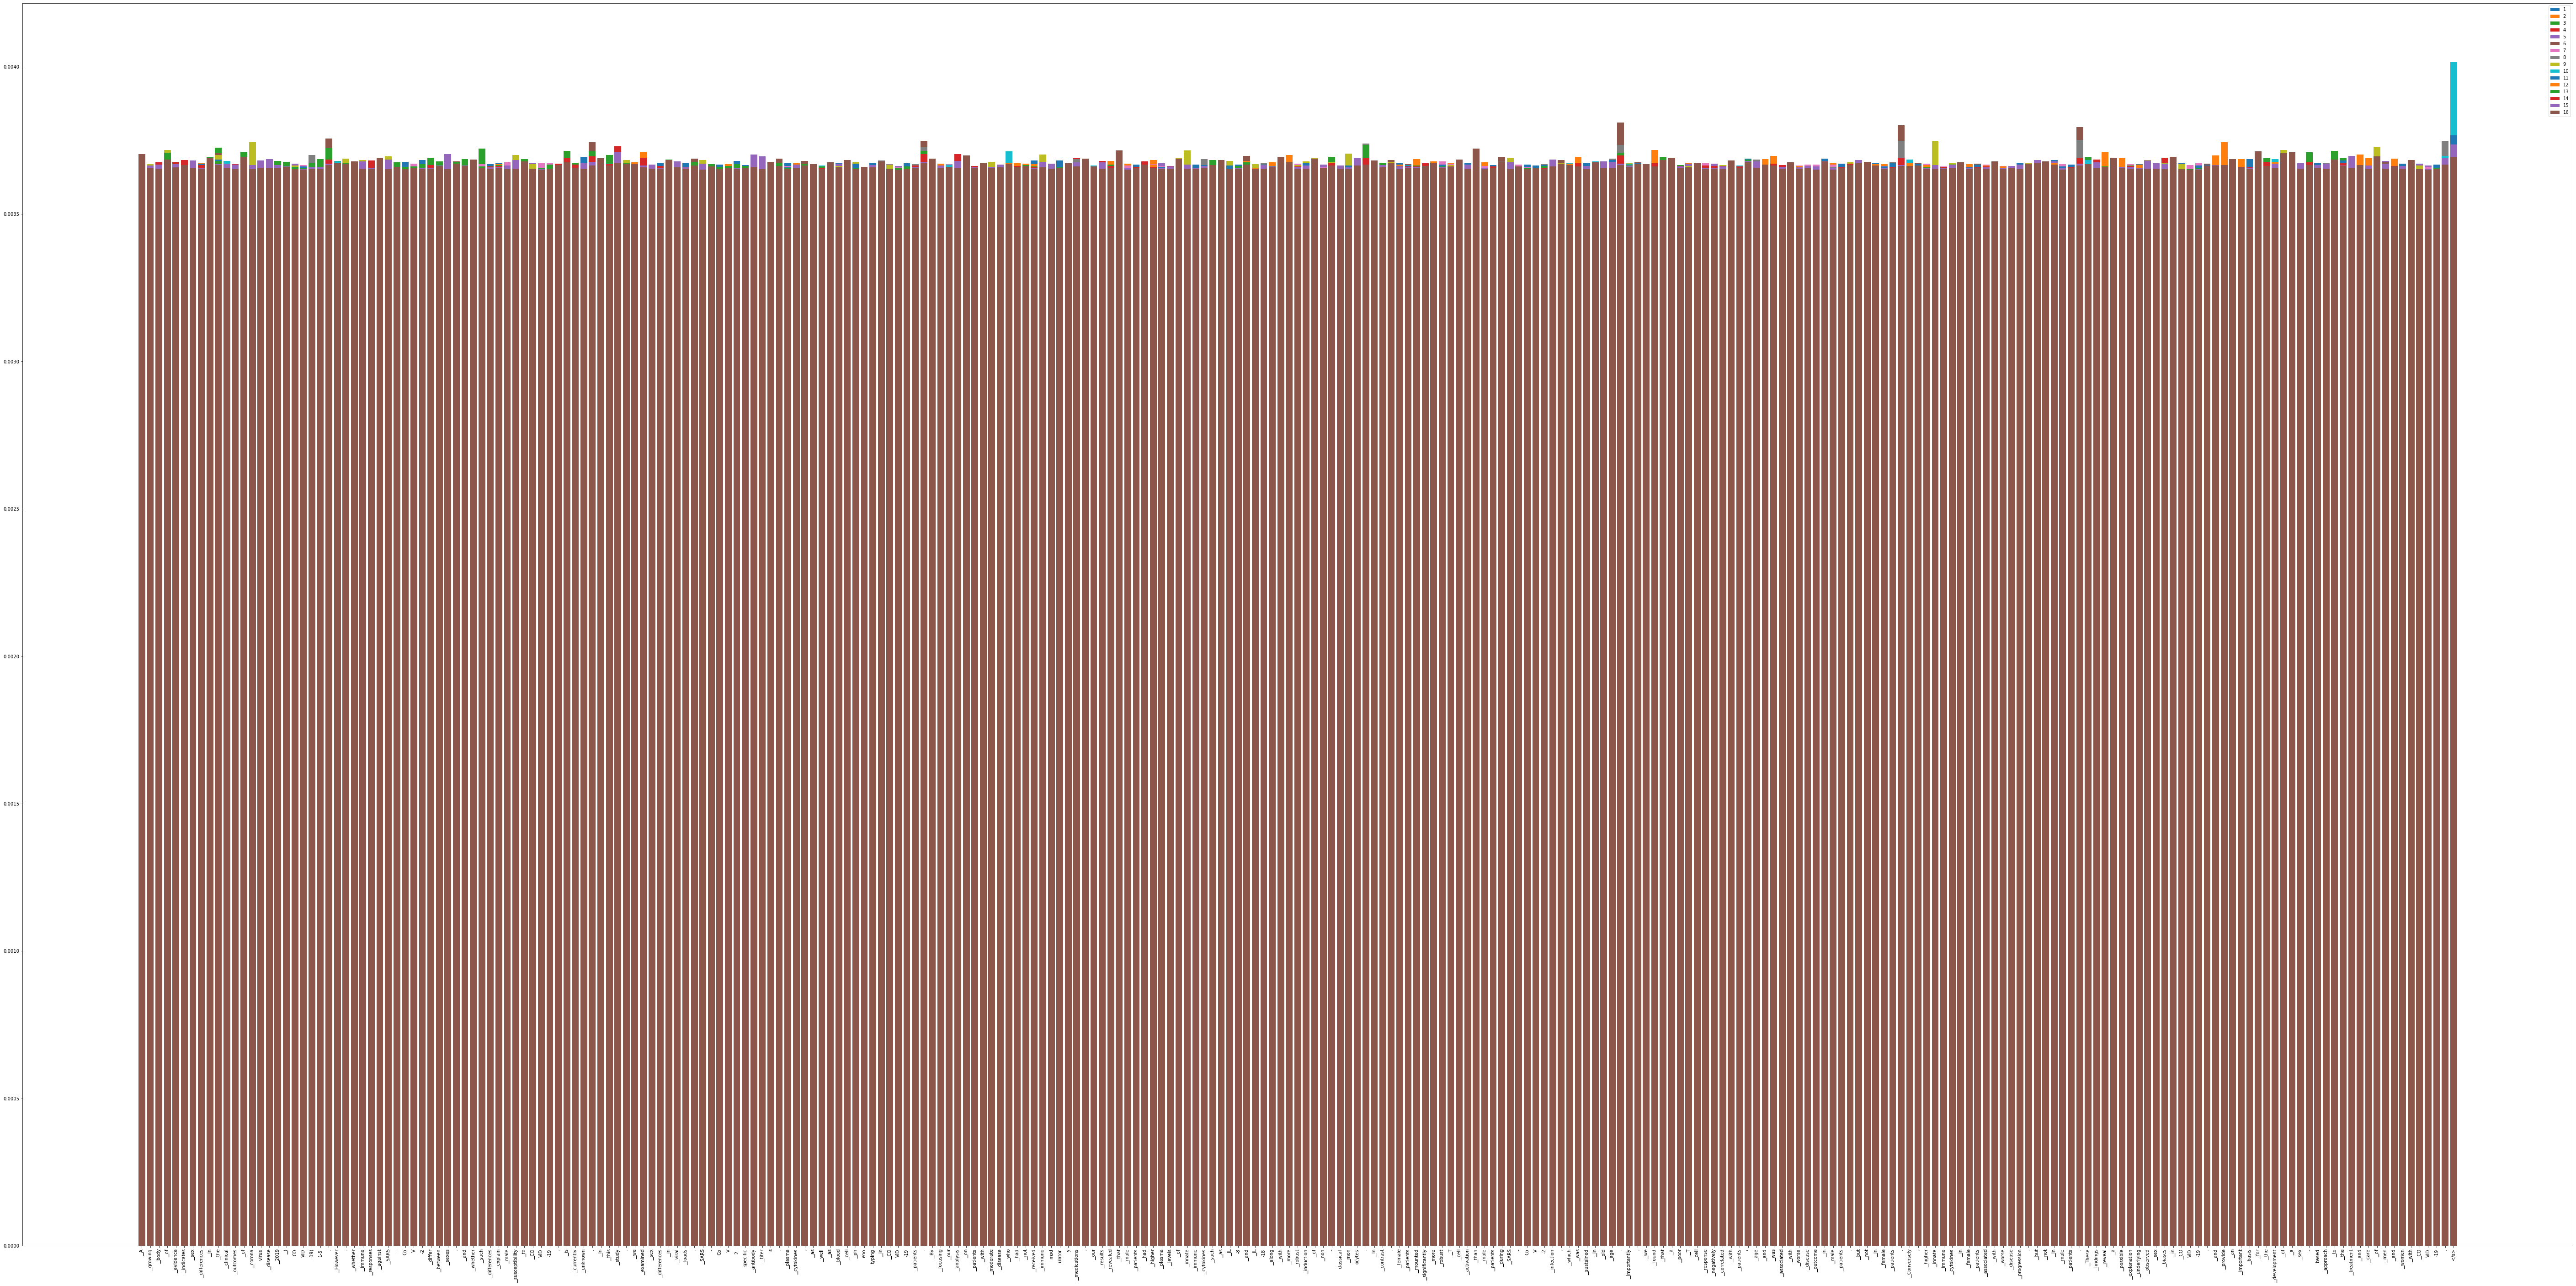

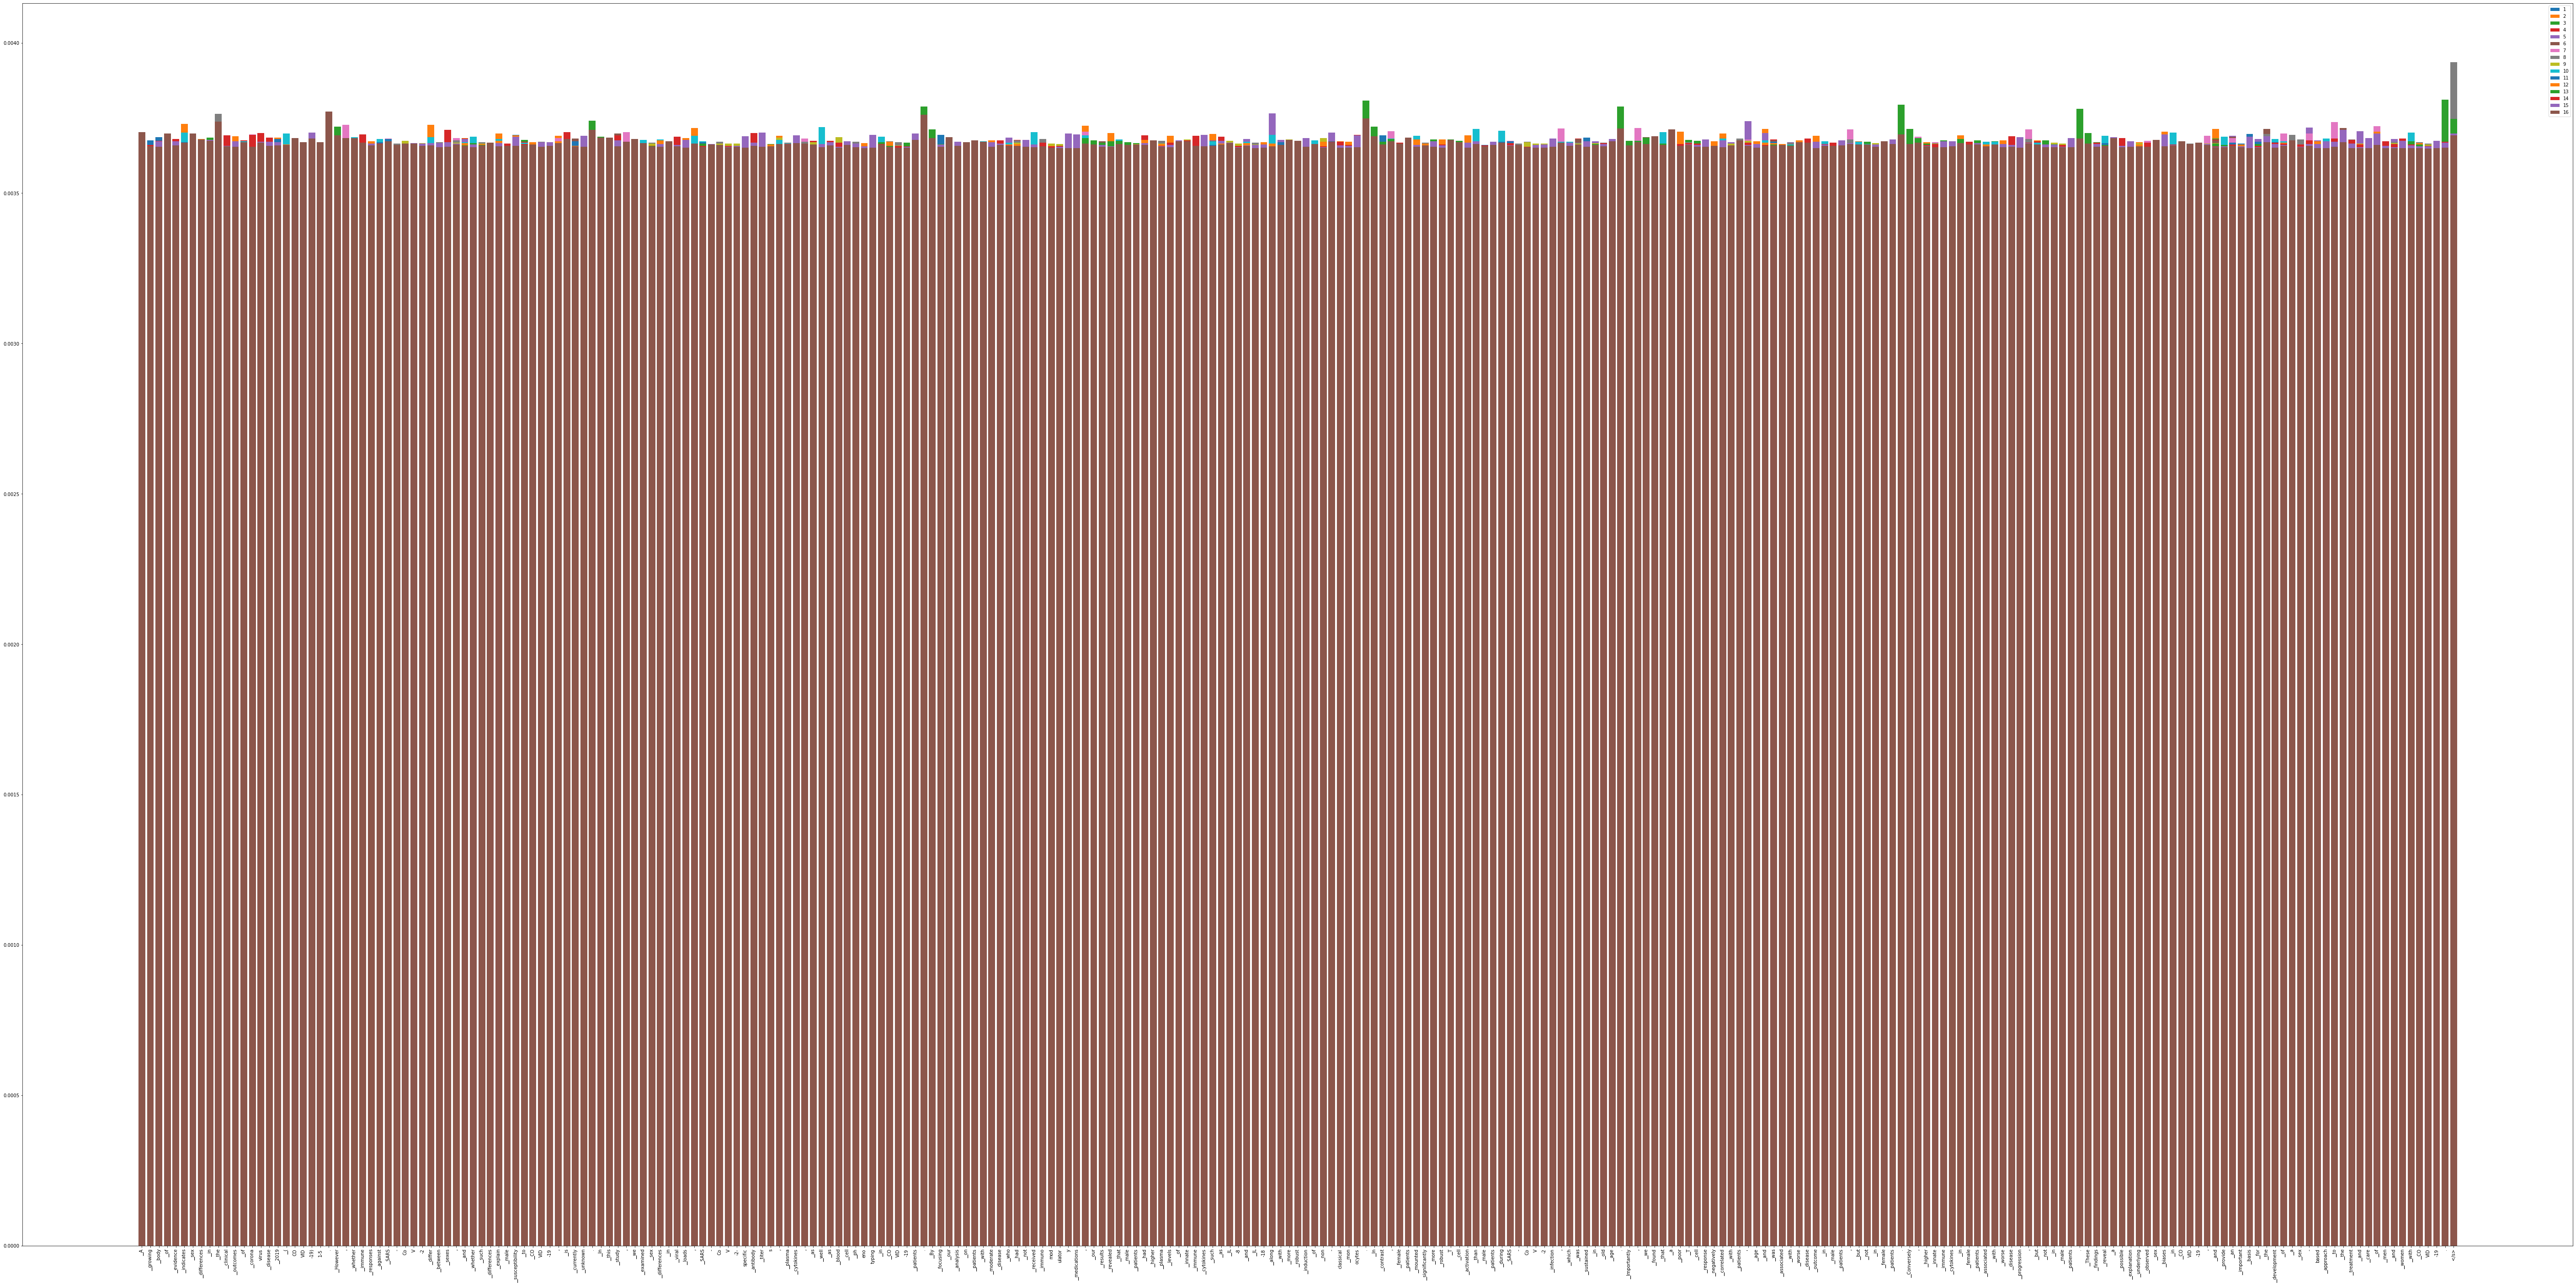

KeyboardInterrupt: 

In [467]:
for i in range(len(encoder_attentions[15][0][15])):
    plots = []
    for head in head_sums[i]:
        plots.append(plt.bar(range(len(head)), head))
    plt.xticks(range(len(head)), tokens, rotation=90)
    plt.rcParams["figure.figsize"] = (100,50)
    plt.legend([bar[0] for bar in plots], [i+1 for i in range(17)])
    plt.show()
    plt.clf()

In [216]:
encoder_attentions = translated[3]
encoder_attentions = [each.detach().numpy() for each in encoder_attentions]
print(translated[3][0][0][0].size())
print(encoder_attentions[0][0][0])
print(encoder_attentions[0][0][0][0])
print(type(encoder_attentions[0][0][0][0]))
print(encoder_attentions[0][0][0][0])

torch.Size([55, 55])
[[1.0000000e+00 1.0000000e+00 1.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.0000000e+00]
 [1.0016521e+09 2.8052662e+10 6.4187032e+07 ... 3.0298556e+10
  6.1385887e+09 1.2487025e+08]
 [1.0016521e+09 2.8052662e+10 6.4187032e+07 ... 3.0298556e+10
  6.1385887e+09 1.2487025e+08]
 ...
 [1.0016521e+09 2.8052662e+10 6.4187032e+07 ... 3.0298556e+10
  6.1385887e+09 1.2487025e+08]
 [1.0016521e+09 2.8052662e+10 6.4187032e+07 ... 3.0298556e+10
  6.1385887e+09 1.2487025e+08]
 [1.0016521e+09 2.8052662e+10 6.4187032e+07 ... 3.0298556e+10
  6.1385887e+09 1.2487025e+08]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1.]
